In [1]:
%pylab inline
import time
from collections import defaultdict
import json
import pandas as pd
import os
import sys
stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout


import numpy as np
import requests
import json 

from datetime import datetime

import urllib

from scipy.stats import ks_2samp, mannwhitneyu

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("seed_creation_date.json","r") as f:
    sci_aw_dict=json.load(f,encoding="utf-8")
df_sci_aw=pd.DataFrame.from_dict(sci_aw_dict,orient="index")
df_sci_aw.index=df_sci_aw.apply(lambda x: x.name.split("/")[-1],axis=1)
df_sci_aw.Award_date=pd.to_datetime(df_sci_aw.Award_date)
df_sci_aw.Award_date=df_sci_aw.Award_date.apply(lambda x: x.date() )
df_sci_aw.Page_created=pd.to_datetime(df_sci_aw.Page_created)
df_sci_aw.Page_created=df_sci_aw.Page_created.apply(lambda x: x.date() )
#print df_sci_aw.loc["Ada_Yonath"]["Page_created"]

with open("baseline_creation_date.json","r") as f:
    sci_naw_dict=json.load(f,encoding="utf-8")
df_sci_naw=pd.DataFrame.from_dict(sci_naw_dict,orient="index")
df_sci_naw.index=df_sci_naw.apply(lambda x: x.name.split("/")[-1],axis=1)
print df_sci_naw.columns
df_sci_naw.Page_created=pd.to_datetime(df_sci_naw.Page_created)
df_sci_naw.Page_created=df_sci_naw.Page_created.apply(lambda x: x.date() )
#print df_sci_naw.loc["Alan_Aderem"]["Page_created"]

Index([u'Page_created', u'Field', u'Name'], dtype='object')


In [3]:
print "============Awarded scientists================="
print df_sci_aw.Gender.value_counts()
gr=df_sci_aw.groupby("Field")
gr.Gender.value_counts()

============Awarded scientists=================
male      242
female     20
Name: Gender, dtype: int64


Field                   Gender
Biology                 male       7
                        female     1
Chemistry               male      45
                        female     5
Computer Science        male      15
                        female     3
Economics               male      49
                        female     2
Mathematics             male      17
                        female     1
Physics                 male      56
                        female     3
Physiology or Medicine  male      53
                        female     5
Name: Gender, dtype: int64

# Identify Gender of Scientists. Dont run it if it is done already!

In [36]:
df_sci_naw["FIRSTNAME"]=df_sci_naw.Name.apply(lambda x: x.split()[0])
df_sci_naw["LASTNAME"]=df_sci_naw.Name.apply(lambda x: x.split(" ",1)[1])
df_sci_naw["FULLNAME"]=df_sci_naw.Name
df_sci_naw.to_csv("data/gender/baseline_creation_date.csv")

In [38]:
sys.path.append('C:\\Users\\zagovooa\\Dropbox\\GESIS 2017\\metrics project\\GitHub\\altmetrics-twitter\\gender_detection')#to run scripts


import pipeline_authors as pln
from genderize import Genderize
import genderize_custom as gnd
import gimg_preprocessing as gimg
import face_plus_processing as fpp
import merge as mrg


df_cleaned = pln.cleaning_pipeline("data/gender/baseline_creation_date.csv", drop_duplicates=False)


keyFile = open('../apikeysgenderize', 'r')
api_key = keyFile.readline().strip()
keyFile.close()


genderize = Genderize(
     user_agent='GenderizeDocs/0.0',
     api_key=api_key)

gnd.fetch_gender(df_cleaned,genderize, "non-awarded", folder="data/gender")


def gender_for_name(name, df):
    return df[df["name"] == name].to_dict(orient="records")

gdf = pd.read_json('data/gender/genderize_non-awarded.json')
df_cleaned["GENDER_DICT"] = df_cleaned["cleaned_name"].apply(lambda x: gender_for_name(x,gdf))
pnas = gnd.df_genderised(df_cleaned,'data/gender/genderize_non-awarded.json',0.8,'data/gender/','non-awarded')
df_genderize=pd.read_json('data/gender/non-awarded.json')

gimg.generate_input('data/gender/non-awarded.json',"data/gender/google_img_non-awarded.csv")

('Initial number of instances:', 276)
('Number of nan values in first name:', 0)
('Number of nan values in last name:', 0)
Replacing null values with 'NoName'..
('Number of instances:', 276)
Removing Anonymous..
('Number of instances:', 276)
Drop duplicates
('Number of instances:', 276)
{'NoName': [0, 0.0], 'Initials': [1, 0.0036231884057971015]}
Removing Missing names, initials..
('Number of instances:', 275)
('Of initial dataset preserved: ', 1.0)


In [42]:
df_genderize.head(2)

FIRSTNAME       FULLNAME                   Field  \
%C4%90%C3%A0m_Thanh_S%C6%A1n       Dam  Dam Thanh Son                 Physics   
%C5%BDeljko_Reiner              Zeljko  Zeljko Reiner  Physiology or Medicine   

                               GENDER  \
%C4%90%C3%A0m_Thanh_S%C6%A1n  unknown   
%C5%BDeljko_Reiner               male   

                                                                    GENDER_DICT  \
%C4%90%C3%A0m_Thanh_S%C6%A1n  [{u'count': 12.0, u'gender': u'male', u'name':...   
%C5%BDeljko_Reiner            [{u'count': 43.0, u'gender': u'male', u'name':...   

                               LASTNAME           Name Page_created  \
%C4%90%C3%A0m_Thanh_S%C6%A1n  Thanh Son  Dam Thanh Son   2013-02-20   
%C5%BDeljko_Reiner               Reiner  Zeljko Reiner   2014-09-22   

                             cleaned_name  
%C4%90%C3%A0m_Thanh_S%C6%A1n          Dam  
%C5%BDeljko_Reiner                 Zeljko

In [44]:
#python get_google_images.py [inputfile.csv]  [output.csv]
%run "C:/Users/zagovooa/Dropbox/GESIS 2017/metrics project/GitHub/altmetrics-twitter/gender_detection/google_img/get_google_images.py" data/gender/google_img_non-awarded.csv data/gender/google_img_non-awarded_url.csv 

31 names loaded!
1 - 2018-03-14 12:34:00.018000 - Dam+Thanh Son
2 - 2018-03-14 12:34:03.523000 - Albert-Laszlo+Barabasi
3 - 2018-03-14 12:34:06.753000 - Ariel+Rubinstein
4 - 2018-03-14 12:34:09.873000 - Brigitta+Stockinger
5 - 2018-03-14 12:34:13.574000 - Guanrong+Chen
6 - 2018-03-14 12:34:16.734000 - Chih-Jen+Lin
7 - 2018-03-14 12:34:20.074000 - Cumrun+Vafa
8 - 2018-03-14 12:34:23.269000 - Hongjie+Dai
9 - 2018-03-14 12:34:26.444000 - Taeghwan+Hyeon
10 - 2018-03-14 12:34:29.673000 - Ira+Pastan
11 - 2018-03-14 12:34:33.111000 - Irun+Cohen
12 - 2018-03-14 12:34:36.821000 - Jean+Frechet
13 - 2018-03-14 12:34:40.448000 - Jianqing+Fan
14 - 2018-03-14 12:34:44.028000 - Jing+Li
15 - 2018-03-14 12:34:47.928000 - Kendall+Houk
16 - 2018-03-14 12:34:51.468000 - Kimoon+Kim
17 - 2018-03-14 12:34:54.971000 - Kun-Liang+Guan
18 - 2018-03-14 12:34:58.563000 - Marlan+Scully
19 - 2018-03-14 12:35:02.282000 - Michal+Lipson
20 - 2018-03-14 12:35:05.773000 - Michele+Parrinello
21 - 2018-03-14 12:35:09.04300

In [ ]:
#https://api-us.faceplusplus.com/facepp/v3/detect
%run "C:/Users/zagovooa/Dropbox/GESIS 2017/metrics project/GitHub/altmetrics-twitter/gender_detection/faceplus_queryOlya.py" data/gender/google_img_non-awarded_url.csv  data/gender/google_img_non-awarded_results.json

In [73]:
df_faceplus_res=pd.read_csv("data/gender/non-awarded_faceplus_result.csv",header=None,names=["name_img_query","gender_img"])
df_faceplus_res["FULLNAME"]=df_faceplus_res.name_img_query.apply(lambda x: x.replace("+"," ")).values
#df_faceplus_res.set_index(df_faceplus_res.name_img_query.apply(lambda x: x.replace("+"," ")).values)

df=pd.merge(df_genderize, df_faceplus_res, on='FULLNAME',how="left").set_index(df_genderize.index)
df["gender"]=df.apply(lambda x: x.GENDER if x.GENDER!="unknown" else x.gender_img , axis=1)
df.rename(columns={'GENDER': 'gender_firstname'}, inplace=True)
df.head(2)

FIRSTNAME       FULLNAME                   Field  \
%C4%90%C3%A0m_Thanh_S%C6%A1n       Dam  Dam Thanh Son                 Physics   
%C5%BDeljko_Reiner              Zeljko  Zeljko Reiner  Physiology or Medicine   

                             gender_firstname  \
%C4%90%C3%A0m_Thanh_S%C6%A1n          unknown   
%C5%BDeljko_Reiner                       male   

                                                                    GENDER_DICT  \
%C4%90%C3%A0m_Thanh_S%C6%A1n  [{u'count': 12.0, u'gender': u'male', u'name':...   
%C5%BDeljko_Reiner            [{u'count': 43.0, u'gender': u'male', u'name':...   

                               LASTNAME           Name Page_created  \
%C4%90%C3%A0m_Thanh_S%C6%A1n  Thanh Son  Dam Thanh Son   2013-02-20   
%C5%BDeljko_Reiner               Reiner  Zeljko Reiner   2014-09-22   

                             cleaned_name name_img_query gender_img gender  
%C4%90%C3%A0m_Thanh_S%C6%A1n          Dam  Dam+Thanh Son       male   male  
%C5%BDeljko_Reiner                 Zeljko            NaN        NaN   male

In [282]:
df.to_csv("data/gender/final_non_award_sc.csv",sep="\t")

# Analyze Gender differences

In [4]:
df=pd.read_csv("data/gender/final_non_award_sc.csv",sep="\t",header=0,index_col=0)
print "============Non-awarded scientists================="
print df.gender.value_counts()
gr_nonaw=df.groupby("Field")
gr_nonaw.gender.value_counts()

============Non-awarded scientists=================
male      248
female     27
Name: gender, dtype: int64


Field                   gender
Biology                 male       8
Chemistry               male      53
                        female     1
Computer Science        male      15
                        female     2
Economics               male      43
                        female     4
Mathematics             male      14
                        female     3
Physics                 male      59
                        female     4
Physiology or Medicine  male      56
                        female    13
Name: gender, dtype: int64

In [5]:
base_dir="C:\\Users\\zagovooa\\OneDrive\\GESIS 2017\\metrics project\\GitHub\\scientists-analysis-wikipedia\\"
base_dir="C:\\Users\\zagov\\OneDrive\\GESIS 2017\\metrics project\\GitHub\\scientists-analysis-wikipedia\\"
plots_dir = os.path.join(base_dir, 'plots')
data_dir = os.path.join(base_dir, 'data')

def plotting(array, name,color="blue",period="months",lim=0.003,text=False,bins=30):
    #plt.title("Time lag between the articles creation")
    f = plt.figure(dpi=500,figsize=(5, 3.75))
    plt.xlabel("Time lag (%s)"%period)
    plt.ylabel("Probability")
    n,bins_new,p=plt.hist(array, bins=bins, color=color, normed = True,histtype='bar', ec='black')#bins=50, 
    plt.ylim(0,lim)
    #plt.xlim(np.min(array),np.max(array))
    plt.xlim(-800,780)
    plt.plot([0,0], [0,lim],"r--" ,label="Week when the article\nabout scientist\nwas created")
    plt.legend(frameon=False,loc='upper right', bbox_to_anchor=(1.028, 1),handlelength=1.3)
    percent_1=100*float(np.sum(np.array(array)<0))/len(array)
    percent_2=100*float(np.sum(np.array(array)>=0))/len(array)
    text1=int(np.round(percent_1))
    text2=int(np.round(percent_2))
    plt.text(-400, lim-lim/6., "%s%%\narticles"%(text1),fontdict={"size":13},ha='center')
    plt.text(400, lim-2.*lim/3 , "%s%% of\narticles"%(text2),fontdict={"size":13},ha='center')
    if text:
        print text
    plt.tight_layout()
    plt.savefig(plots_dir+name,dpi=500)
    return bins_new

def weekly_aggregation(time_list):
    weekly_list = []
    for day in time_list:
        day = day/7
        weekly_list.append(day)
    return weekly_list

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return (d2 - d1).days

def get_series(main_dict, scientist_dict, topic_dict,list_of_sientist):
    time_list = []
    for scientist, topic_list in main_dict.iteritems():     
        #scientist = scientist.encode("utf-8")
        #scientist = urllib2.unquote(scientist).decode("utf-8")
        #scientist = urllib.quote_plus(scientist.encode("utf-8"))
        #print scientist
        if topic_list!=[]:
            scientist_date = scientist_dict.get(scientist).get('Page_created').rstrip().split('T')[0]
            scientist_name=scientist_dict.get(scientist).get('Name')
            if scientist_name in list_of_sientist:
                for topic in topic_list:
                    topic_date = topic_dict.get(topic).rstrip().split('T')[0]
                    time_lag = days_between(scientist_date, topic_date)
                    time_list.append(time_lag)
    return time_list

def load_simple_json(filename):
    with open(filename, 'r') as f:
        return json.load(f)

In [6]:
filename =  os.path.join(data_dir, 'baseline_topic_creation_date.json')    
topic_dict_baseline = load_simple_json(filename)

filename =  os.path.join(base_dir, 'baseline_creation_date.json')    
scientist_dict_baseline = load_simple_json(filename)

filename =  os.path.join(data_dir, 'baseline_neighbors_list_clean_en.json')    
main_dict_baseline = load_simple_json(filename)

filename =  os.path.join(data_dir, 'seed_topic_creation_date.json')    
topic_dict_seed = load_simple_json(filename)

filename =  os.path.join(base_dir, 'seed_creation_date.json')    
scientist_dict_seed = load_simple_json(filename)

filename =  os.path.join(data_dir, 'seed_neighbors_list_clean_en.json')    
main_dict_seed = load_simple_json(filename)


# Plot gender differences



# ===================== Non-awarded =======================

# All fields 

# of topics 1500
Male scientist


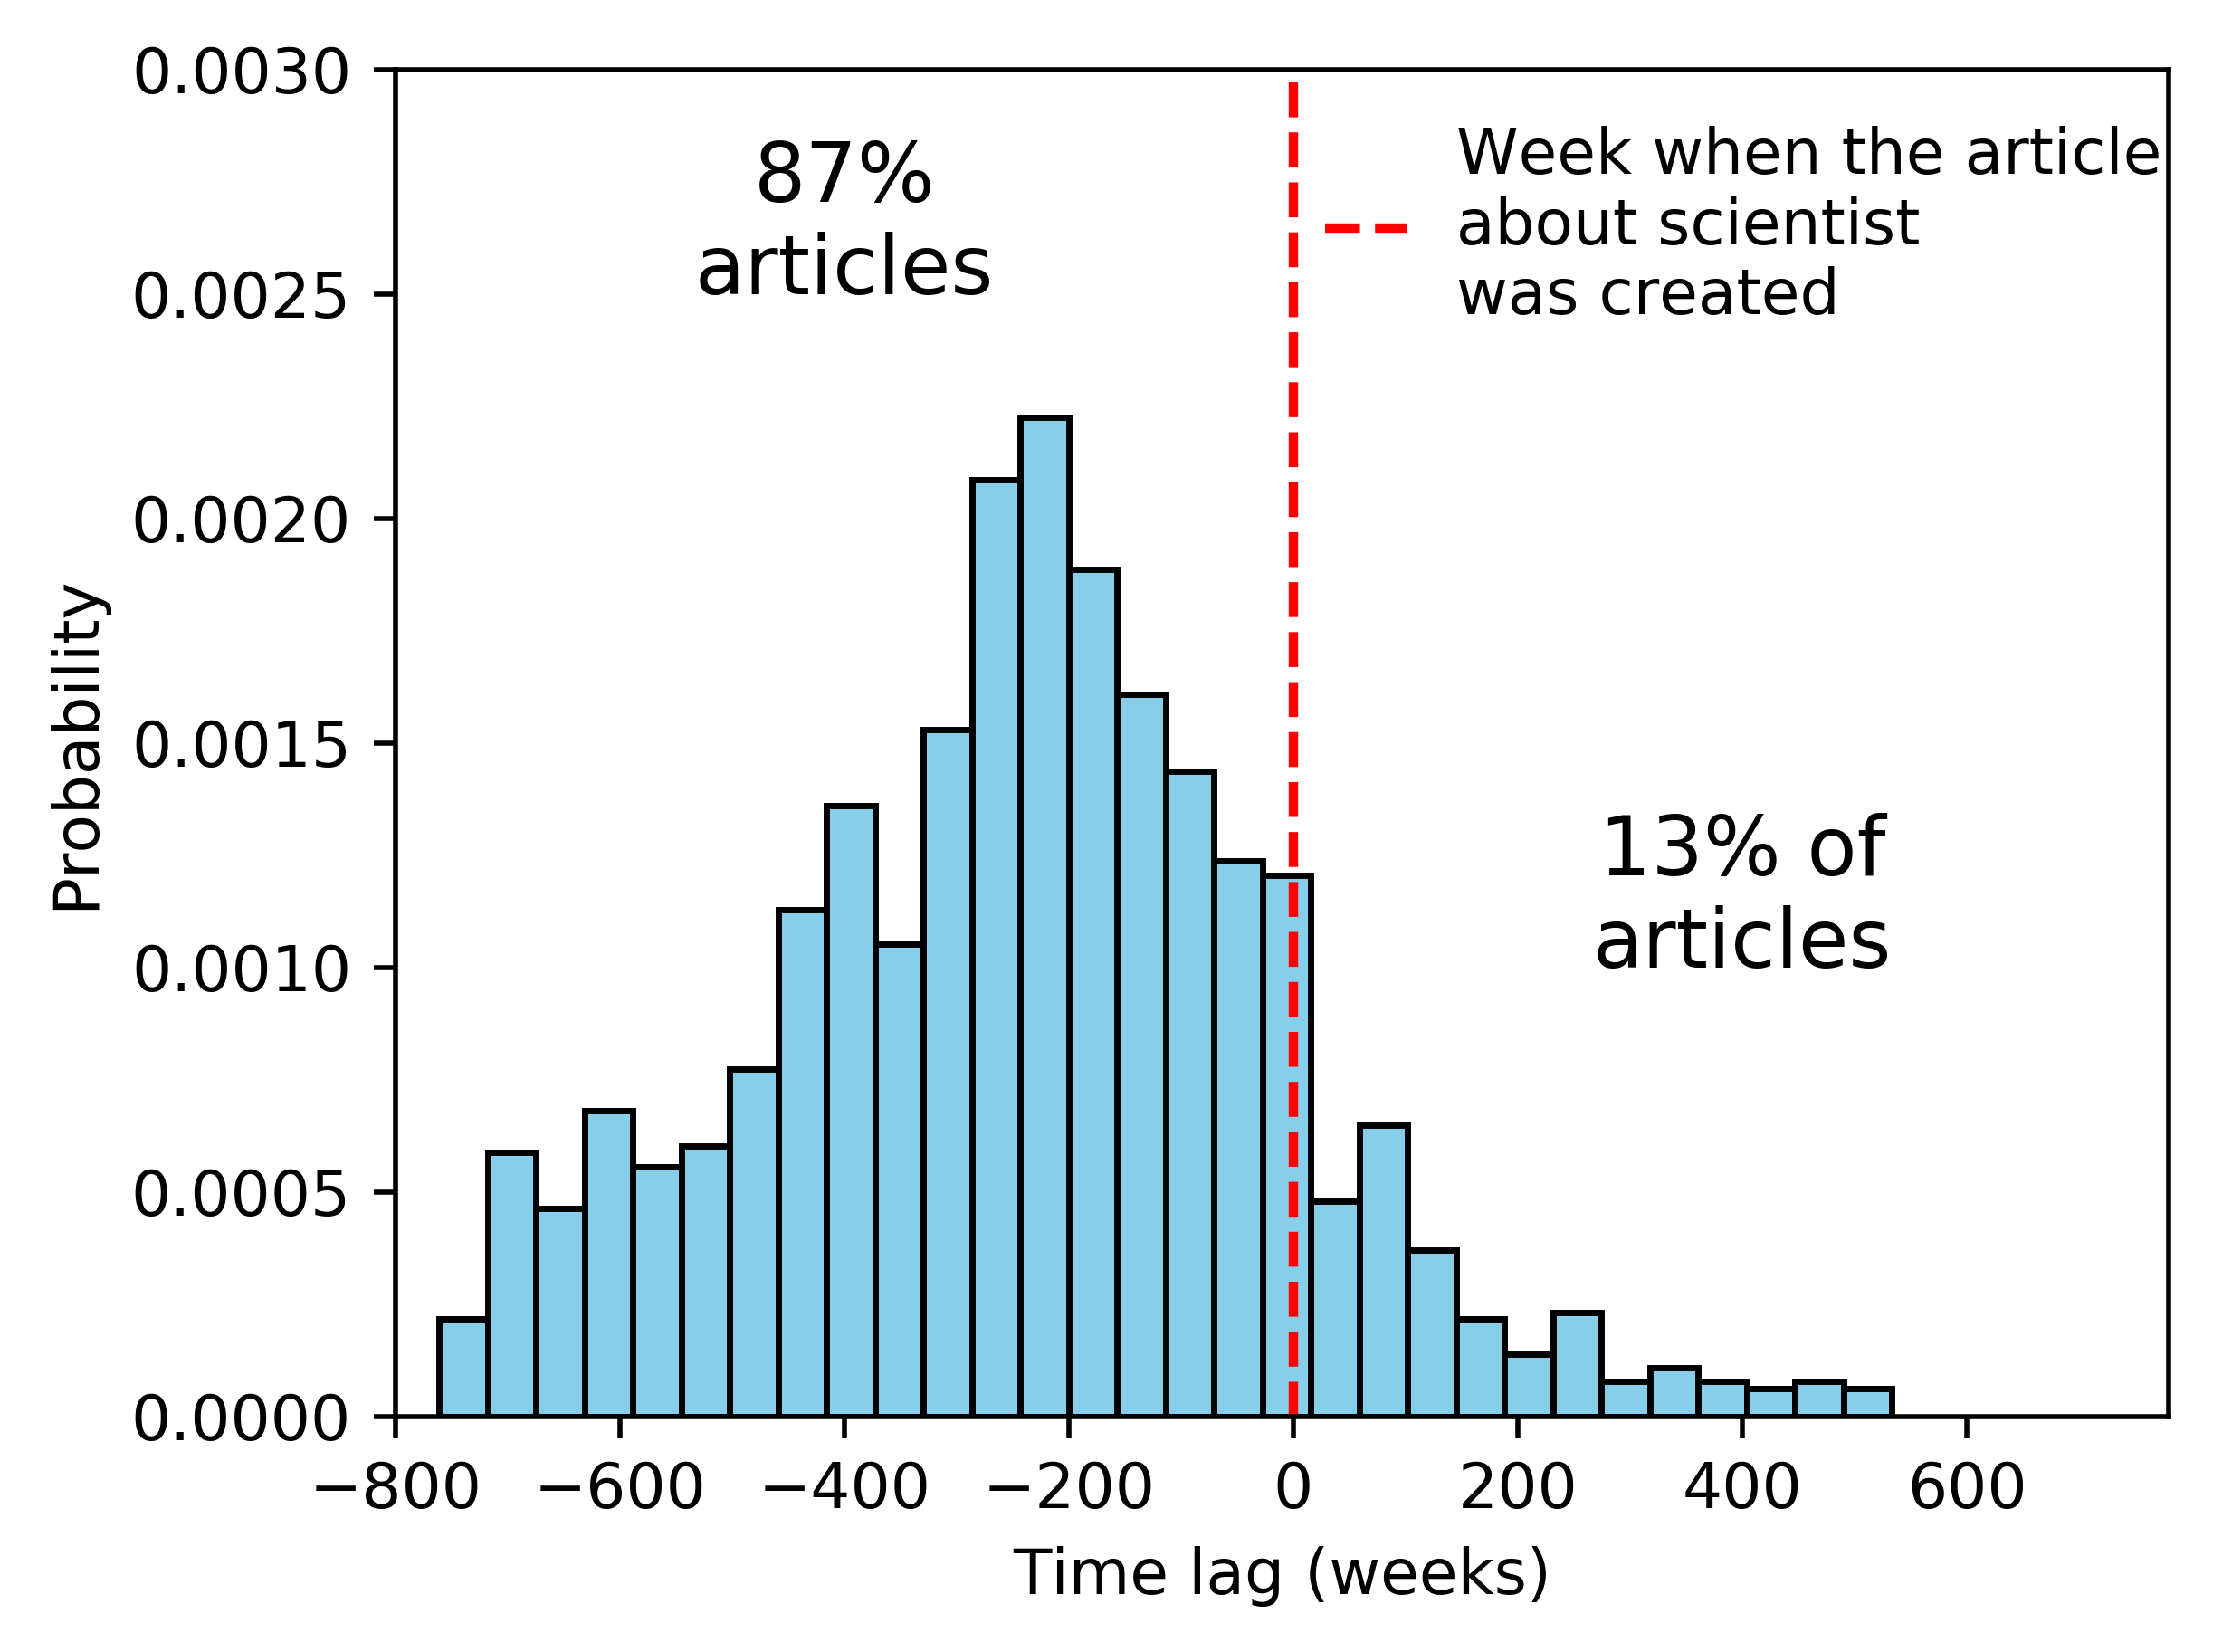

# of topics 133
Female scientist


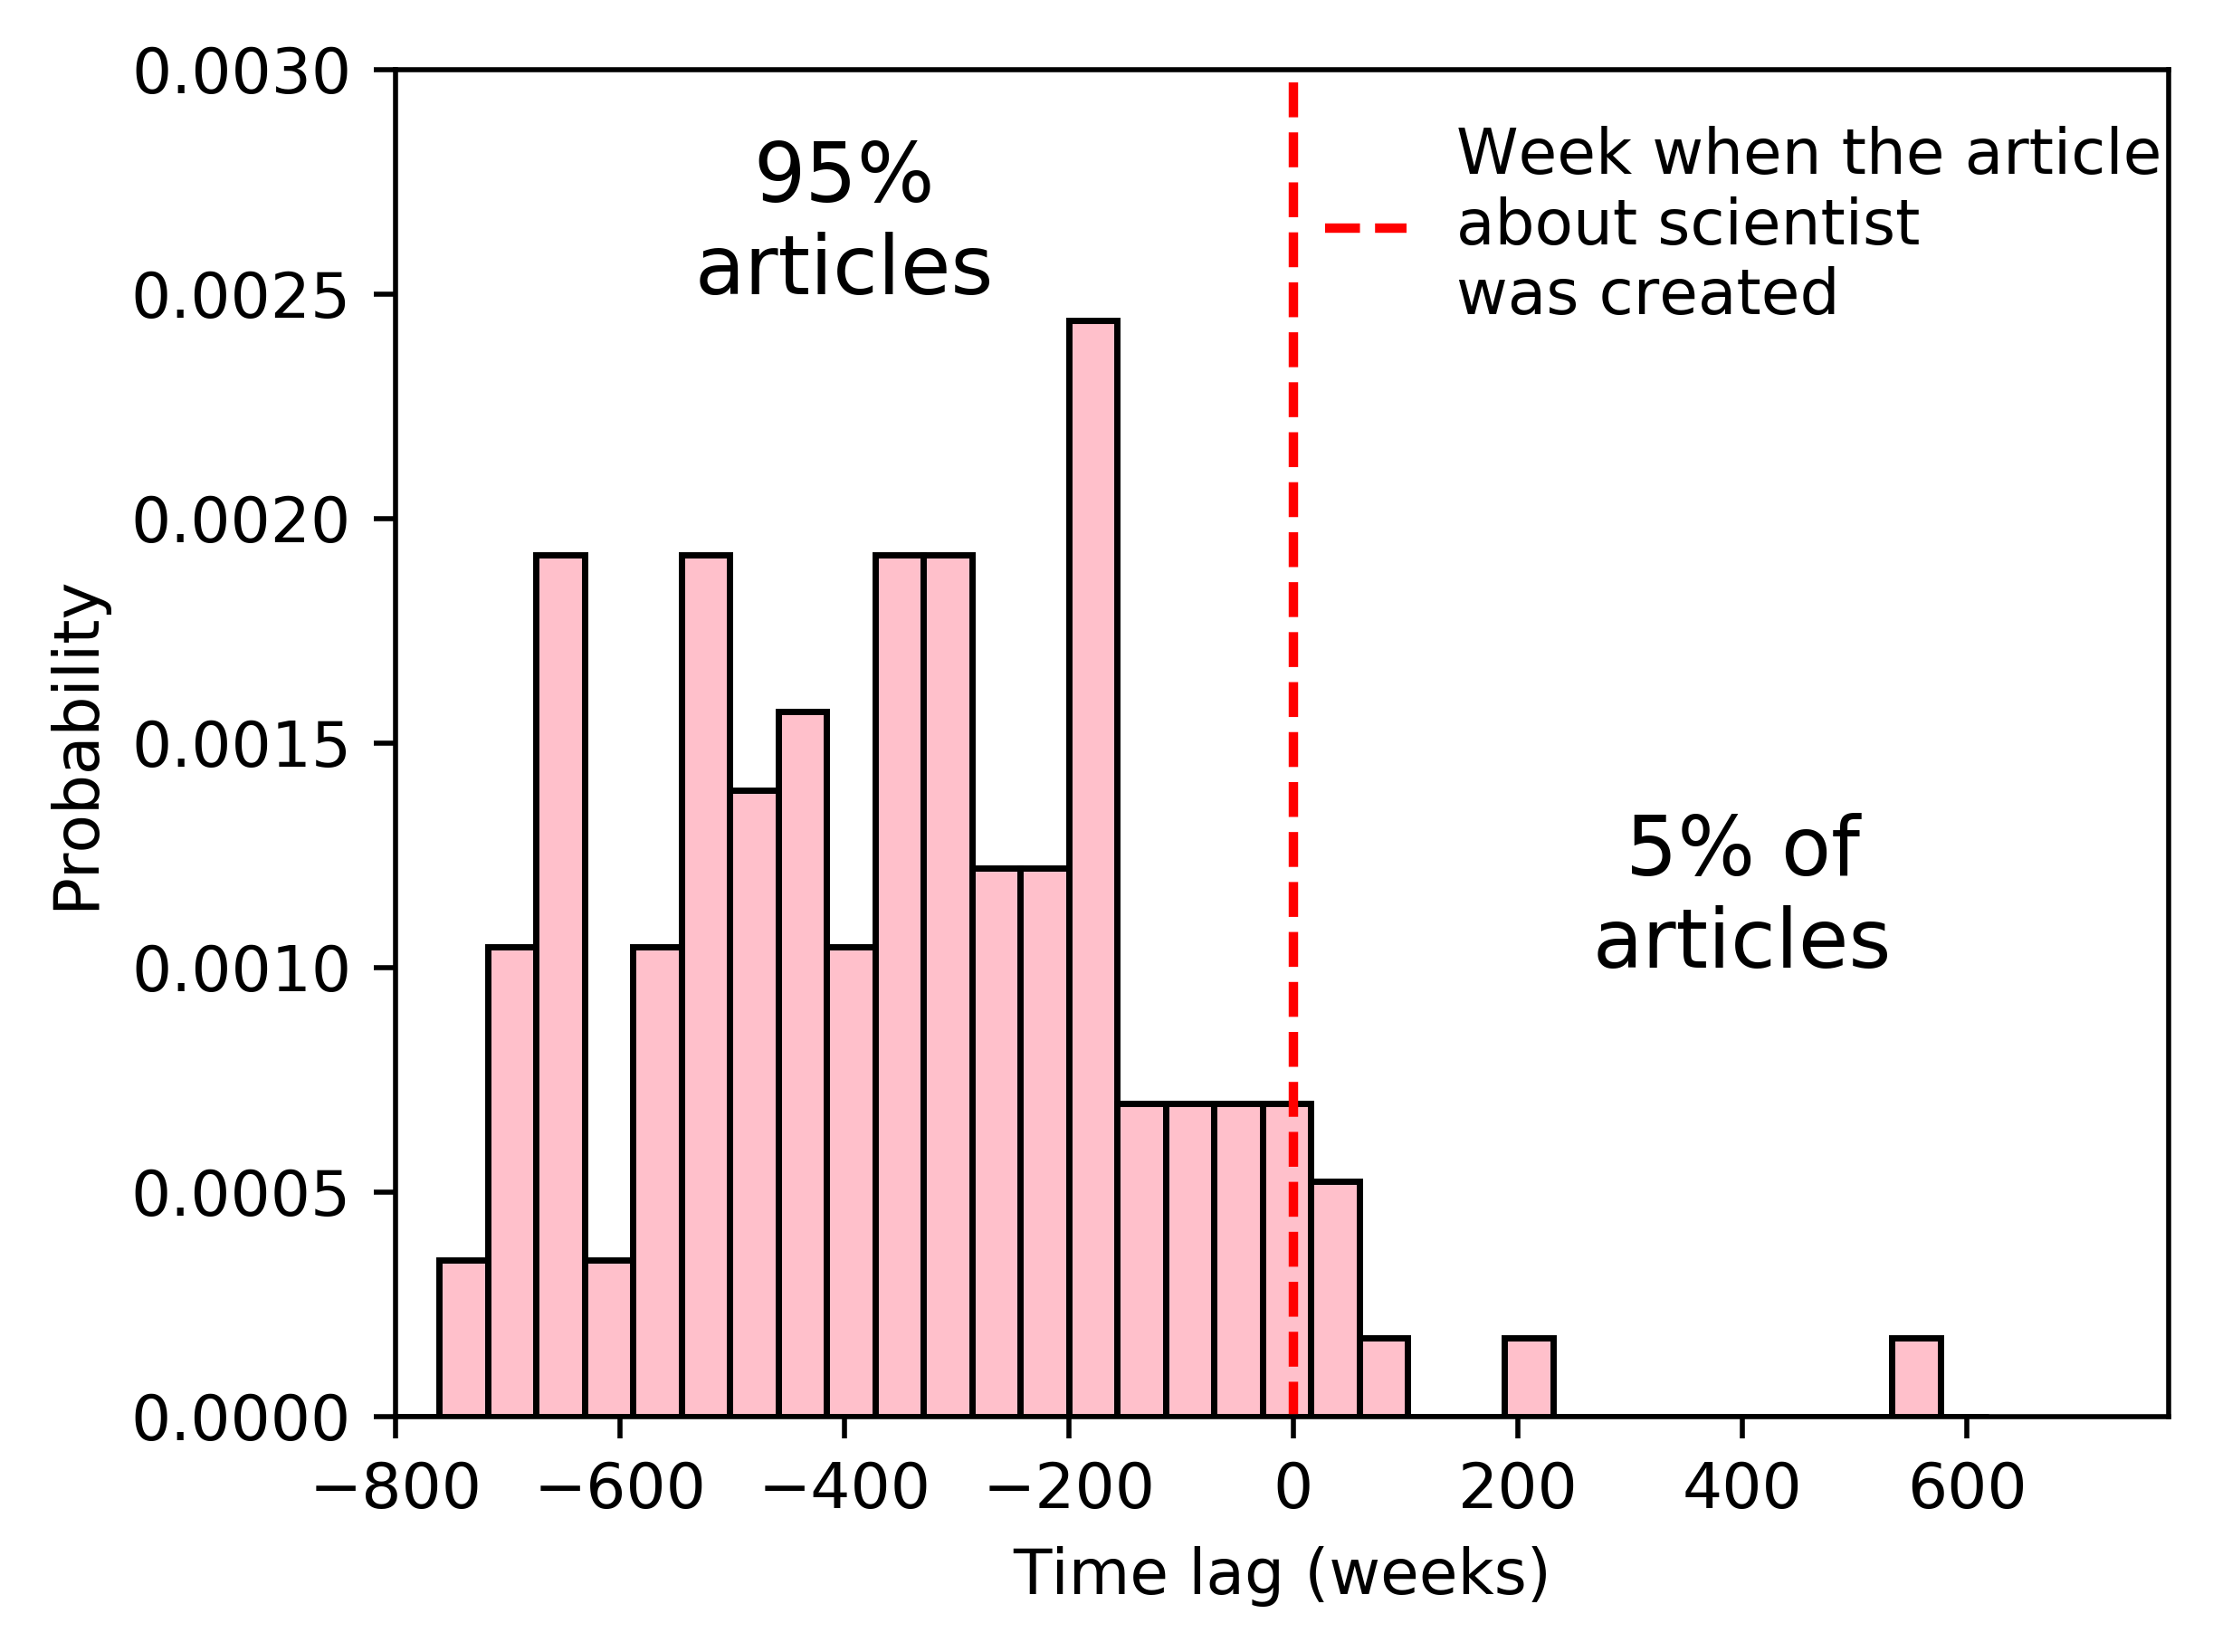

94.7368421053
87.1333333333
Ks_2sampResult(statistic=0.24006015037593986, pvalue=1.0994660229429344e-06)
MannwhitneyuResult(statistic=71191.0, pvalue=2.1343729056261697e-08)


In [268]:
female_sc=list(df[df.gender=="female"].Name)
male_sc=list(df[df.gender=="male"].Name)

baseline_data_male = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc)
baseline_male = weekly_aggregation(baseline_data_male)
print "# of topics",len(baseline_male)
bins_new=plotting(baseline_male, '/timelag_weekly_male.pdf',color="skyblue",period="weeks",text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

baseline_data_female = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,female_sc )
baseline_female = weekly_aggregation(baseline_data_female)
print "# of topics",len(baseline_female)
plotting(baseline_female, '/timelag_weekly_female.pdf',color="pink",period="weeks",text="Female scientist",bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(baseline_female)<0))/len(baseline_female)
print 100*float(np.sum(np.array(baseline_male)<0))/len(baseline_male)
print ks_2samp(baseline_female, baseline_male)
print mannwhitneyu(baseline_female, baseline_male)

https://www.medcalc.org/calc/comparison_of_proportions.php

=====difference calculator

Sample 1
Proportion (%): 94.7
 	
Sample size:  133
 	
Sample 2
Proportion (%):  87.1
 	
Sample size: 1500
    

Difference	7.6 %

95% CI	2.1467 to 10.8428

Chi-squared	6.546

DF 	1

Significance level	P = 0.0105

Physiology or Medicine  male      56
                        female    13
Physics                 male      59
                        female     4
Economics               male      43
                        female     4
Mathematics             male      14
                        female     3
Computer Science        male      15
                        female     2
Chemistry               male      53
                        female     1
Biology                 male       8

# Physiology or Medicine  ( male      56,     female    13)

# of topics 336
Male scientist in Medicine


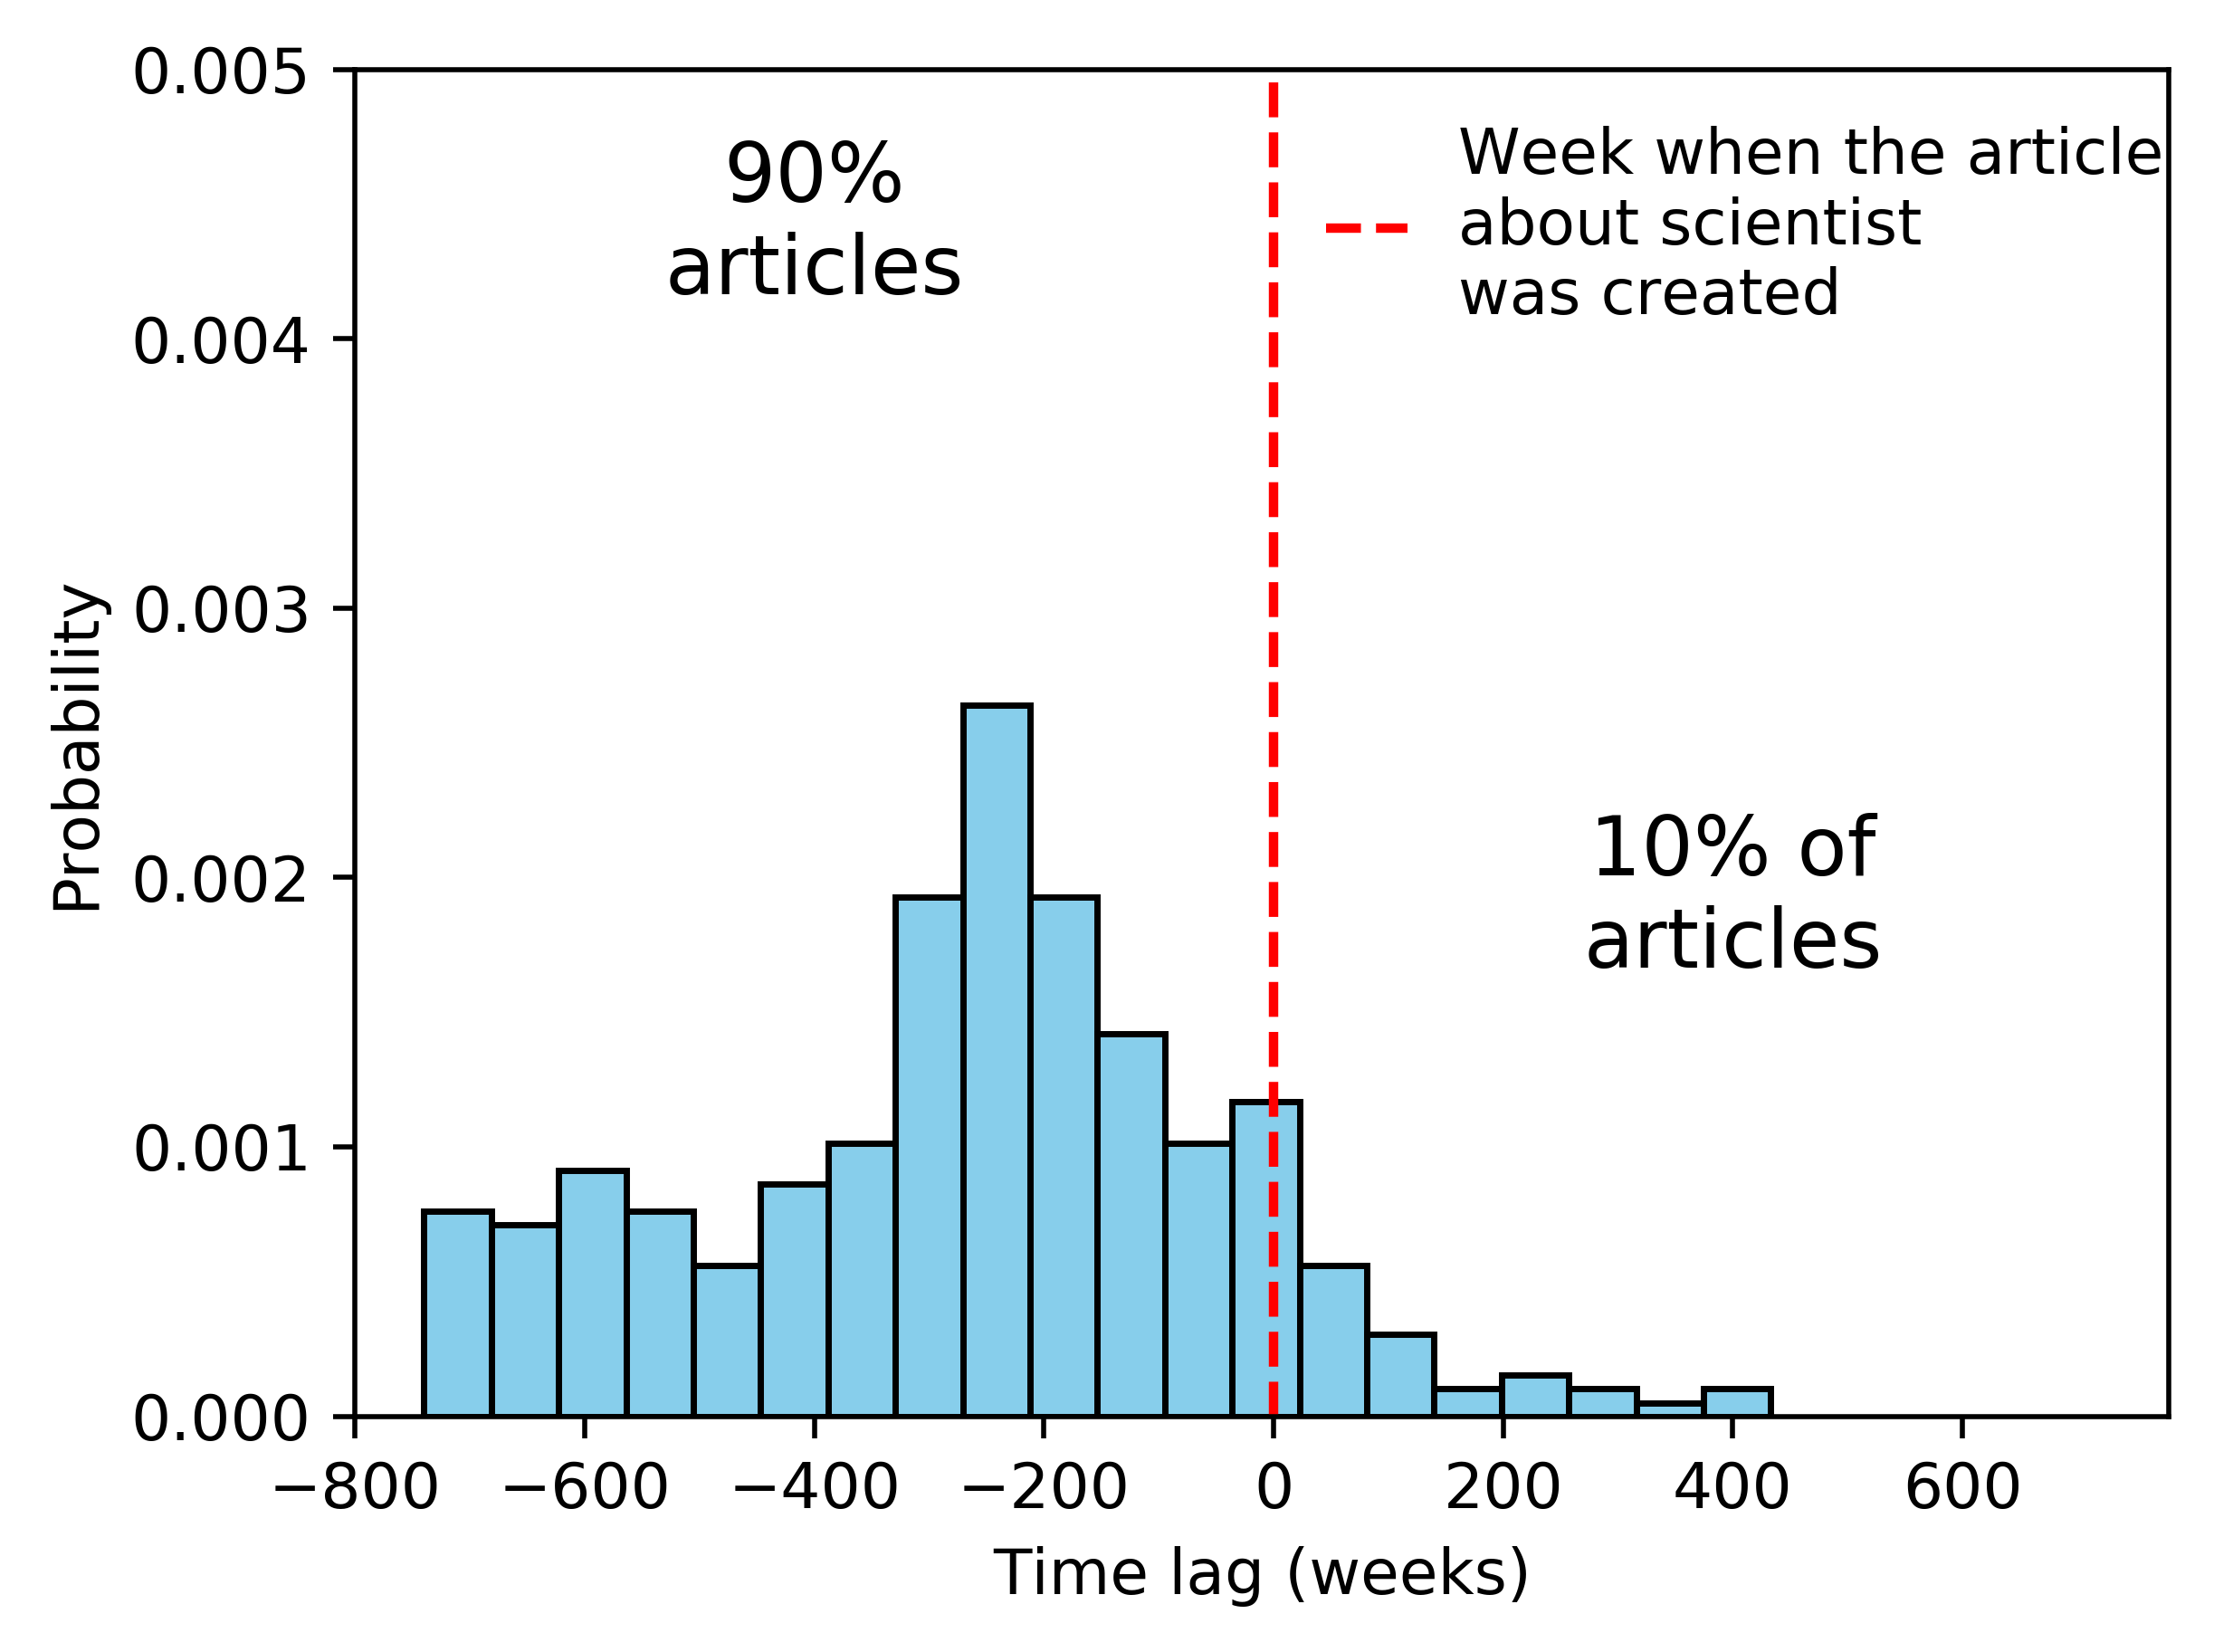

# of topics 57
Female scientist in Medicine


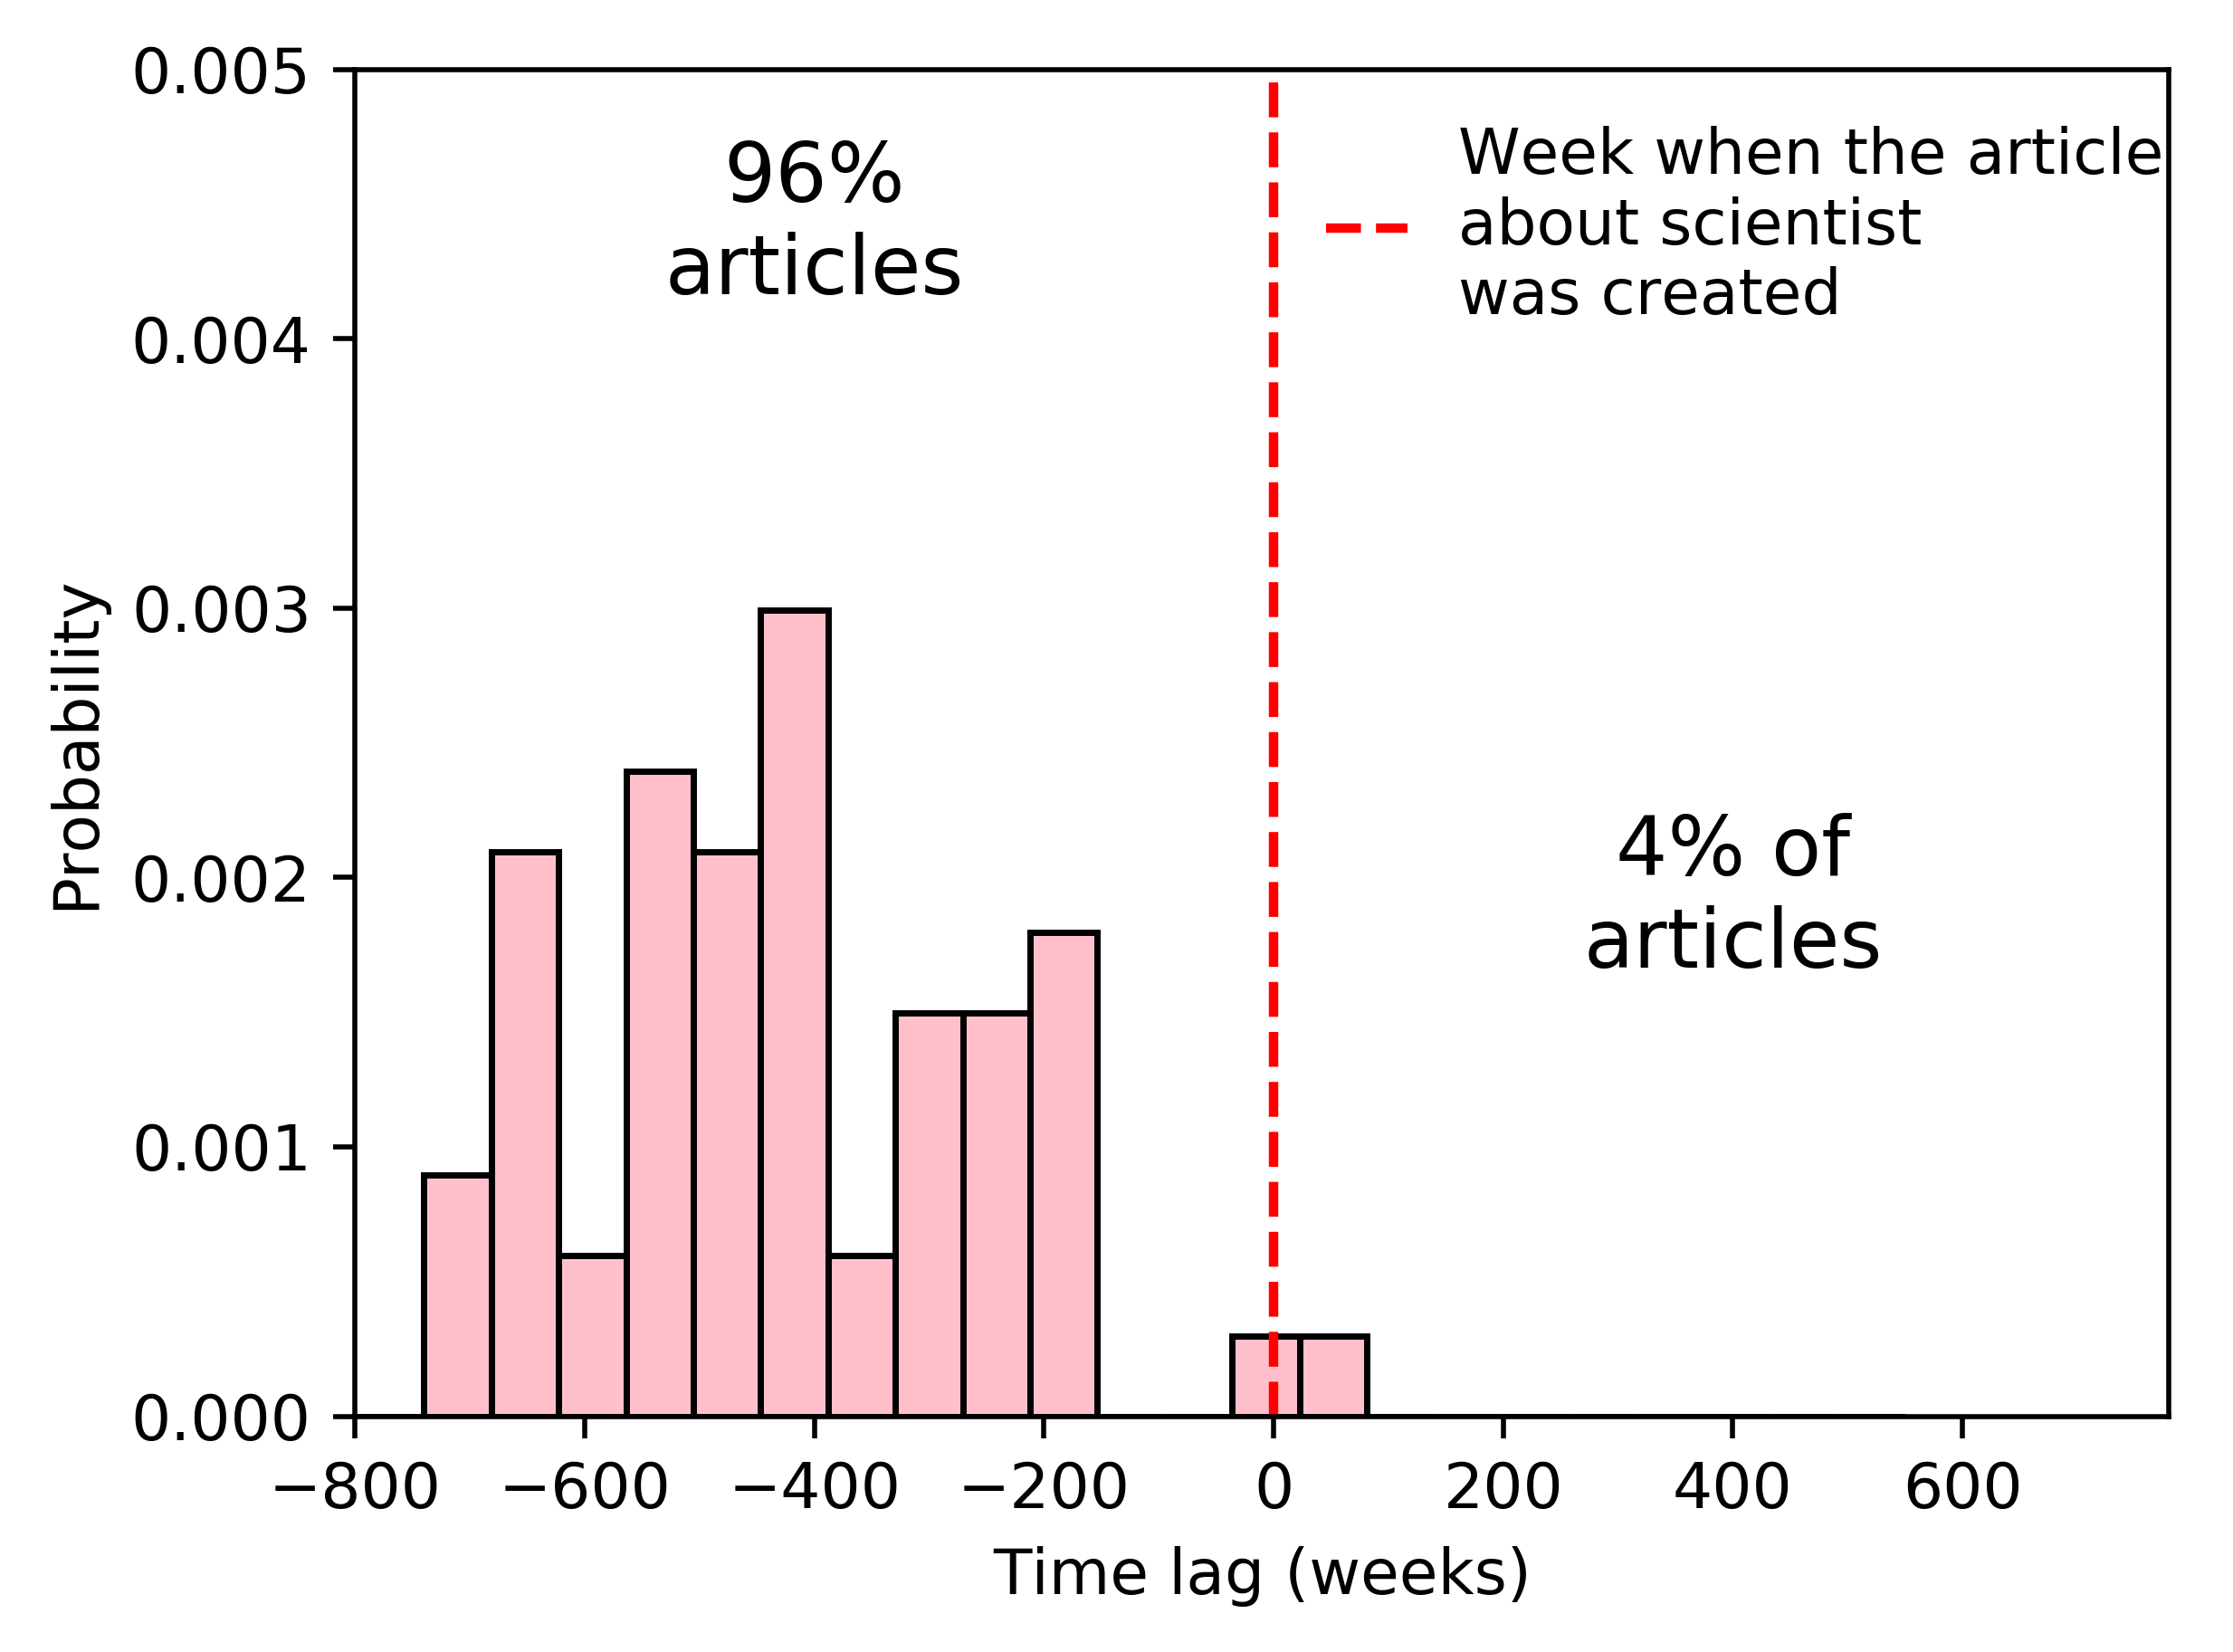

96.4912280702
57
89.5833333333
336
Ks_2sampResult(statistic=0.39254385964912281, pvalue=3.3297046698214825e-07)
MannwhitneyuResult(statistic=5607.0, pvalue=2.7996058034731761e-07)


In [267]:
female_sc_medicine=list(df[(df.gender=="female")&(df.Field=="Physiology or Medicine")].Name)
male_sc_medicine=list(df[(df.gender=="male")&(df.Field=="Physiology or Medicine")].Name)

baseline_data_male_medicine = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc_medicine)
baseline_male_medicine = weekly_aggregation(baseline_data_male_medicine)
print "# of topics",len(baseline_male_medicine)
bins_new=plotting(baseline_male_medicine, '/timelag_weekly_male_medicine.pdf',color="skyblue",period="weeks", lim=0.005, 
         text="Male scientist in Medicine",bins=20)
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

baseline_data_female_medicine=get_series(main_dict_baseline,scientist_dict_baseline,topic_dict_baseline,female_sc_medicine)
baseline_female_medicine = weekly_aggregation(baseline_data_female_medicine)
print "# of topics",len(baseline_female_medicine)
plotting(baseline_female_medicine, '/timelag_weekly_female_medicine.pdf',color="pink",period="weeks", lim=0.005, 
         text="Female scientist in Medicine",bins=bins_plus3)
plt.show()


print 100*float(np.sum(np.array(baseline_female_medicine)<0))/len(baseline_female_medicine)
print len(baseline_female_medicine)
print 100*float(np.sum(np.array(baseline_male_medicine)<0))/len(baseline_male_medicine)
print len(baseline_male_medicine)
print ks_2samp(baseline_female_medicine, baseline_male_medicine)
print mannwhitneyu(baseline_female_medicine, baseline_male_medicine)

https://www.medcalc.org/calc/comparison_of_proportions.php

=====difference calculator

Difference	6.91%

95% CI	-1.9663 to 11.4207

Chi-squared	2.721

DF 	1

Significance level	P = 0.0991


# Physics

# of topics 422
Male scientist in Medicine


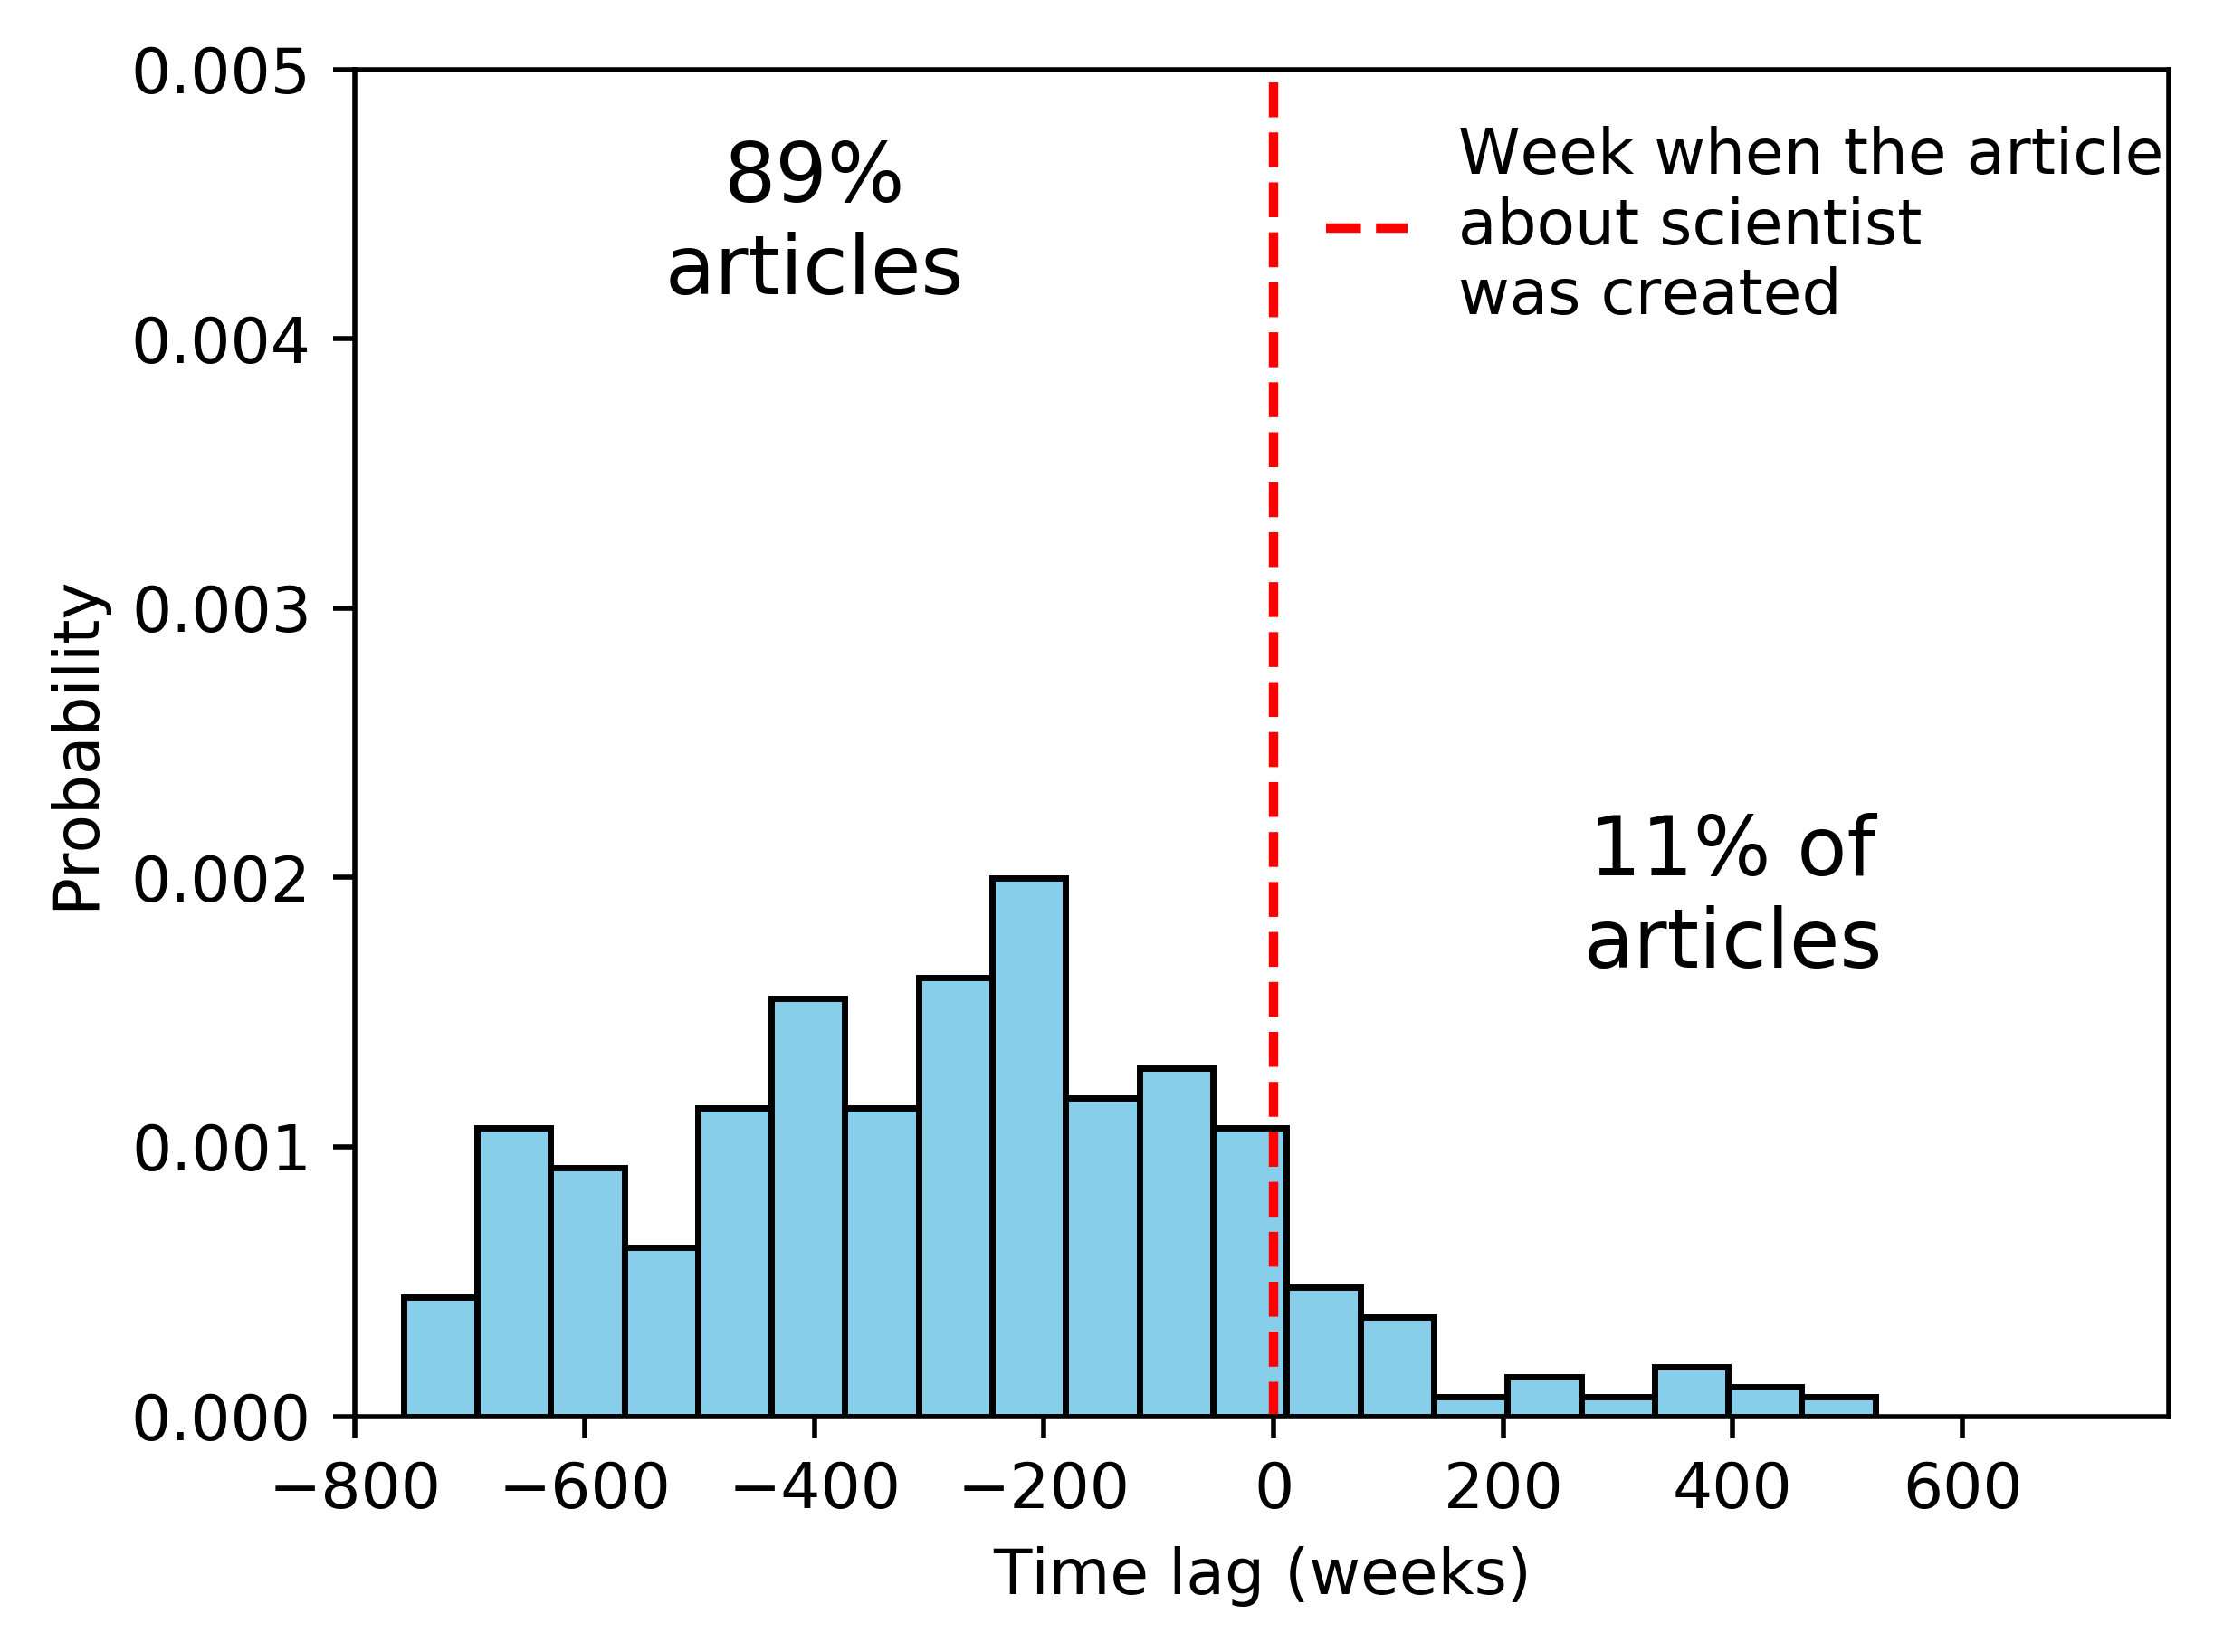

# of topics 13
Female scientist in Medicine


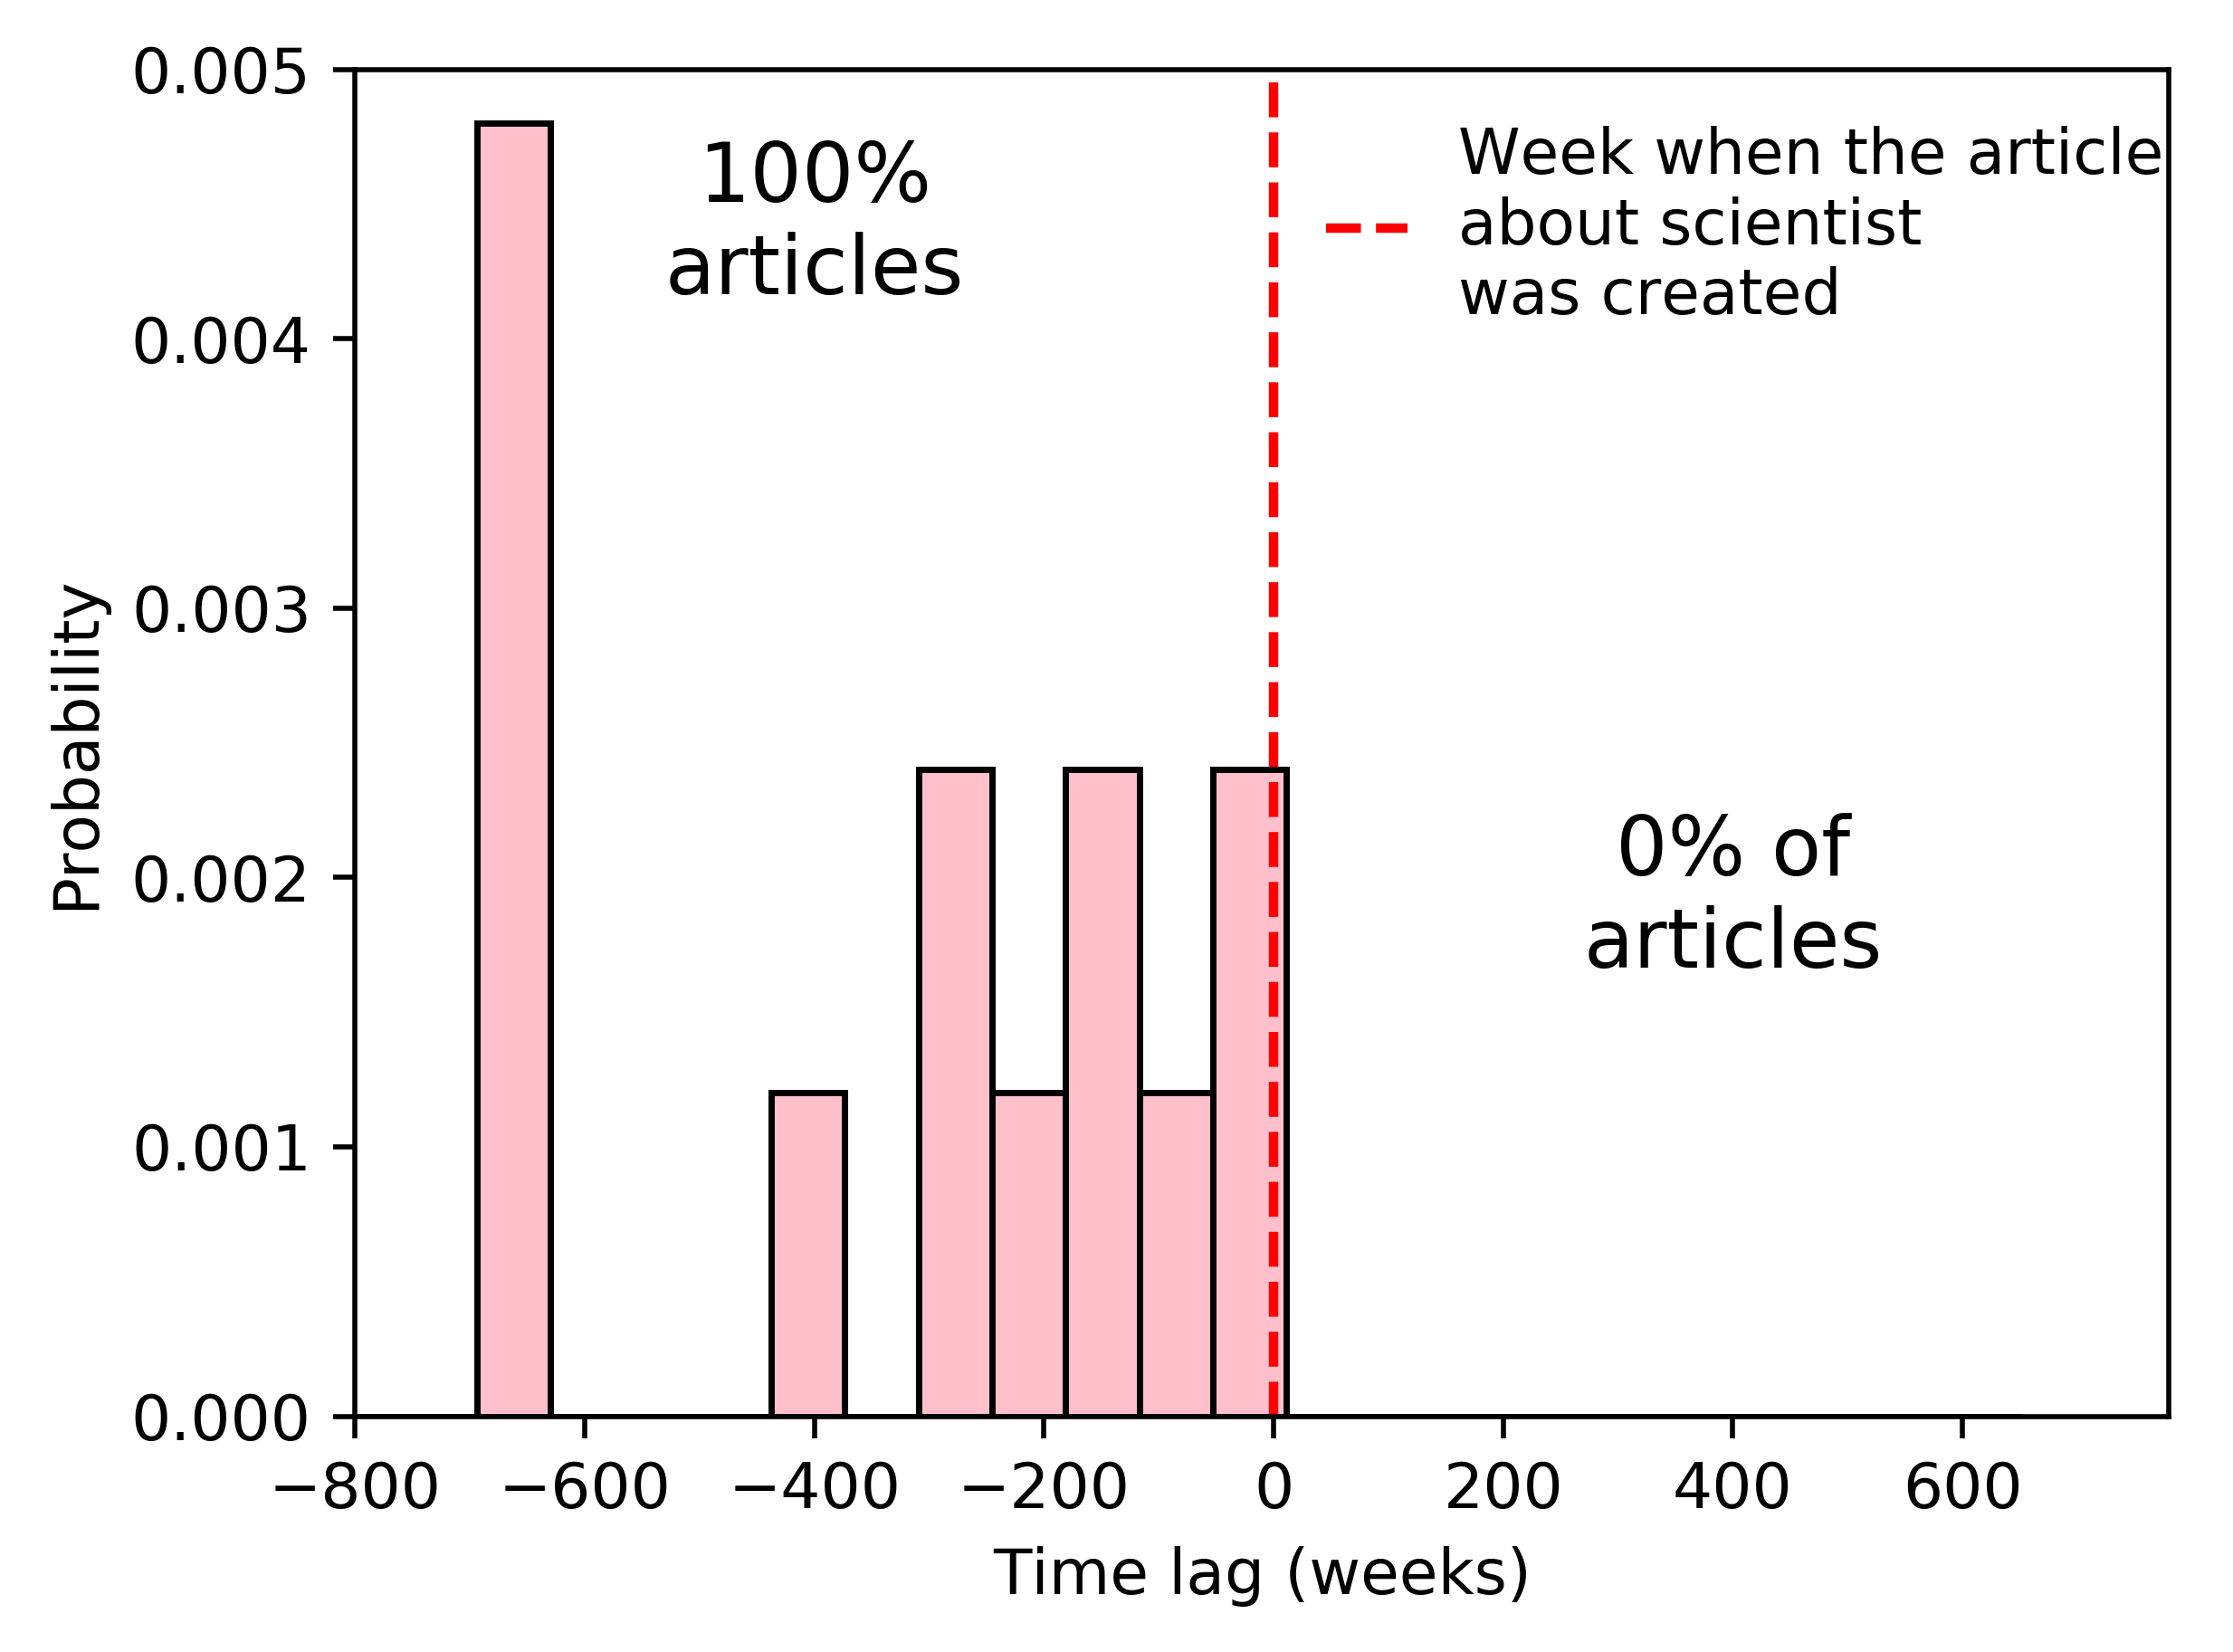

100.0
13
88.6255924171
422
Ks_2sampResult(statistic=0.22712358731316079, pvalue=0.47929876700111906)
MannwhitneyuResult(statistic=2557.5, pvalue=0.33929960296138623)


In [265]:
female_sc_medicine=list(df[(df.gender=="female")&(df.Field=="Physics")].Name)
male_sc_medicine=list(df[(df.gender=="male")&(df.Field=="Physics")].Name)

baseline_data_male_medicine = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc_medicine)
baseline_male_medicine = weekly_aggregation(baseline_data_male_medicine)
print "# of topics",len(baseline_male_medicine)
bins_new=plotting(baseline_male_medicine, '/timelag_weekly_male_physics.pdf',color="skyblue",period="weeks", lim=0.005, 
         text="Male scientist in Medicine",bins=20)
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

baseline_data_female_medicine=get_series(main_dict_baseline,scientist_dict_baseline,topic_dict_baseline,female_sc_medicine)
baseline_female_medicine = weekly_aggregation(baseline_data_female_medicine)
print "# of topics",len(baseline_female_medicine)
plotting(baseline_female_medicine, '/timelag_weekly_female_physics.pdf',color="pink",period="weeks", lim=0.005, 
         text="Female scientist in Medicine",bins=bins_plus3)
plt.show()


print 100*float(np.sum(np.array(baseline_female_medicine)<0))/len(baseline_female_medicine)
print len(baseline_female_medicine)
print 100*float(np.sum(np.array(baseline_male_medicine)<0))/len(baseline_male_medicine)
print len(baseline_male_medicine)
print ks_2samp(baseline_female_medicine, baseline_male_medicine)
print mannwhitneyu(baseline_female_medicine, baseline_male_medicine)

https://www.medcalc.org/calc/comparison_of_proportions.php

=====difference calculator

Difference	11.37%

95% CI	-11.5972 to 14.7536

Chi-squared	1.658

DF 	1

Significance level	P = 0.1979

# Economics

4
43
# of topics 218
Male scientist in Medicine


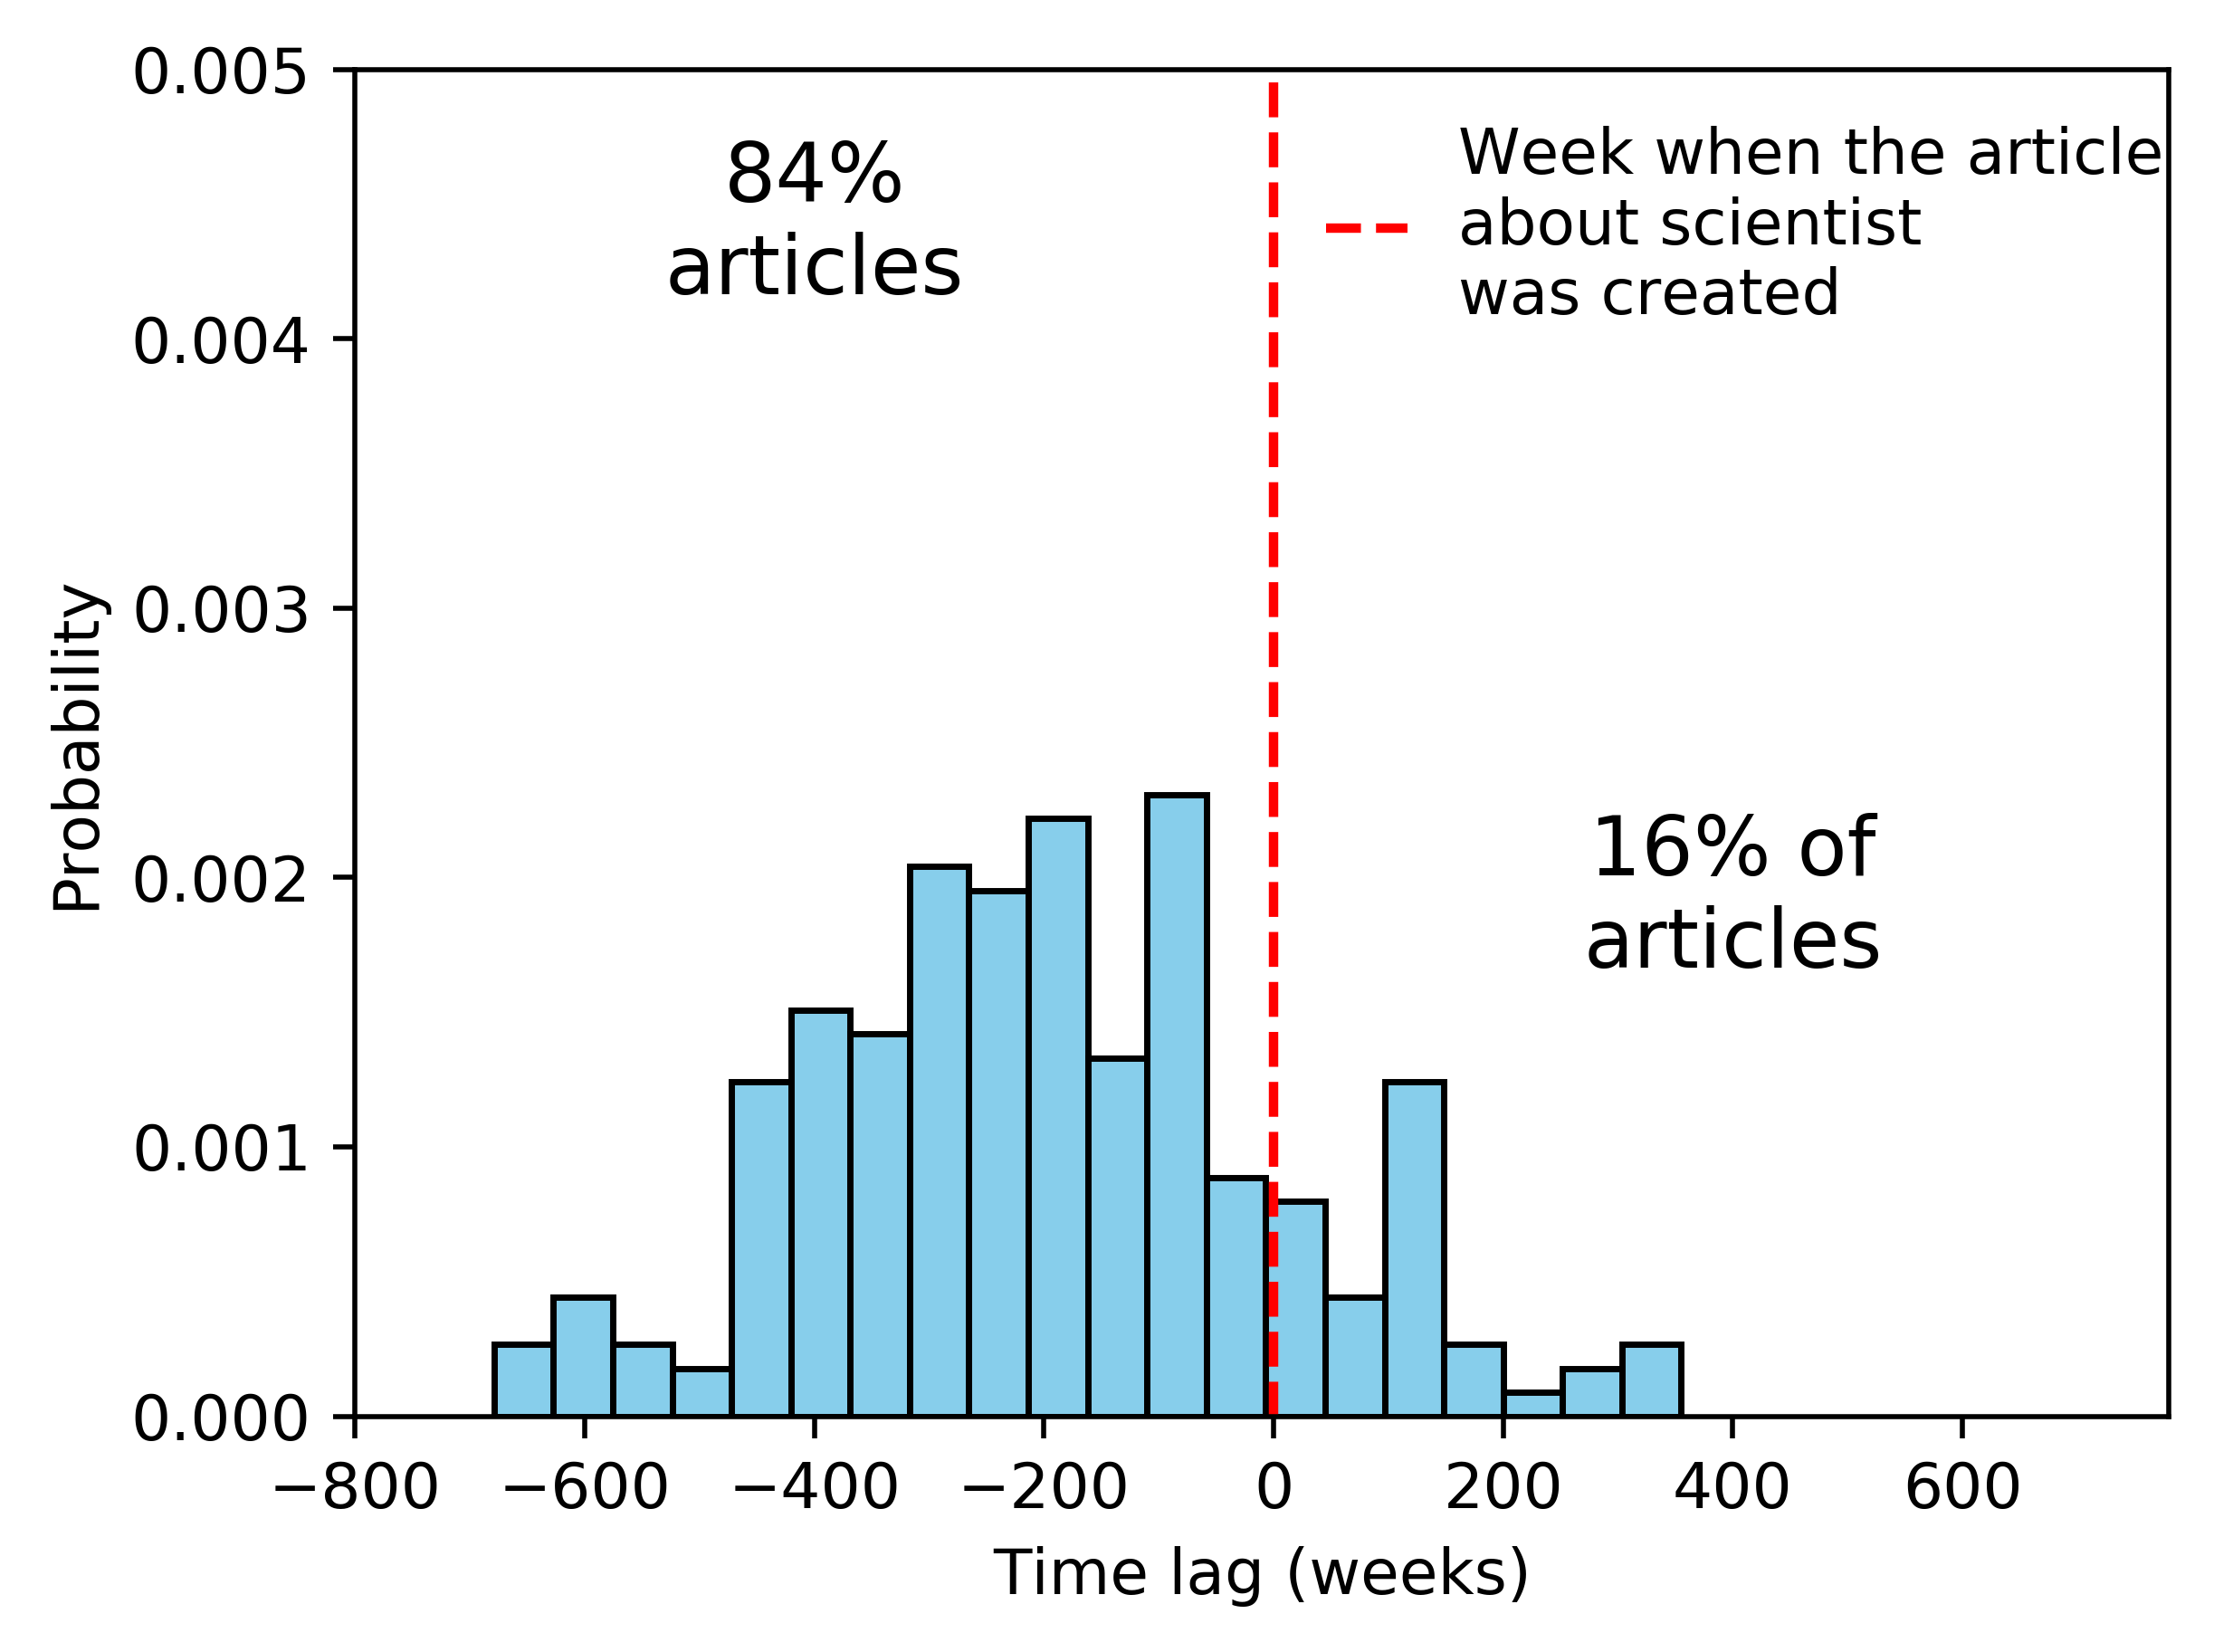

# of topics 28
Female scientist in Medicine


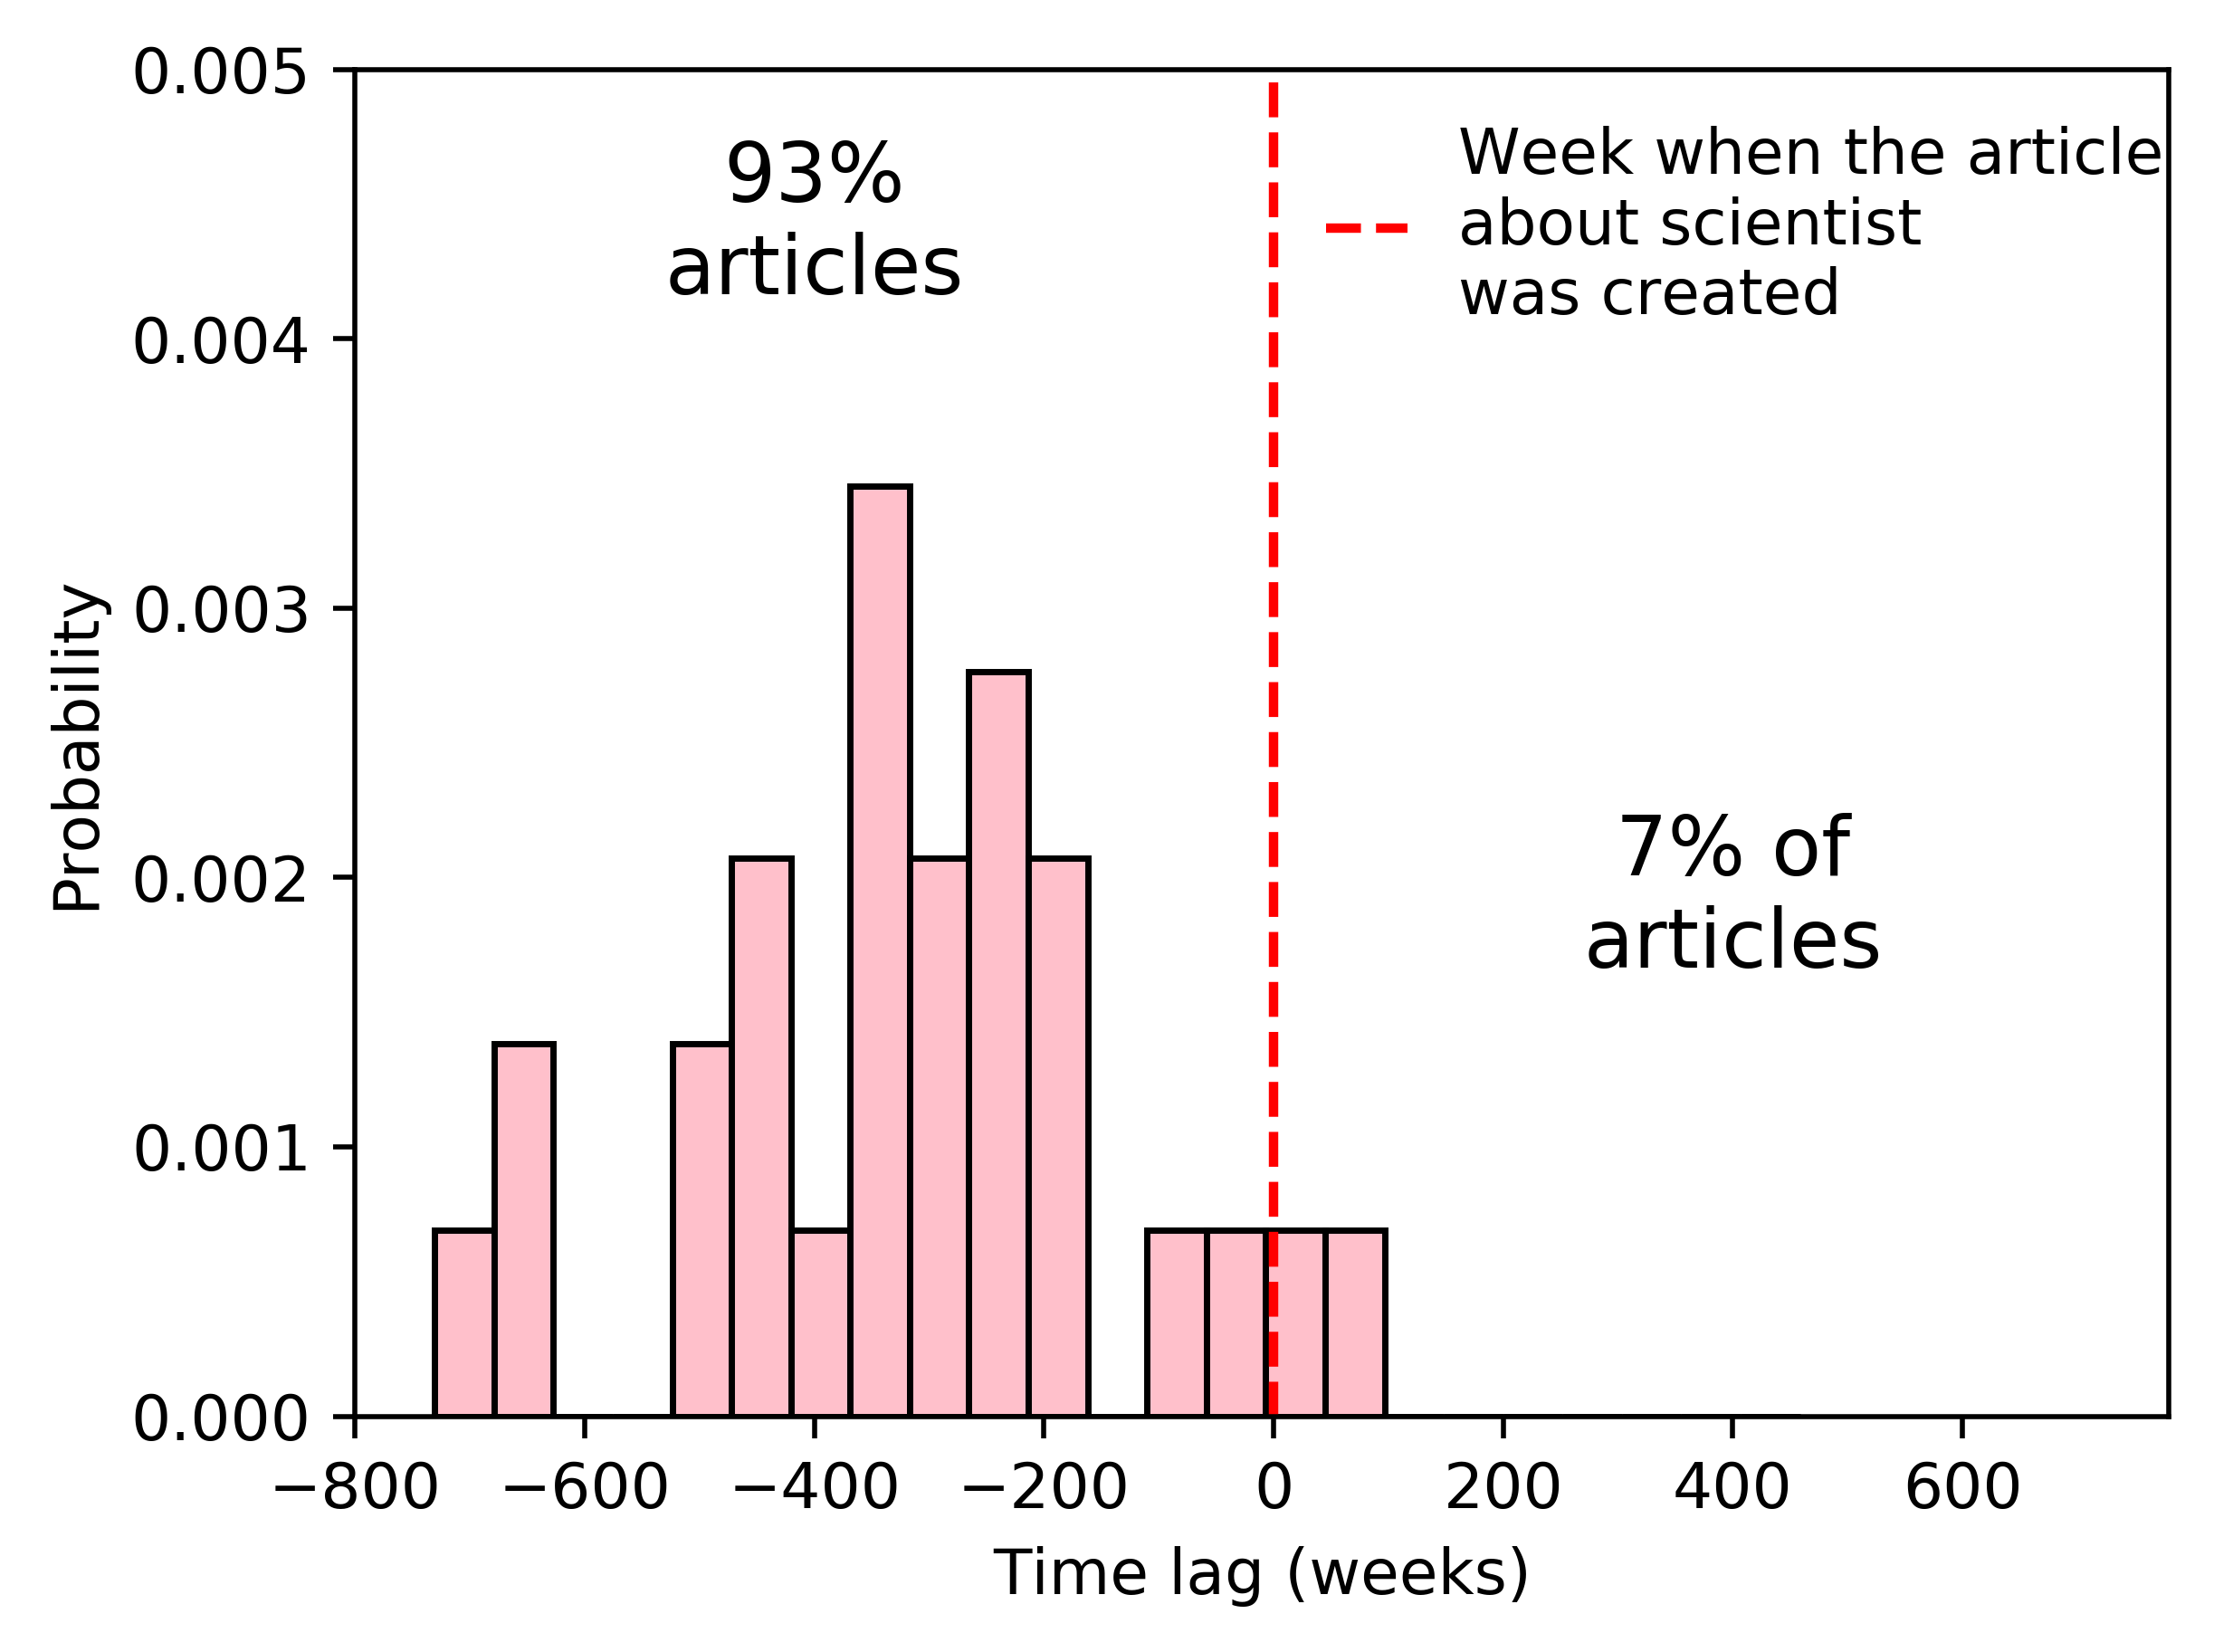

92.8571428571
28
83.9449541284
218
Ks_2sampResult(statistic=0.32339449541284404, pvalue=0.0082524856789146887)
MannwhitneyuResult(statistic=2054.5, pvalue=0.0024557291533672141)


In [264]:
female_sc_medicine=list(df[(df.gender=="female")&(df.Field=="Economics")].Name)
male_sc_medicine=list(df[(df.gender=="male")&(df.Field=="Economics")].Name)
print len(female_sc_medicine)
print len(male_sc_medicine)

baseline_data_male_medicine = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc_medicine)
baseline_male_medicine = weekly_aggregation(baseline_data_male_medicine)
print "# of topics",len(baseline_male_medicine)
bins_new=plotting(baseline_male_medicine, '/timelag_weekly_male_economincs.pdf',color="skyblue",period="weeks", lim=0.005, 
         text="Male scientist in Medicine",bins=20)
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

baseline_data_female_medicine=get_series(main_dict_baseline,scientist_dict_baseline,topic_dict_baseline,female_sc_medicine)
baseline_female_medicine = weekly_aggregation(baseline_data_female_medicine)
print "# of topics",len(baseline_female_medicine)
plotting(baseline_female_medicine, '/timelag_weekly_female_economincs.pdf',color="pink",period="weeks", lim=0.005, 
         text="Female scientist in Medicine",bins=bins_plus3)
plt.show()


print 100*float(np.sum(np.array(baseline_female_medicine)<0))/len(baseline_female_medicine)
print len(baseline_female_medicine)
print 100*float(np.sum(np.array(baseline_male_medicine)<0))/len(baseline_male_medicine)
print len(baseline_male_medicine)
print ks_2samp(baseline_female_medicine, baseline_male_medicine)
print mannwhitneyu(baseline_female_medicine, baseline_male_medicine)

https://www.medcalc.org/calc/comparison_of_proportions.php

=====difference calculator

Difference	8.92%

95% CI	-7.1614 to 16.4288

Chi-squared	1.538

DF 	1

Significance level	P = 0.2149


# Physiology or Medicine, Economics, Physics (m 158, f 21)

21
158
# of topics 976
Male scientist in big fields


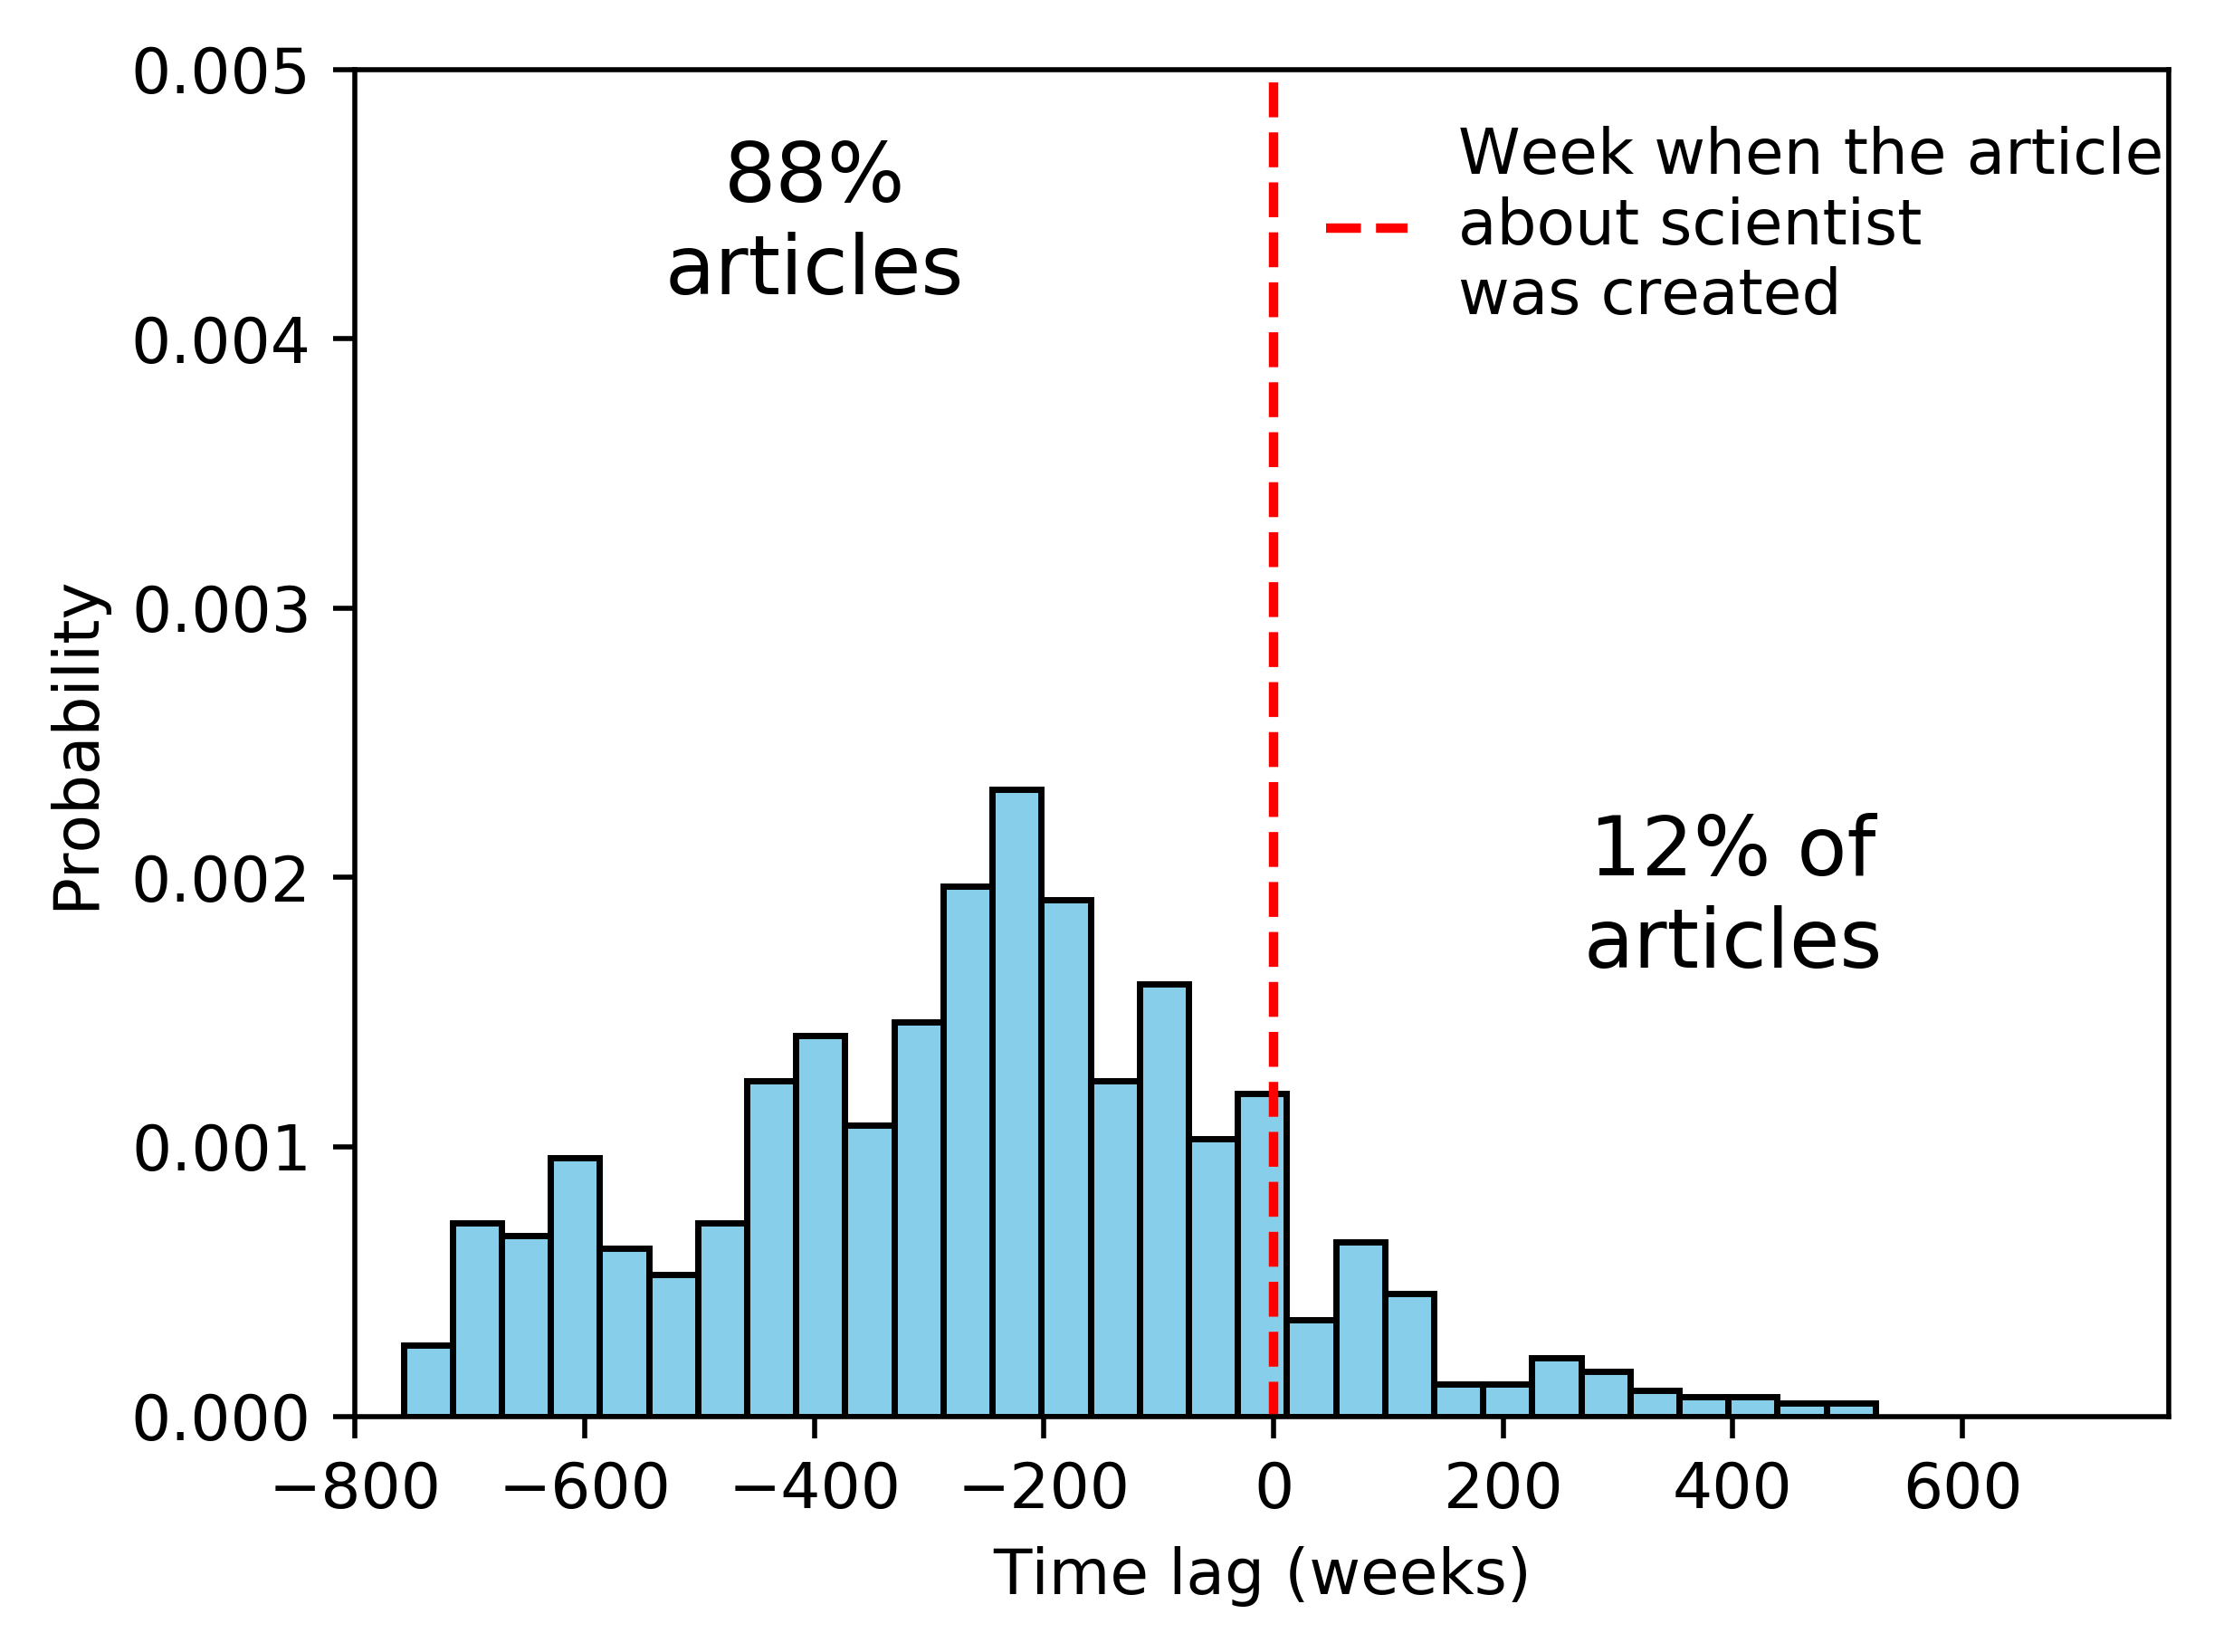

# of topics 98
Female scientist in big fields


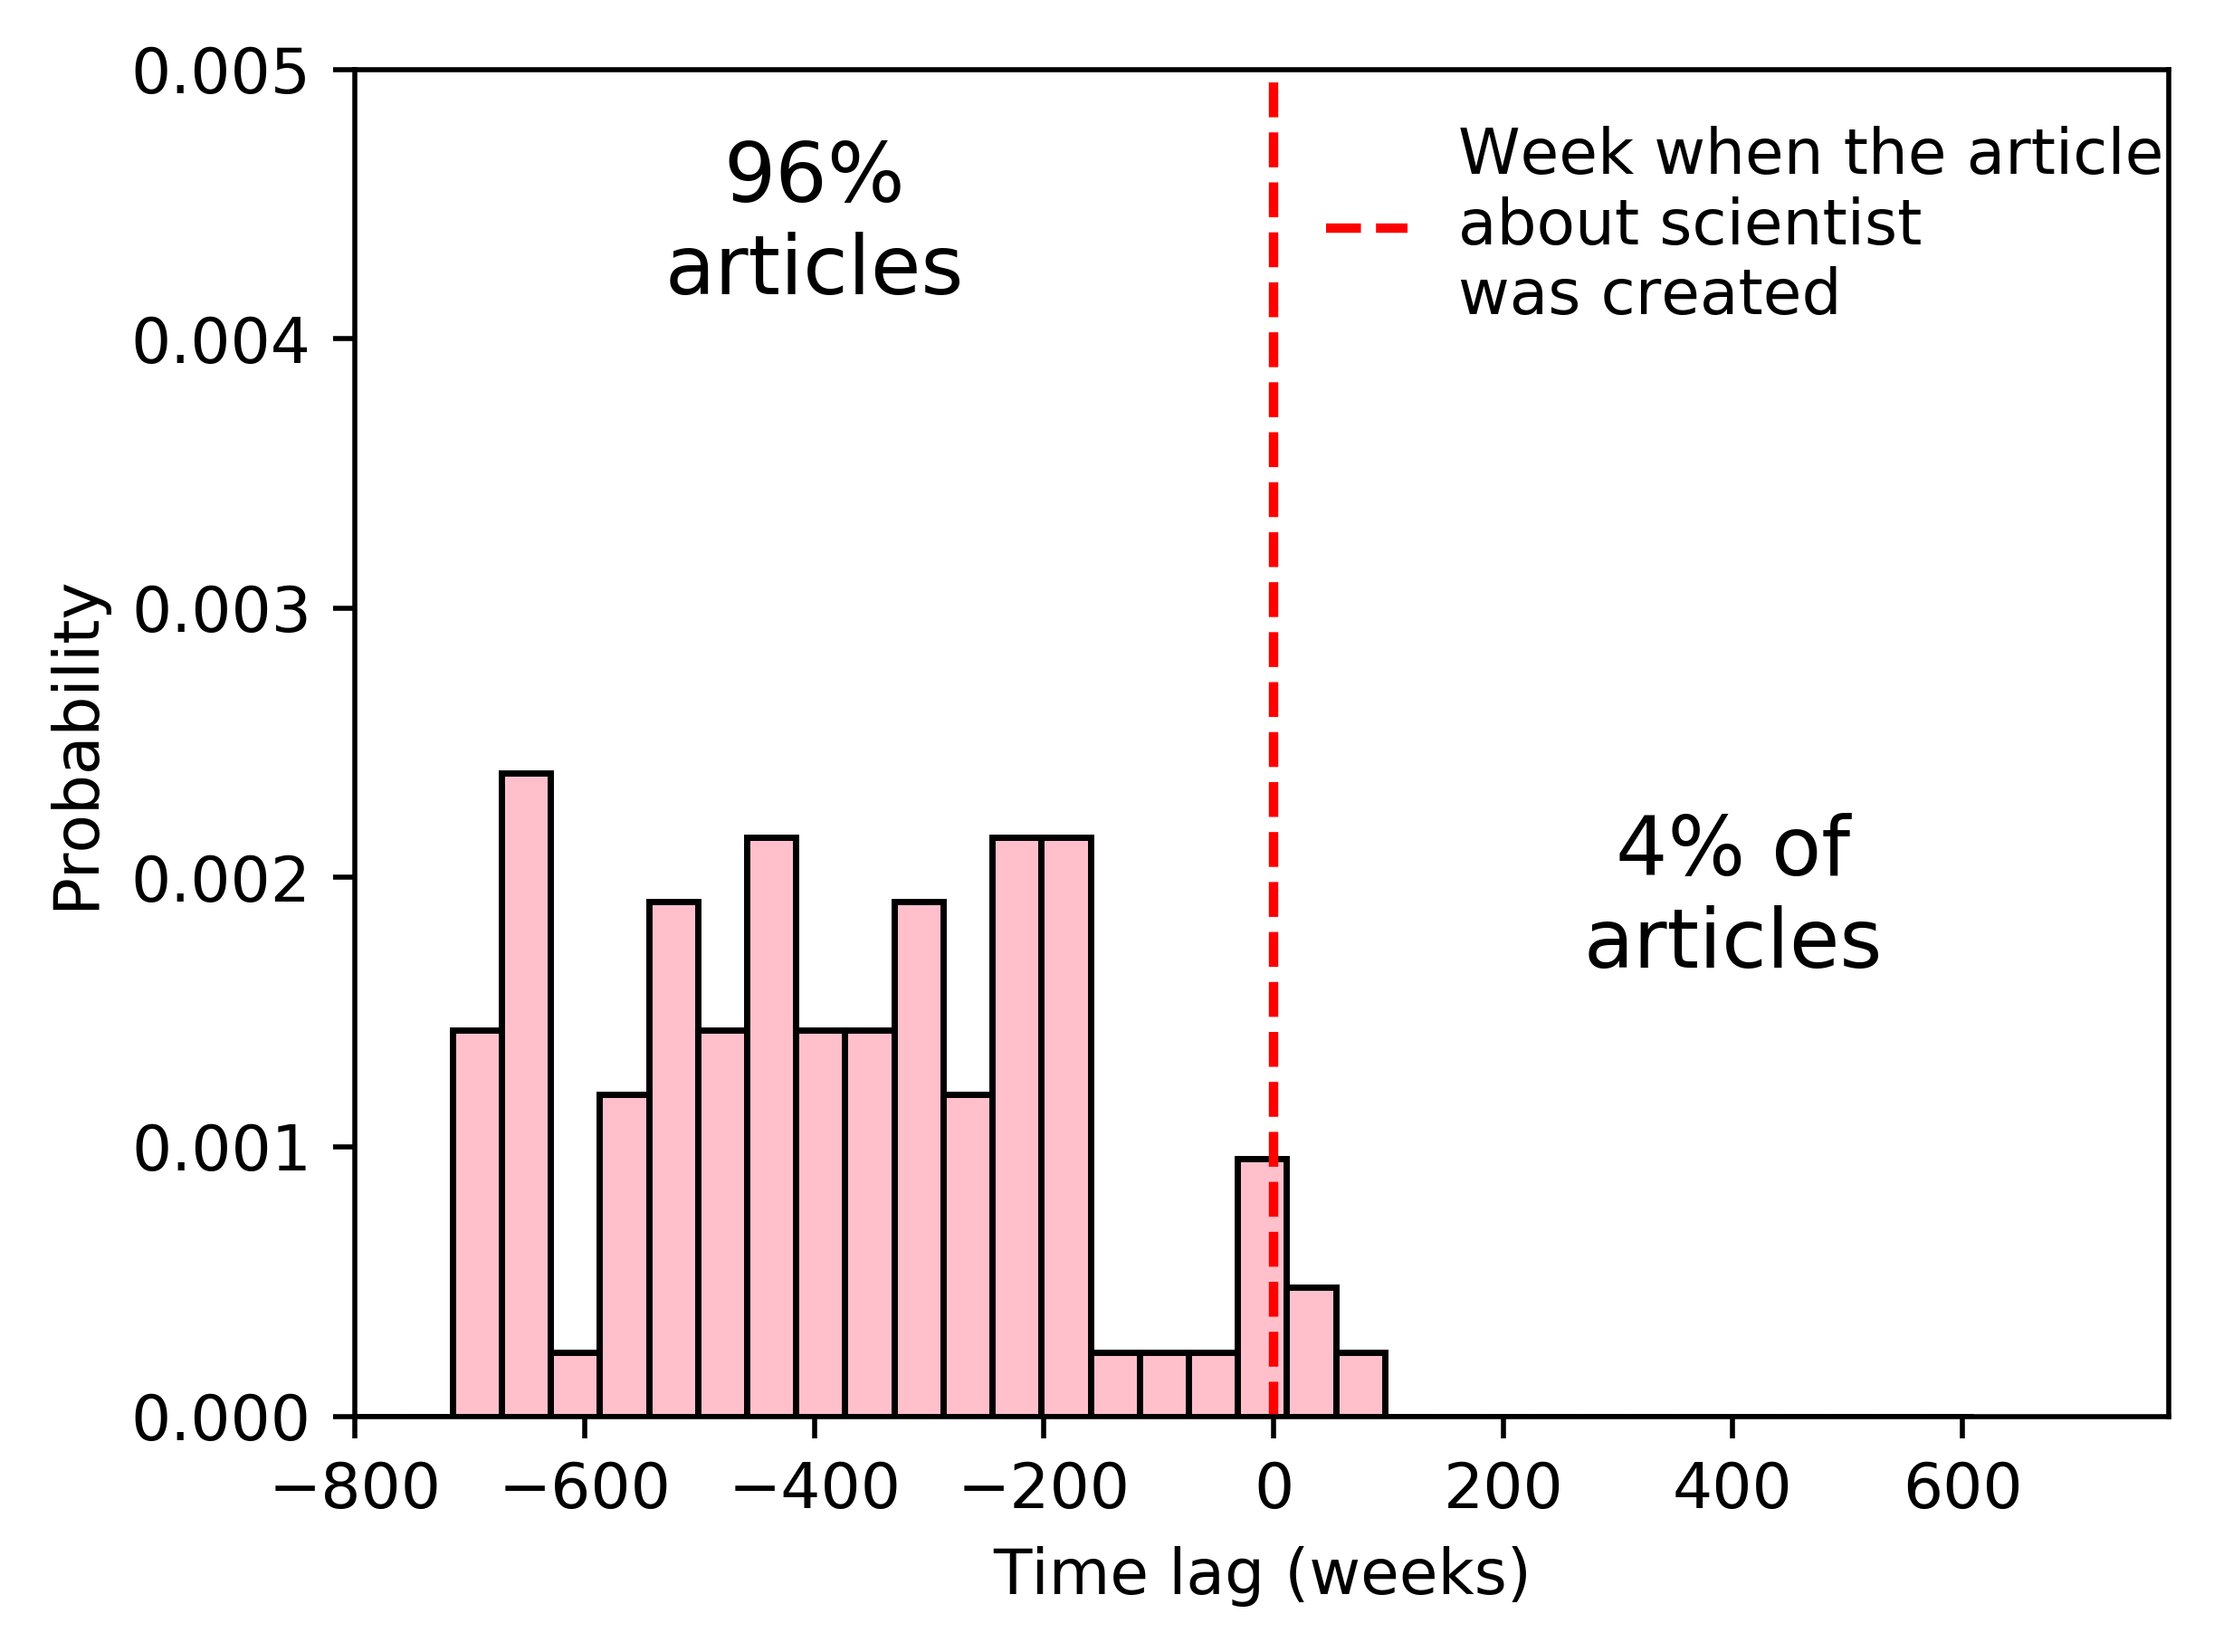

95.9183673469
98
87.9098360656
976
Ks_2sampResult(statistic=0.25493476078956168, pvalue=1.3563441931577301e-05)
MannwhitneyuResult(statistic=32860.5, pvalue=1.5960616530914982e-07)


In [266]:
female_sc_bigfields=list(df[(df.gender=="female")&(df.Field.isin(["Physiology or Medicine","Economics","Physics"]))].Name)
male_sc_bigfields=list(df[(df.gender=="male")&(df.Field.isin(["Physiology or Medicine","Economics","Physics"]))].Name)

print len(female_sc_bigfields)
print len(male_sc_bigfields)


baseline_data_male_medicine = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc_bigfields)
baseline_male_medicine = weekly_aggregation(baseline_data_male_medicine)
print "# of topics",len(baseline_male_medicine)
bins_new=plotting(baseline_male_medicine, '/timelag_weekly_male_bigfields.pdf',color="skyblue",period="weeks", lim=0.005,
         text="Male scientist in big fields")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

baseline_data_female_medicine=get_series(main_dict_baseline,scientist_dict_baseline,topic_dict_baseline,female_sc_bigfields)
baseline_female_medicine = weekly_aggregation(baseline_data_female_medicine)
print "# of topics",len(baseline_female_medicine)
plotting(baseline_female_medicine, '/timelag_weekly_female_bigfields.pdf',color="pink",period="weeks", lim=0.005,
         text="Female scientist in big fields",bins=bins_plus3)
plt.show()



print 100*float(np.sum(np.array(baseline_female_medicine)<0))/len(baseline_female_medicine)
print len(baseline_female_medicine)
print 100*float(np.sum(np.array(baseline_male_medicine)<0))/len(baseline_male_medicine)
print len(baseline_male_medicine)
print ks_2samp(baseline_female_medicine, baseline_male_medicine)
print mannwhitneyu(baseline_female_medicine, baseline_male_medicine)

https://www.medcalc.org/calc/comparison_of_proportions.php

=====difference calculator

Difference	6.32%

95% CI	0.1104 to 9.5617

Chi-squared	4.005

DF 	1

Significance level	P = 0.0454


In [ ]:
Mathematics             male      14
                        female     3
Computer Science        male      15
                        female     2
Chemistry               male      53
                        female     1
Biology                 male       8

# Mathematics           (  male      14,         female     3)

3
14
# of topics 116
Male scientist in Medicine


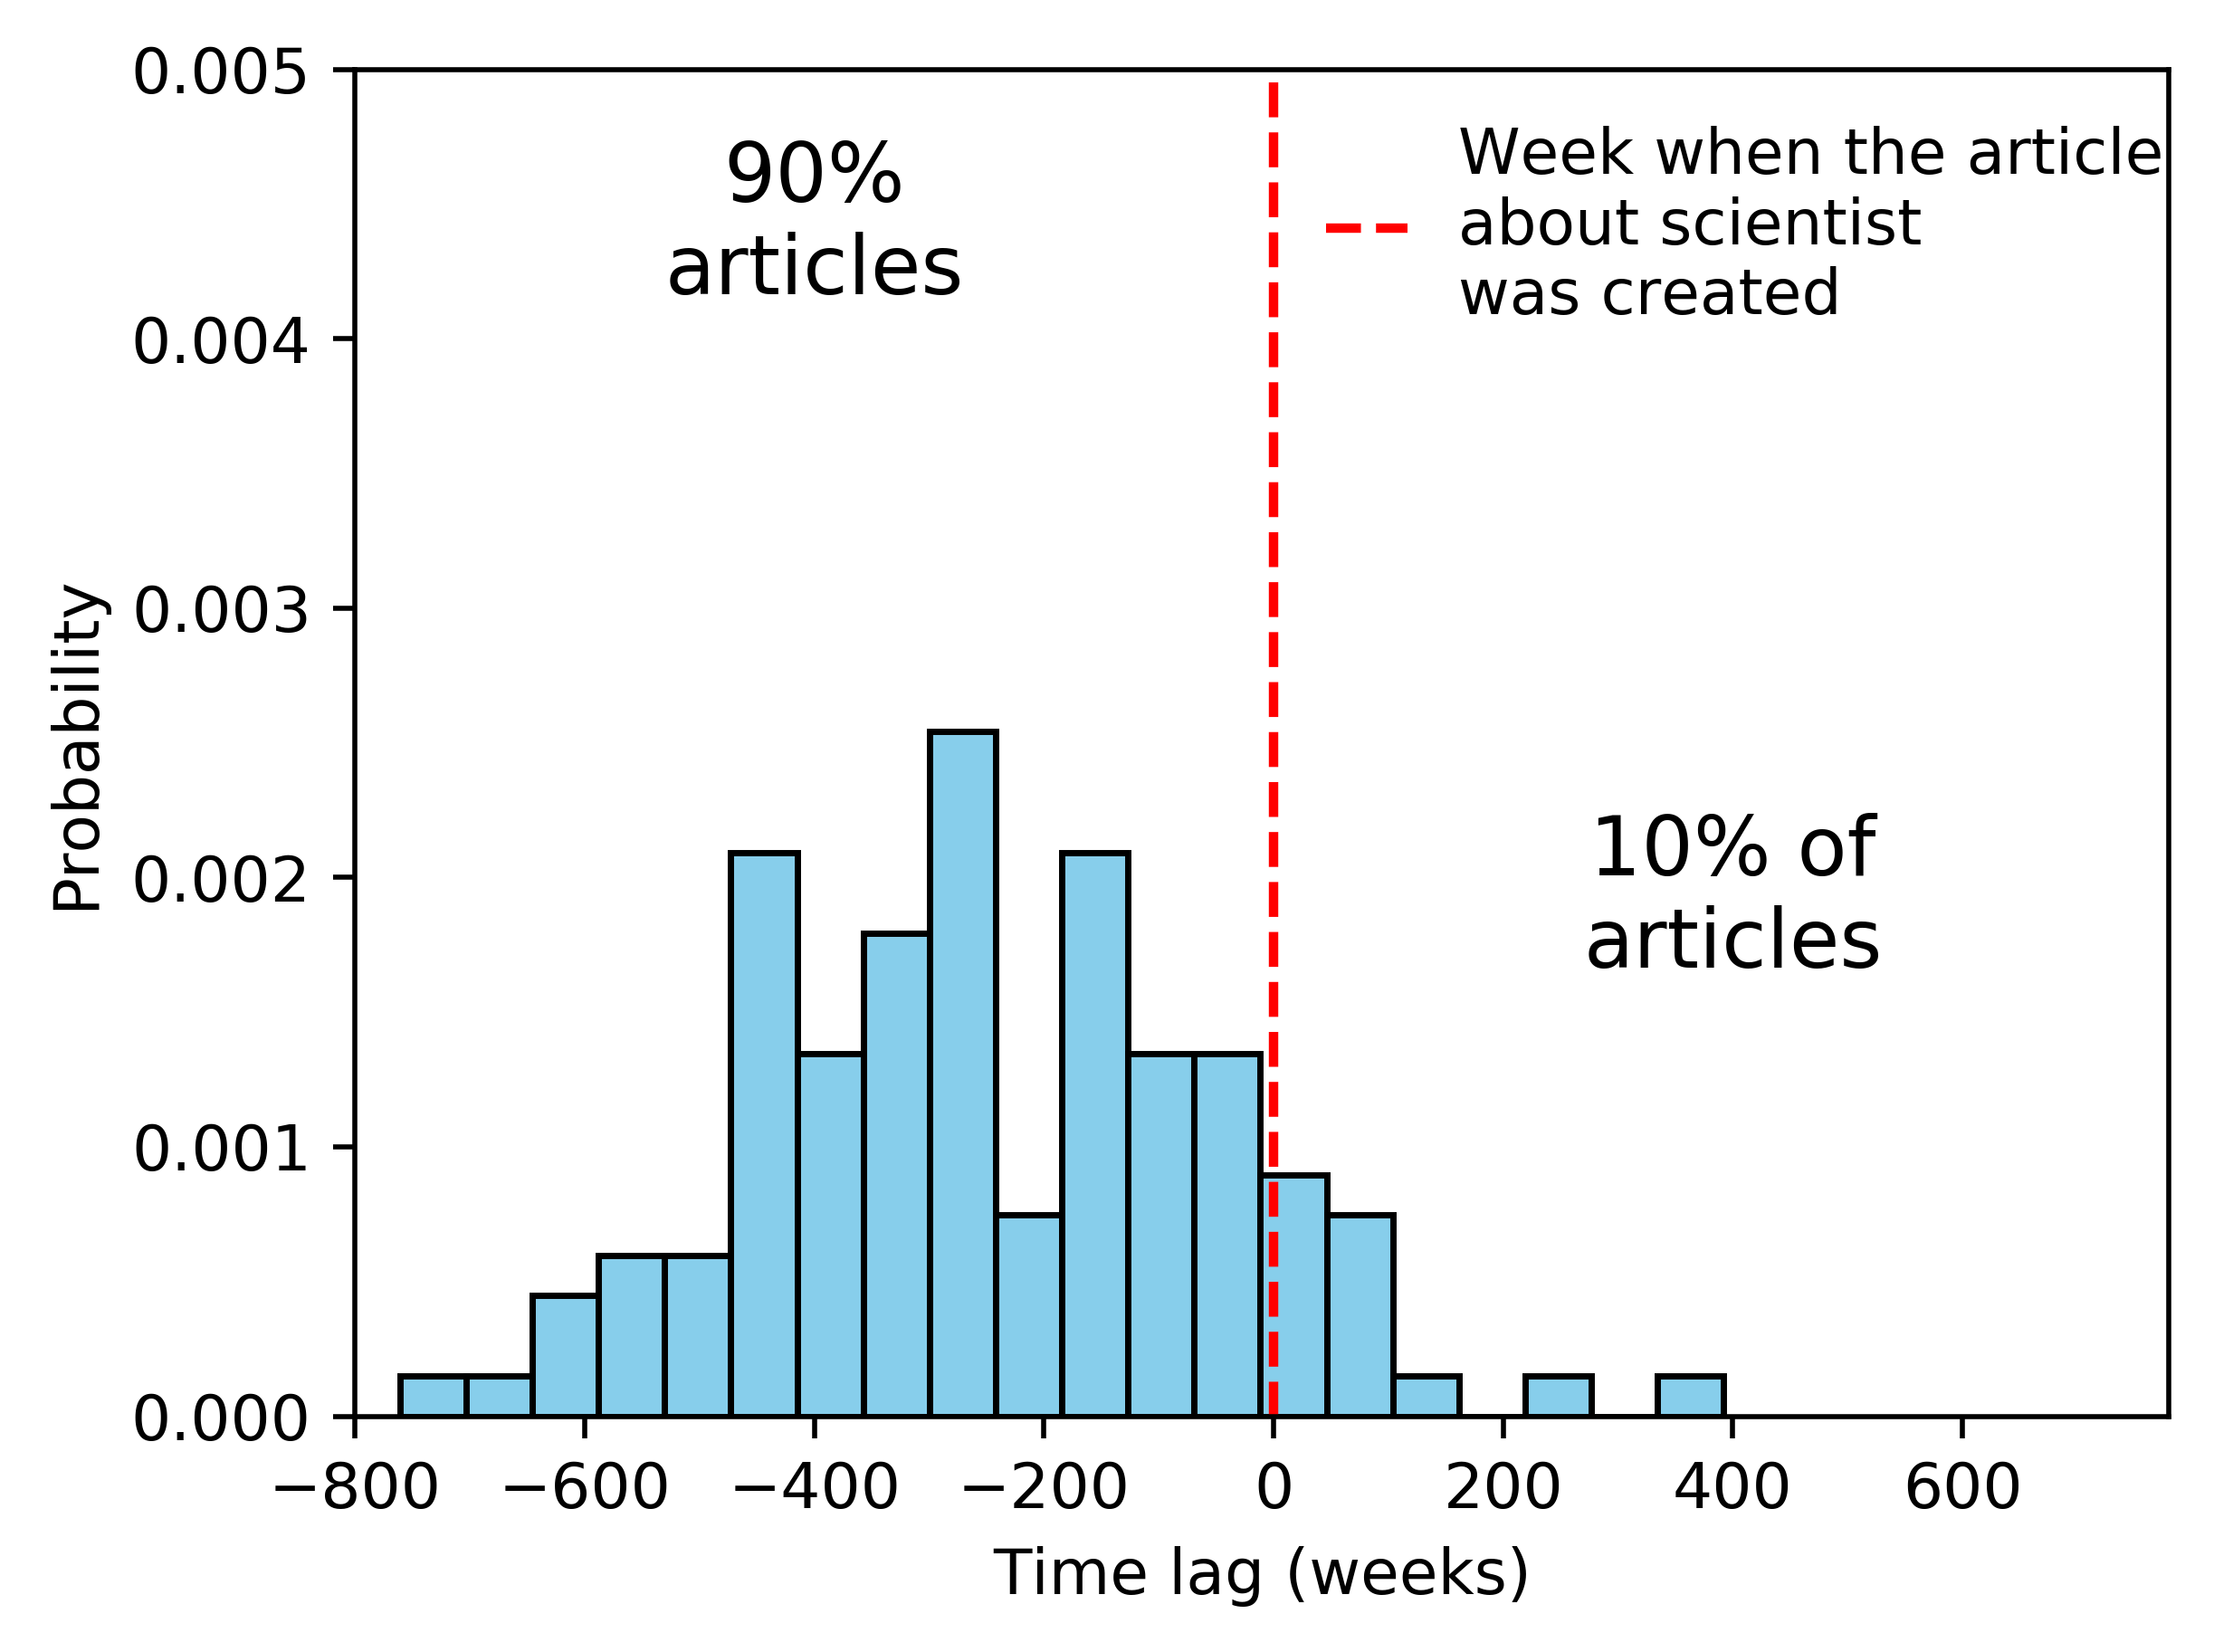

# of topics 23
Female scientist in Medicine


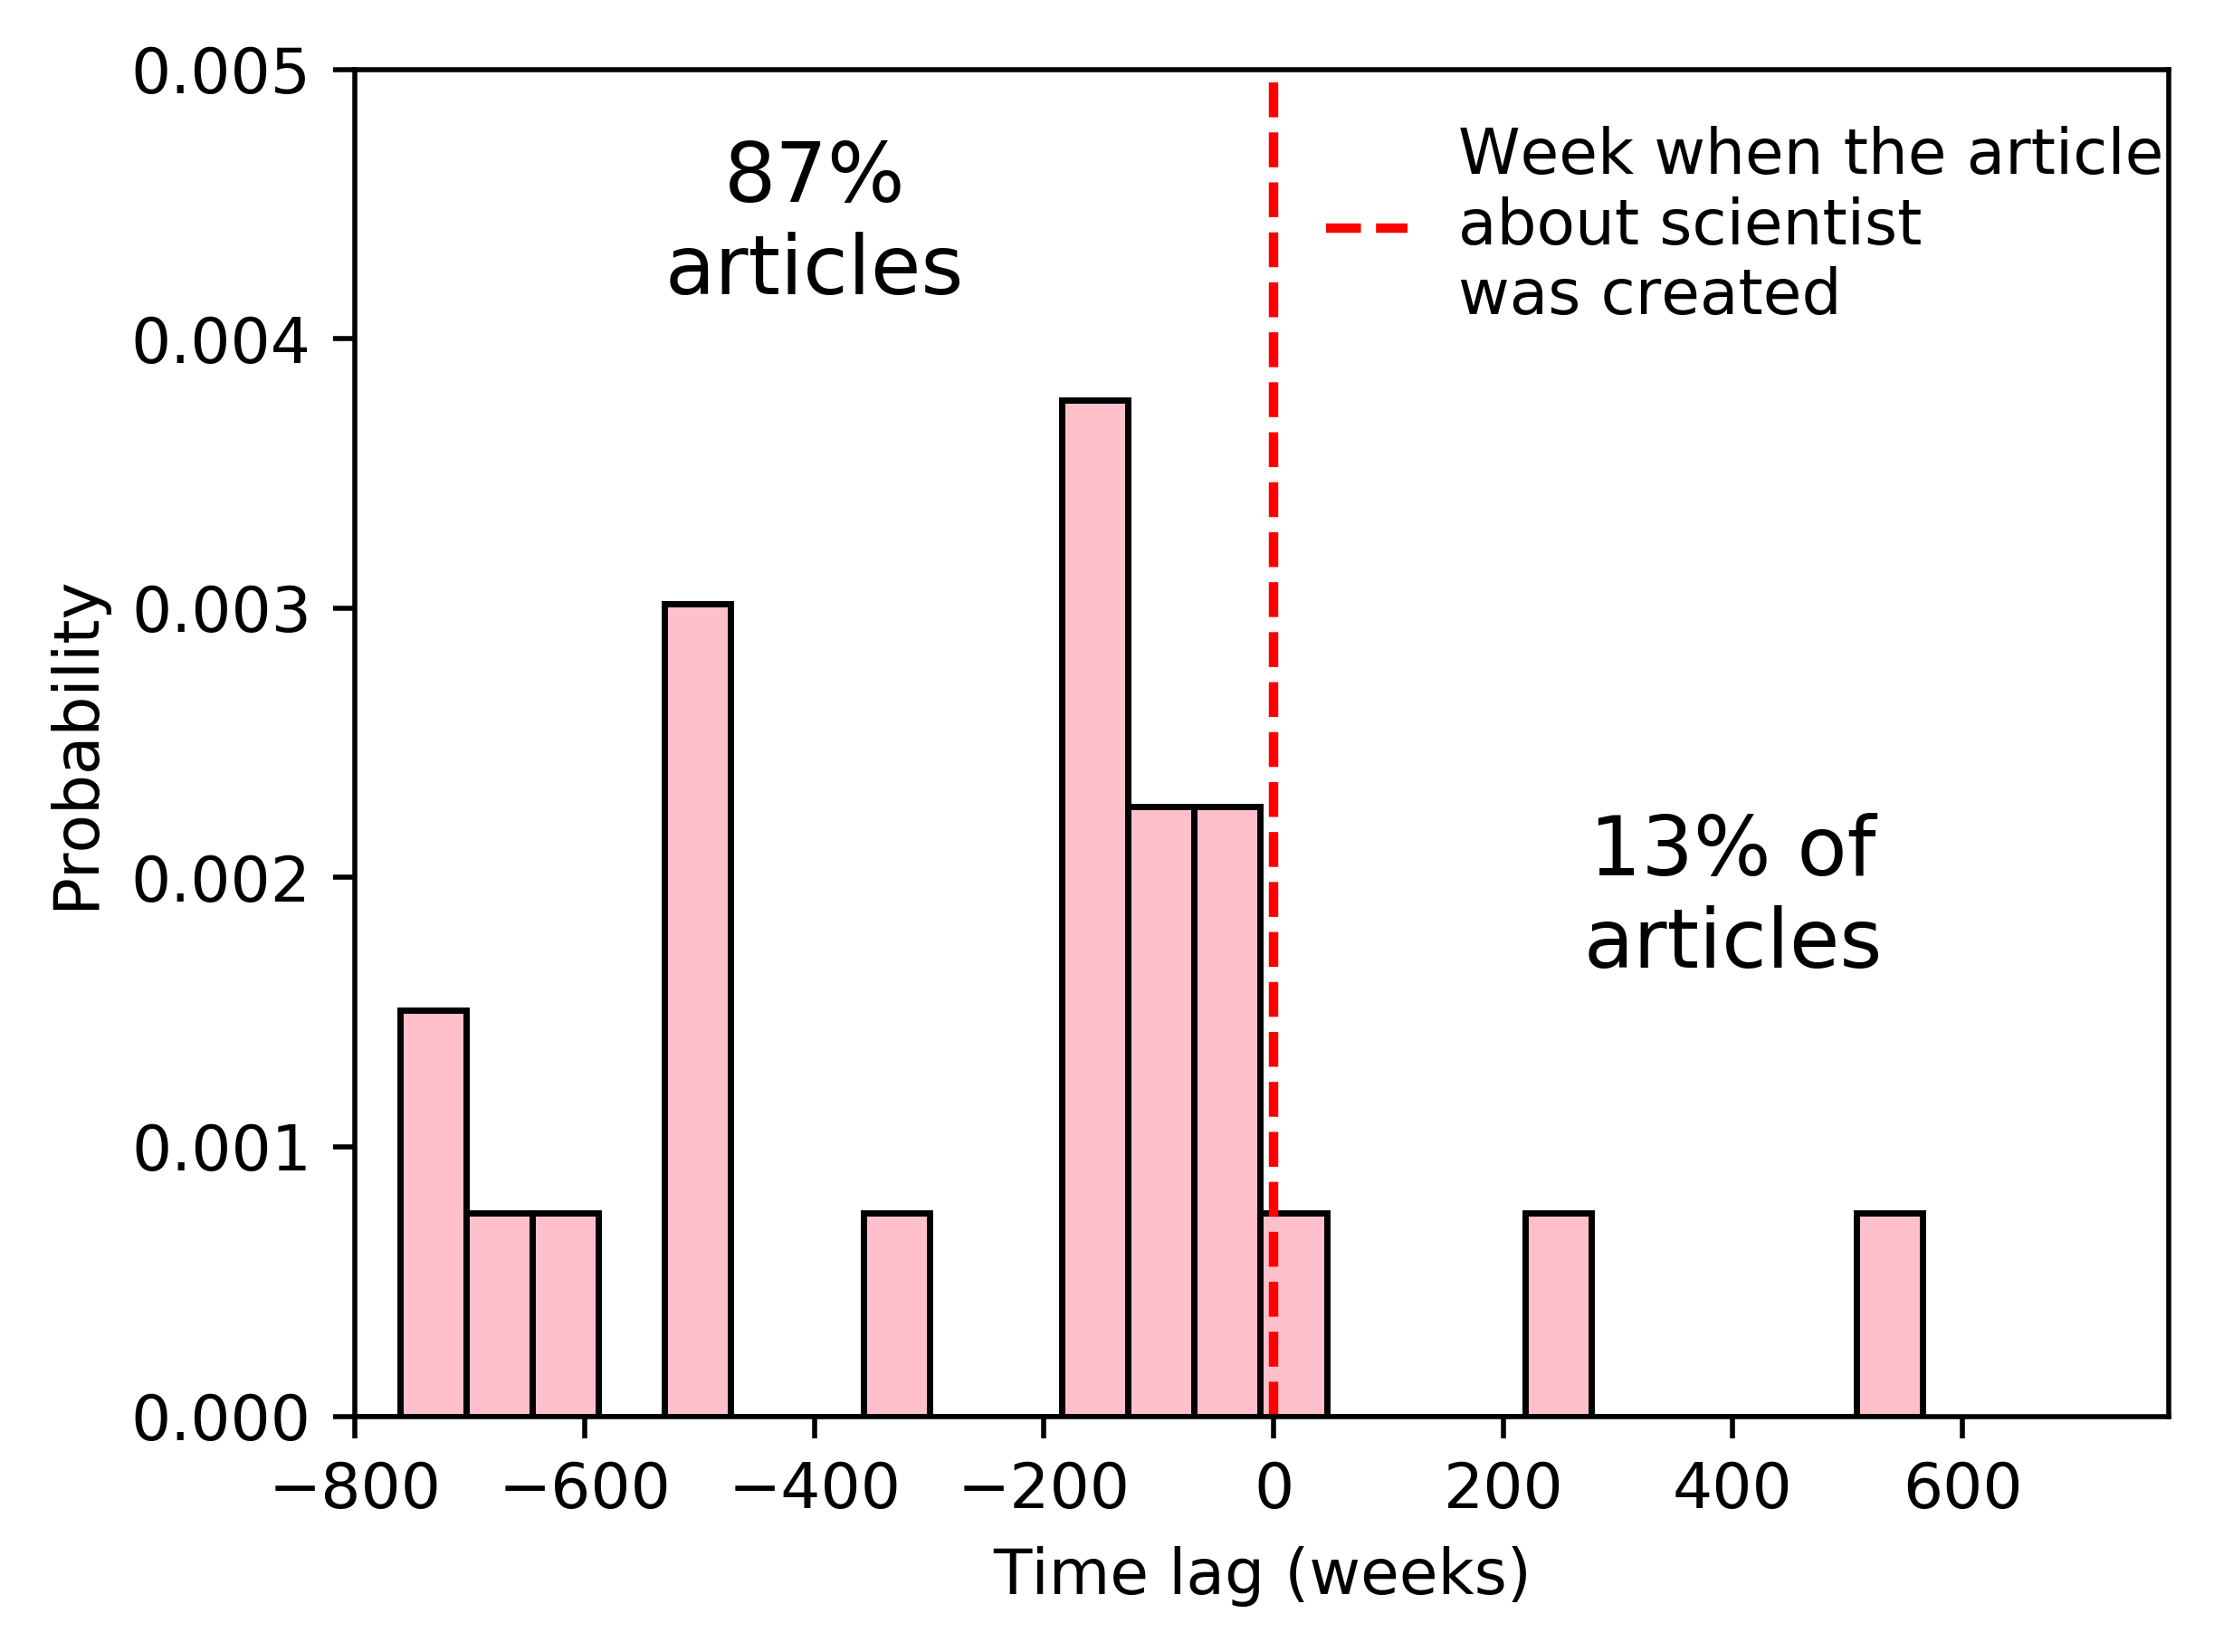

86.9565217391
23
89.6551724138
116
Ks_2sampResult(statistic=0.23800599700149921, pvalue=0.19616057934207637)
MannwhitneyuResult(statistic=1291.5, pvalue=0.40591574278644094)


In [293]:
female_sc_medicine=list(df[(df.gender=="female")&(df.Field=="Mathematics")].Name)
male_sc_medicine=list(df[(df.gender=="male")&(df.Field=="Mathematics")].Name)
print len(female_sc_medicine)
print len(male_sc_medicine)

baseline_data_male_medicine = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc_medicine)
baseline_male_medicine = weekly_aggregation(baseline_data_male_medicine)
print "# of topics",len(baseline_male_medicine)
bins_new=plotting(baseline_male_medicine, '/timelag_weekly_male_mathematics.pdf',color="skyblue",period="weeks", lim=0.005, 
         text="Male scientist in Medicine",bins=20)
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2],4*bins_new[-1]-3*bins_new[-2]])

baseline_data_female_medicine=get_series(main_dict_baseline,scientist_dict_baseline,topic_dict_baseline,female_sc_medicine)
baseline_female_medicine = weekly_aggregation(baseline_data_female_medicine)
print "# of topics",len(baseline_female_medicine)
plotting(baseline_female_medicine, '/timelag_weekly_female_mathematics.pdf',color="pink",period="weeks", lim=0.005, 
         text="Female scientist in Medicine",bins=bins_plus3)
plt.show()


print 100*float(np.sum(np.array(baseline_female_medicine)<0))/len(baseline_female_medicine)
print len(baseline_female_medicine)
print 100*float(np.sum(np.array(baseline_male_medicine)<0))/len(baseline_male_medicine)
print len(baseline_male_medicine)
print ks_2samp(baseline_female_medicine, baseline_male_medicine)
print mannwhitneyu(baseline_female_medicine, baseline_male_medicine)

Difference	2.70%

95% CI	-8.2317 to 22.2676

Chi-squared	0.144

DF 	1

Significance level	P = 0.7040

# Computer Science     (   male      15,        female     2)

2
15
# of topics 95
Male scientist in Medicine


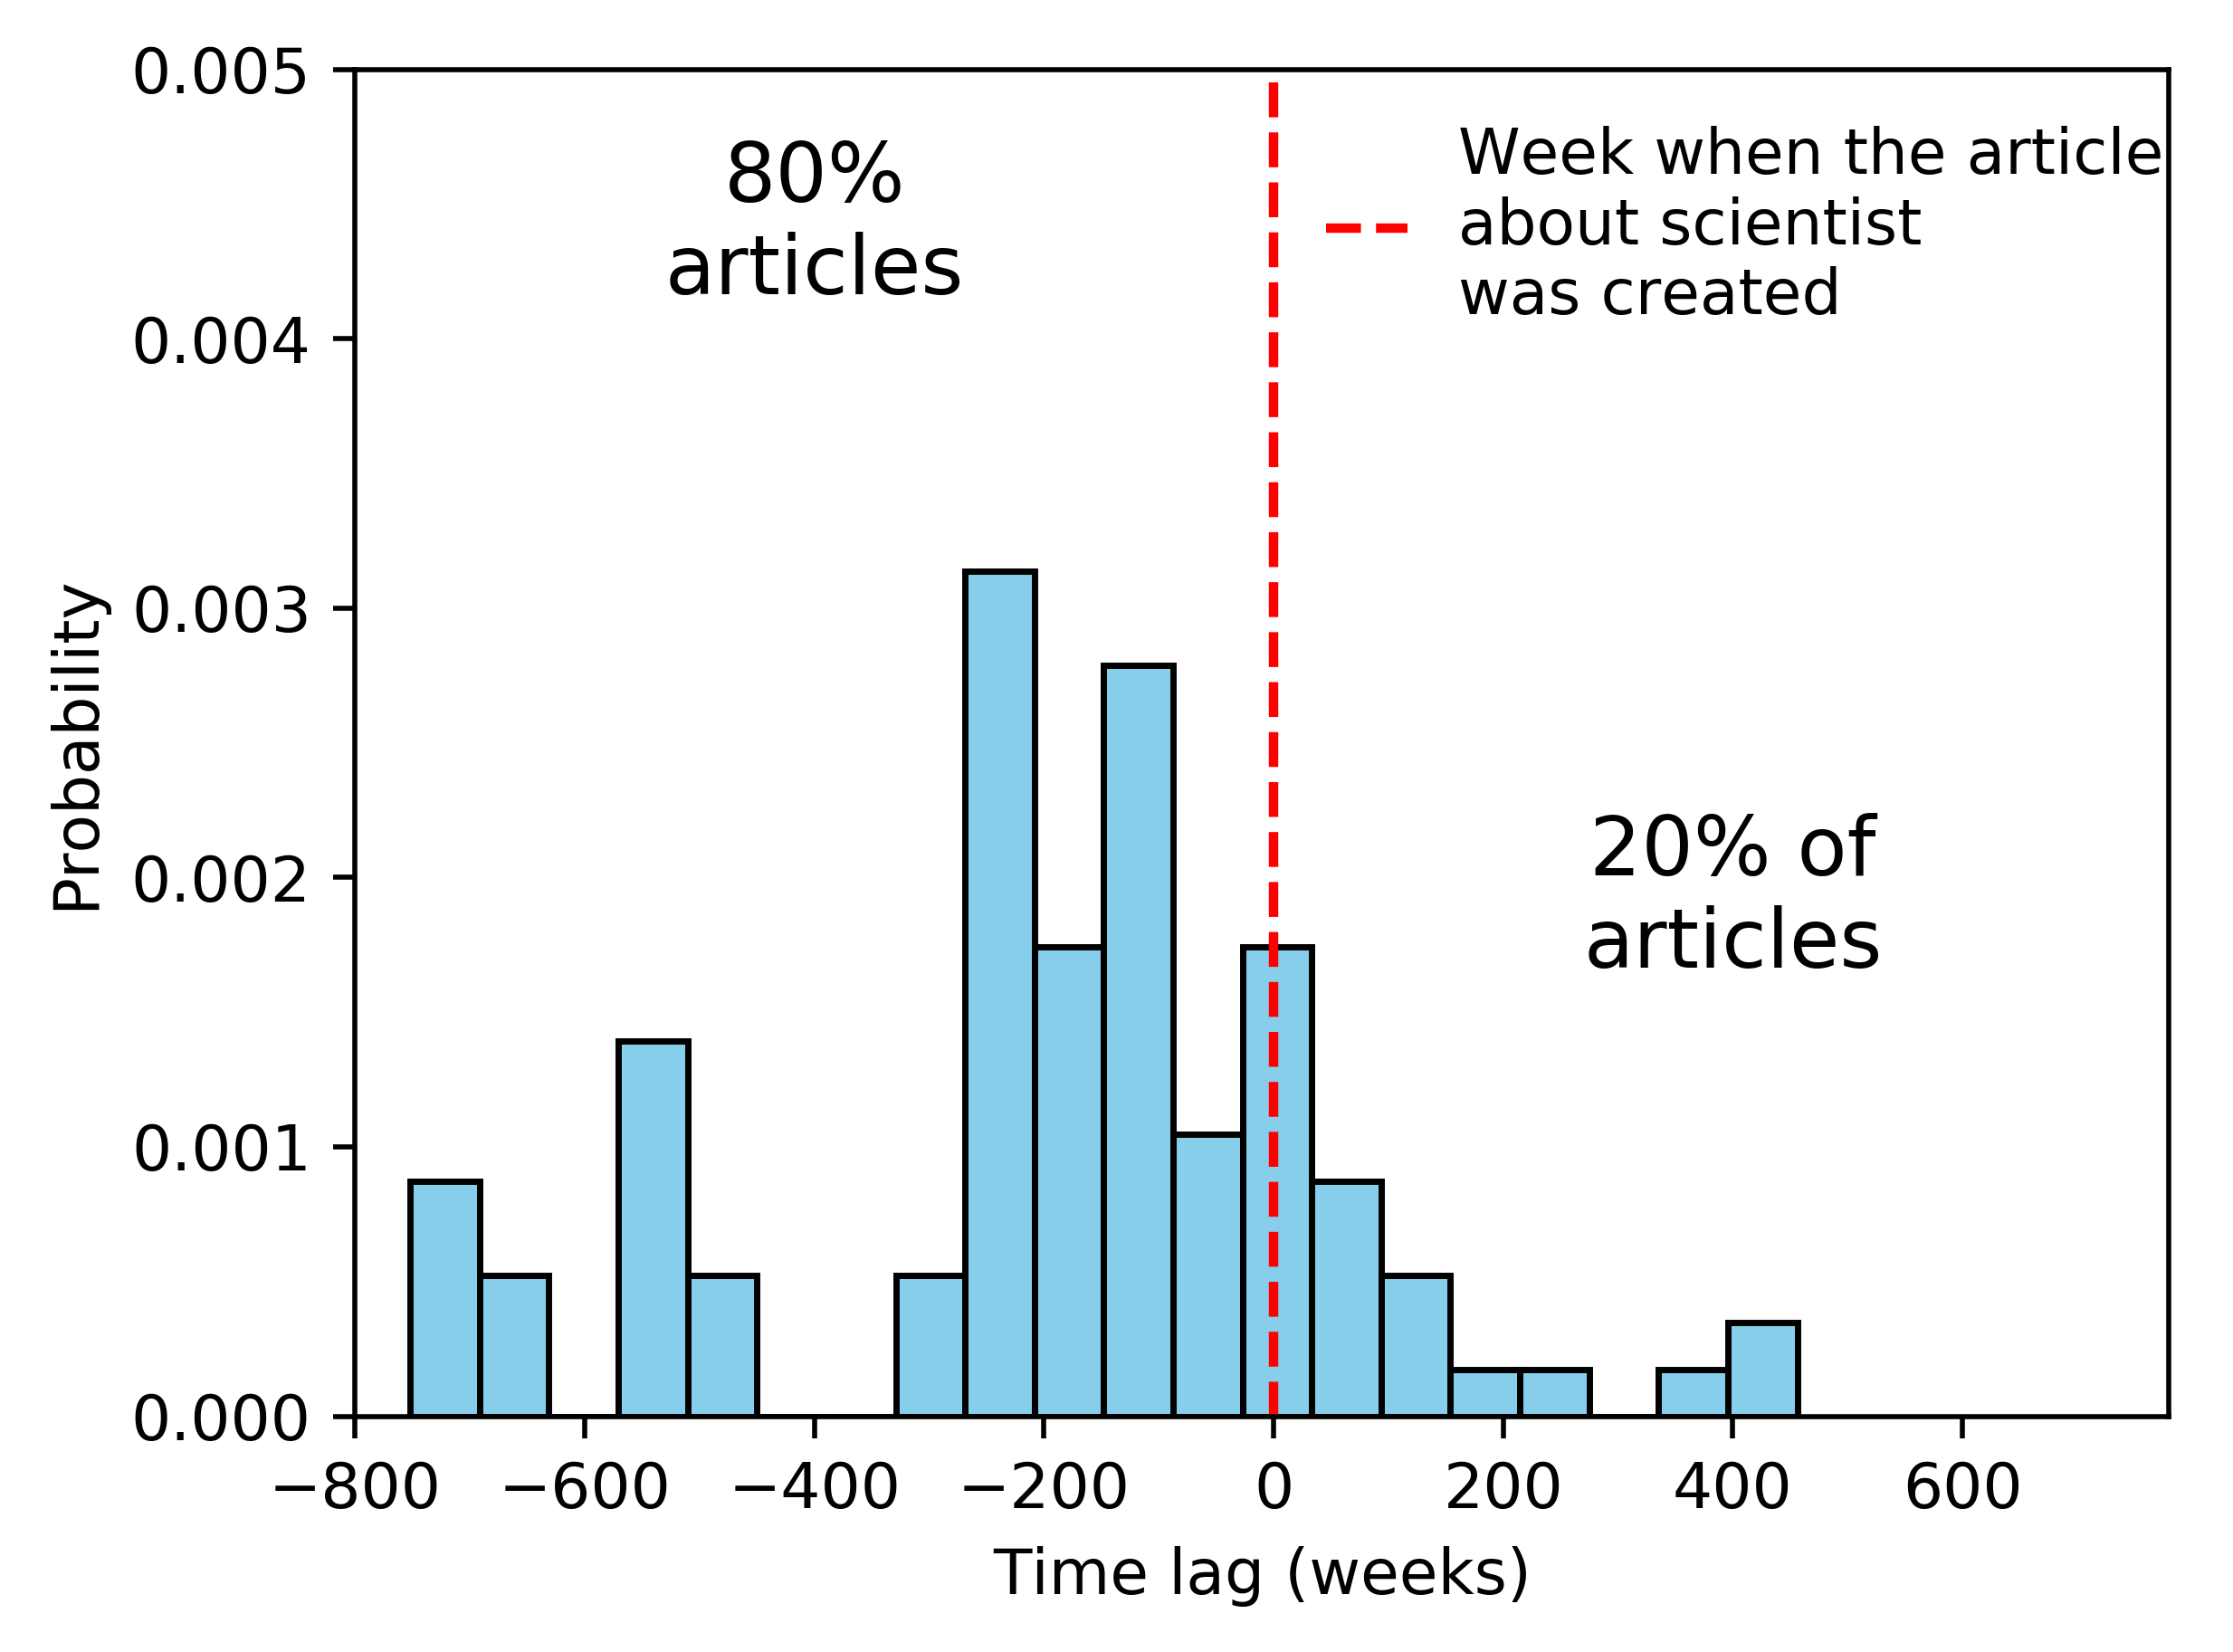

# of topics 4
Female scientist in Medicine


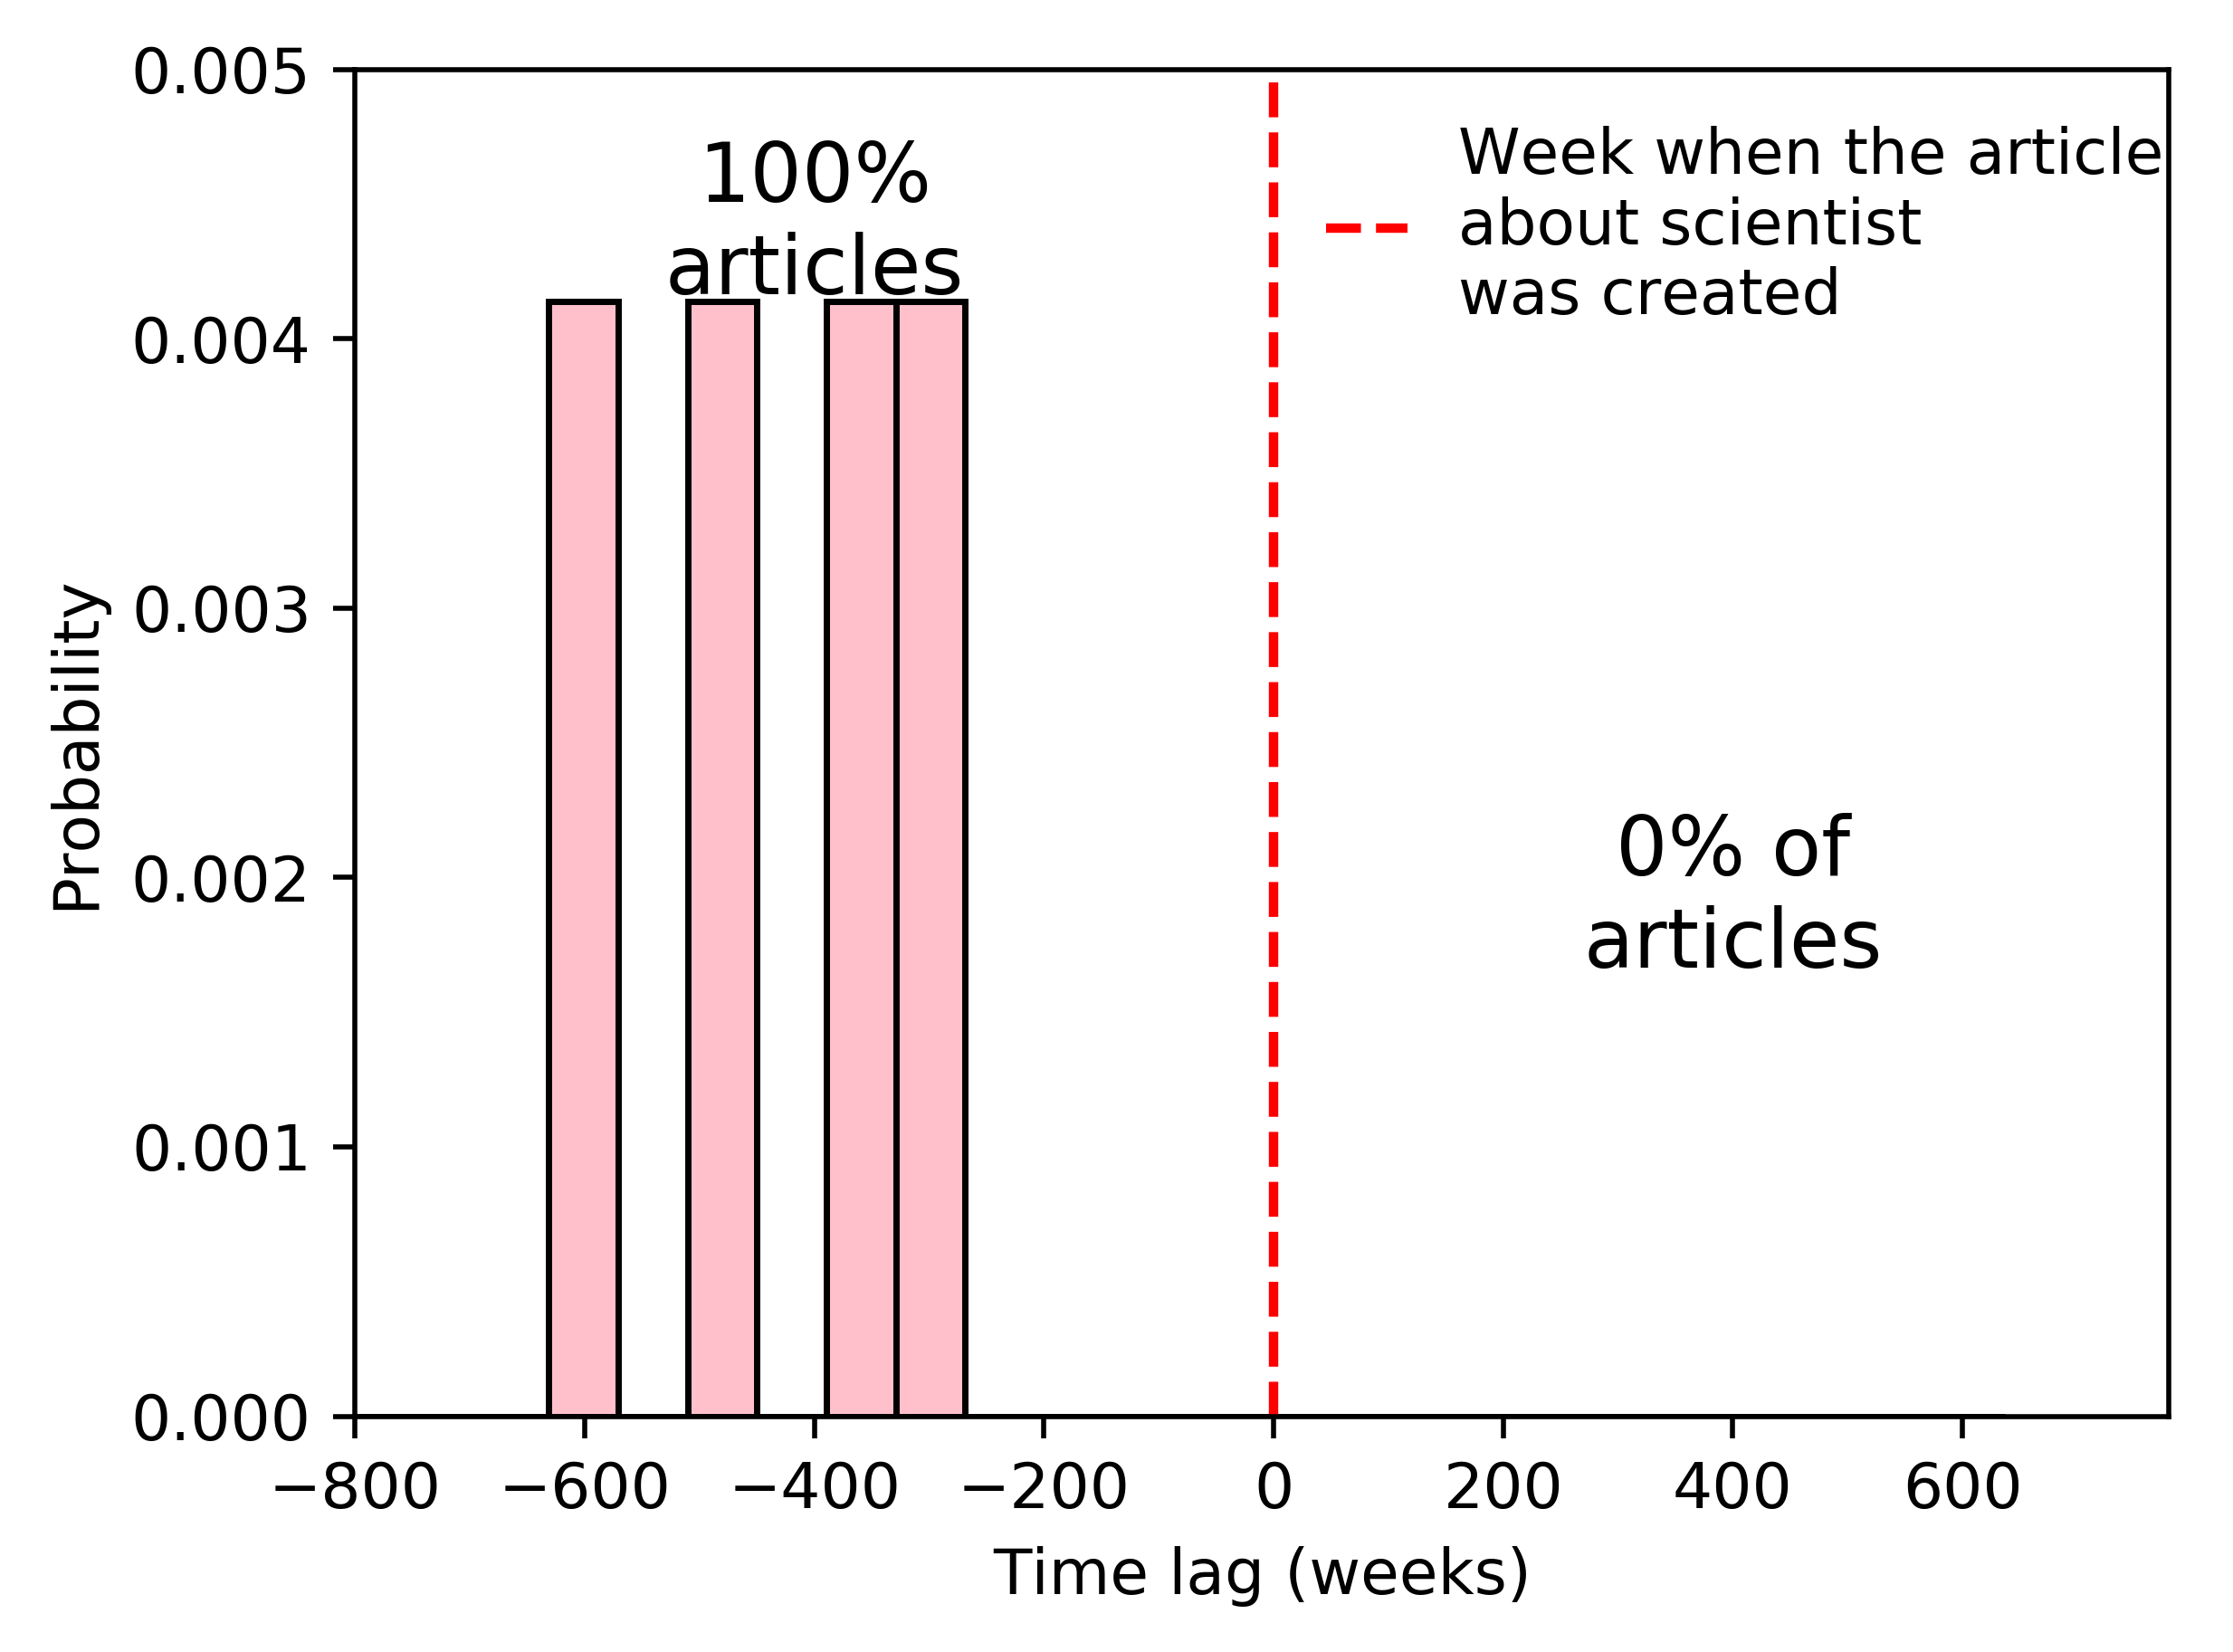

100.0
4
80.0
95
Ks_2sampResult(statistic=0.78947368421052633, pvalue=0.0068017008047165954)
MannwhitneyuResult(statistic=63.0, pvalue=0.012279270877807173)


In [296]:
female_sc_medicine=list(df[(df.gender=="female")&(df.Field=="Computer Science")].Name)
male_sc_medicine=list(df[(df.gender=="male")&(df.Field=="Computer Science")].Name)
print len(female_sc_medicine)
print len(male_sc_medicine)

baseline_data_male_medicine = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc_medicine)
baseline_male_medicine = weekly_aggregation(baseline_data_male_medicine)
print "# of topics",len(baseline_male_medicine)
bins_new=plotting(baseline_male_medicine, '/timelag_weekly_male_cs.pdf',color="skyblue",period="weeks", lim=0.005, 
         text="Male scientist in Medicine",bins=20)
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2],4*bins_new[-1]-3*bins_new[-2]])

baseline_data_female_medicine=get_series(main_dict_baseline,scientist_dict_baseline,topic_dict_baseline,female_sc_medicine)
baseline_female_medicine = weekly_aggregation(baseline_data_female_medicine)
print "# of topics",len(baseline_female_medicine)
plotting(baseline_female_medicine, '/timelag_weekly_female_cs.pdf',color="pink",period="weeks", lim=0.005, 
         text="Female scientist in Medicine",bins=bins_plus3)
plt.show()


print 100*float(np.sum(np.array(baseline_female_medicine)<0))/len(baseline_female_medicine)
print len(baseline_female_medicine)
print 100*float(np.sum(np.array(baseline_male_medicine)<0))/len(baseline_male_medicine)
print len(baseline_male_medicine)
print ks_2samp(baseline_female_medicine, baseline_male_medicine)
print mannwhitneyu(baseline_female_medicine, baseline_male_medicine)

Difference	20%

95% CI	-29.4595 to 29.1373

Chi-squared	0.980

DF 	1

Significance level	P = 0.3222

# Chemistry           (    male      53,                   female     1)

1
53
# of topics 206
Male scientist in Medicine


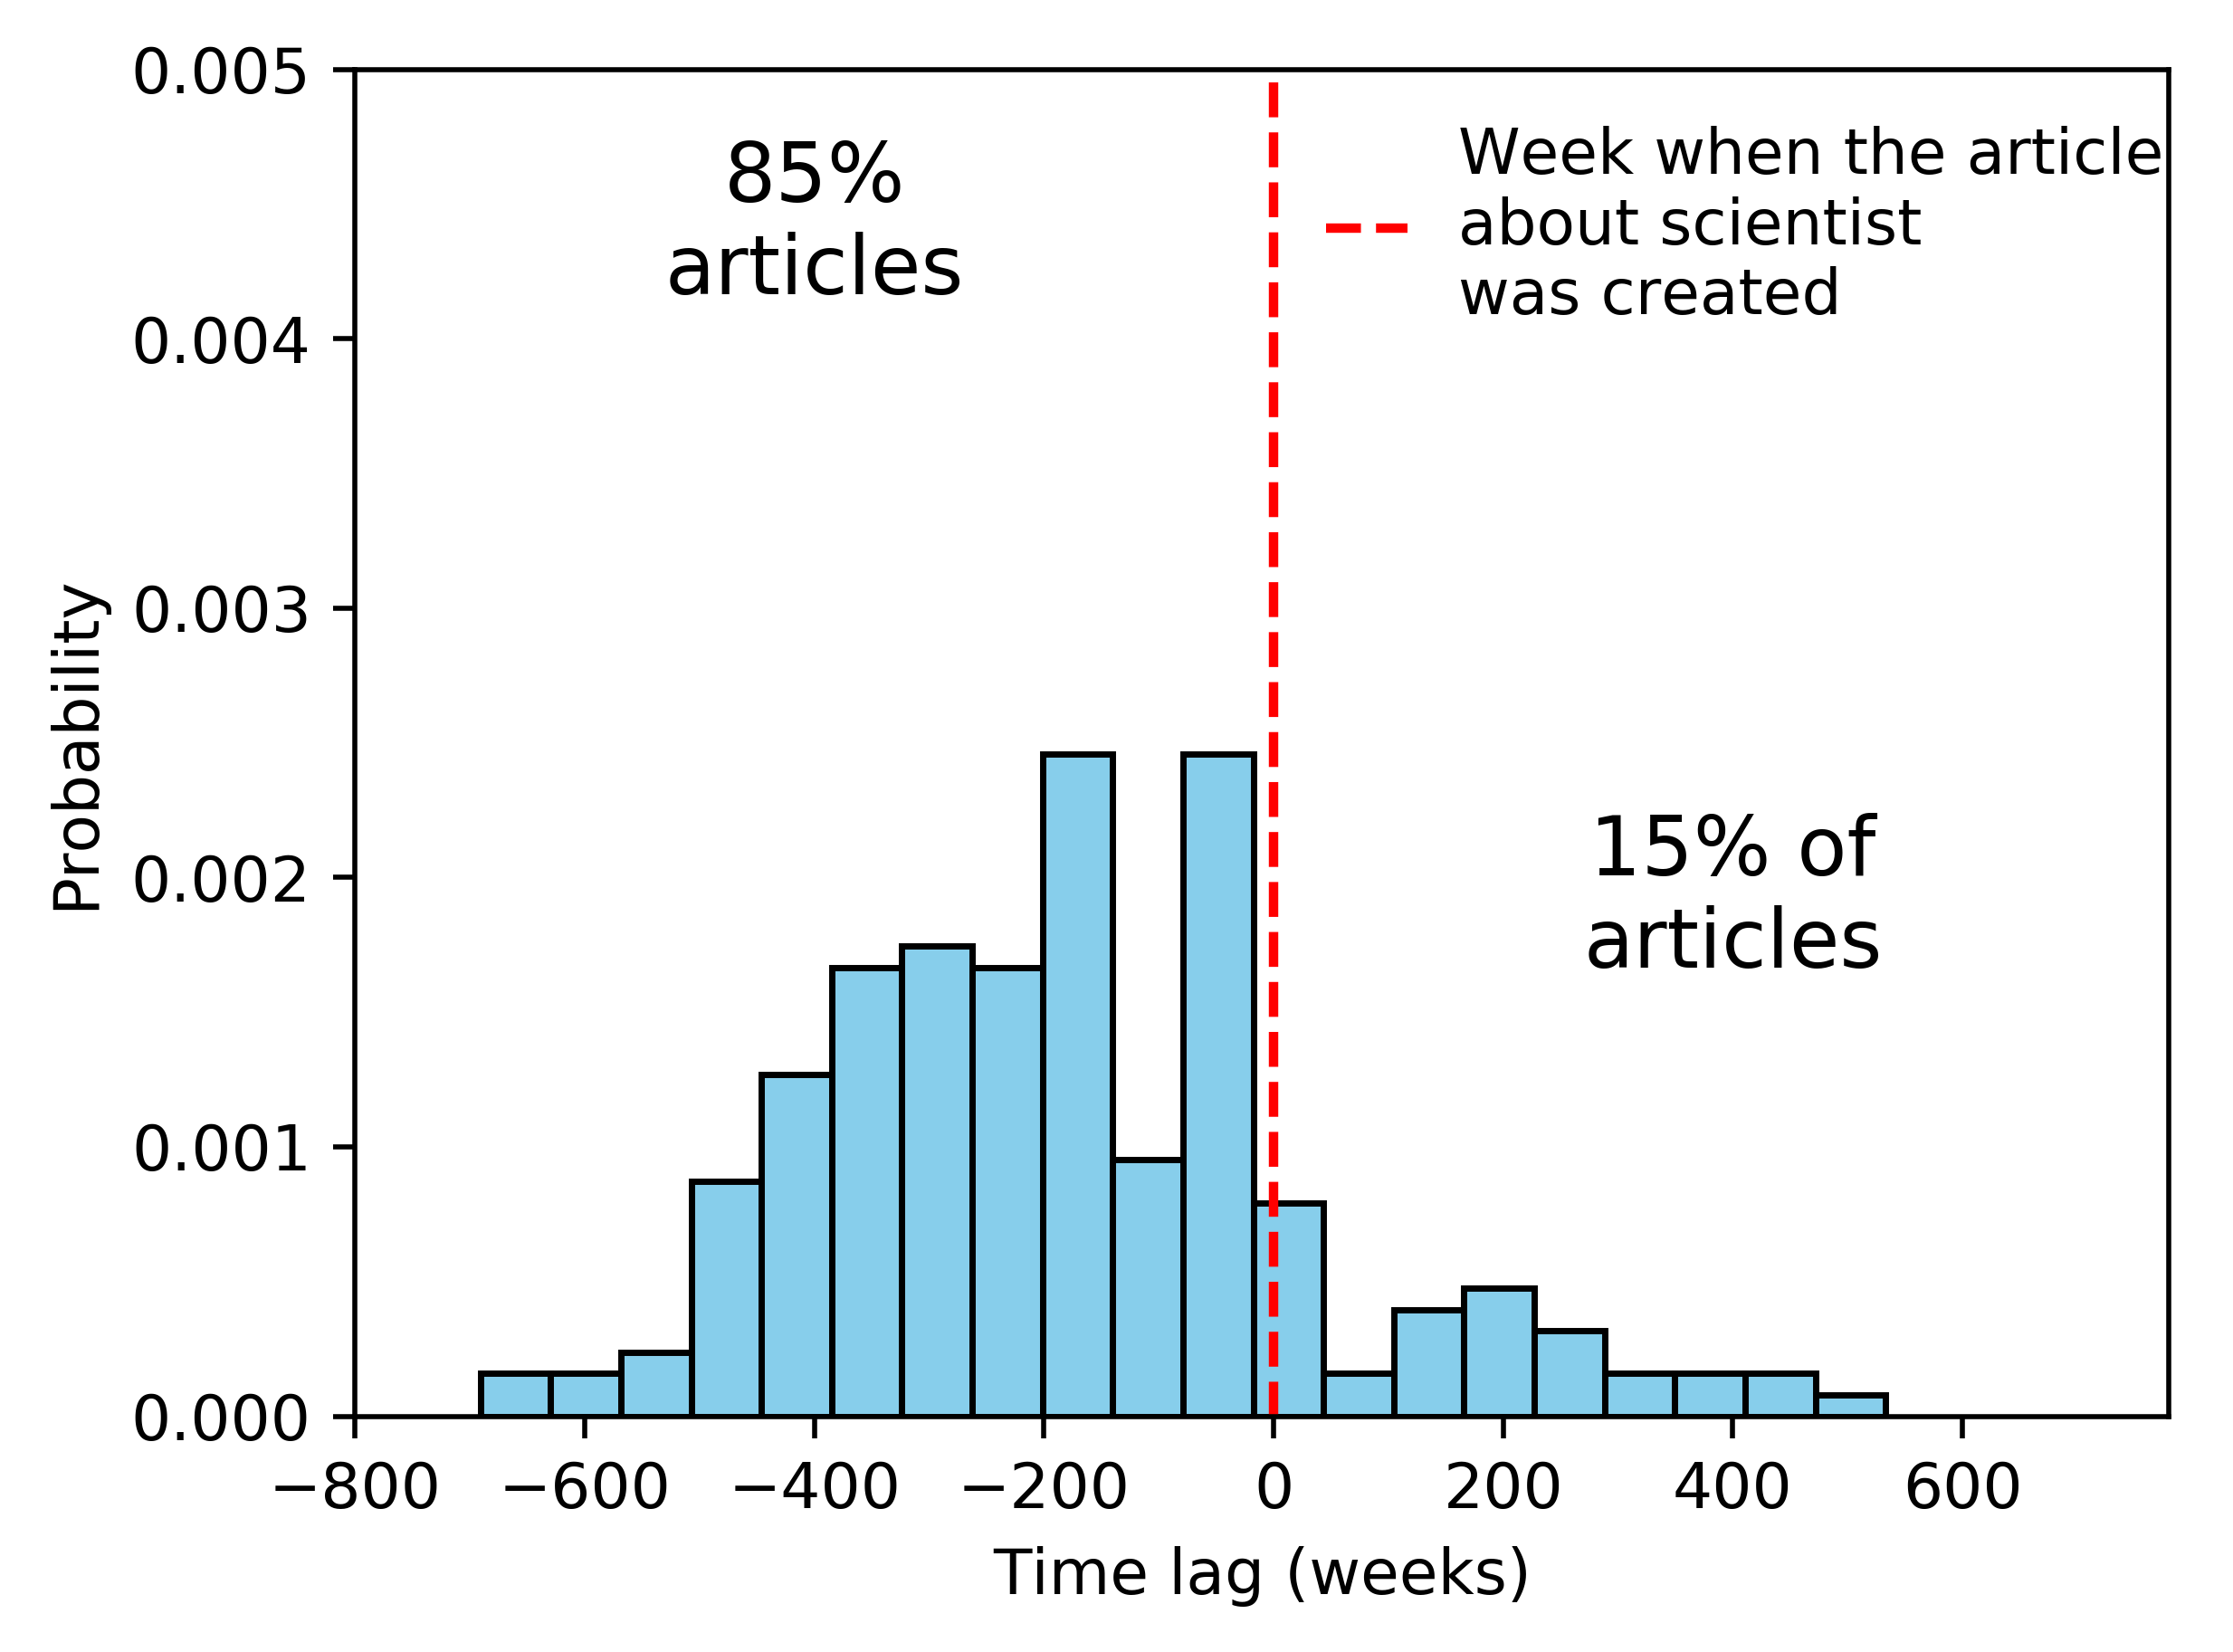

# of topics 8
Female scientist in Medicine


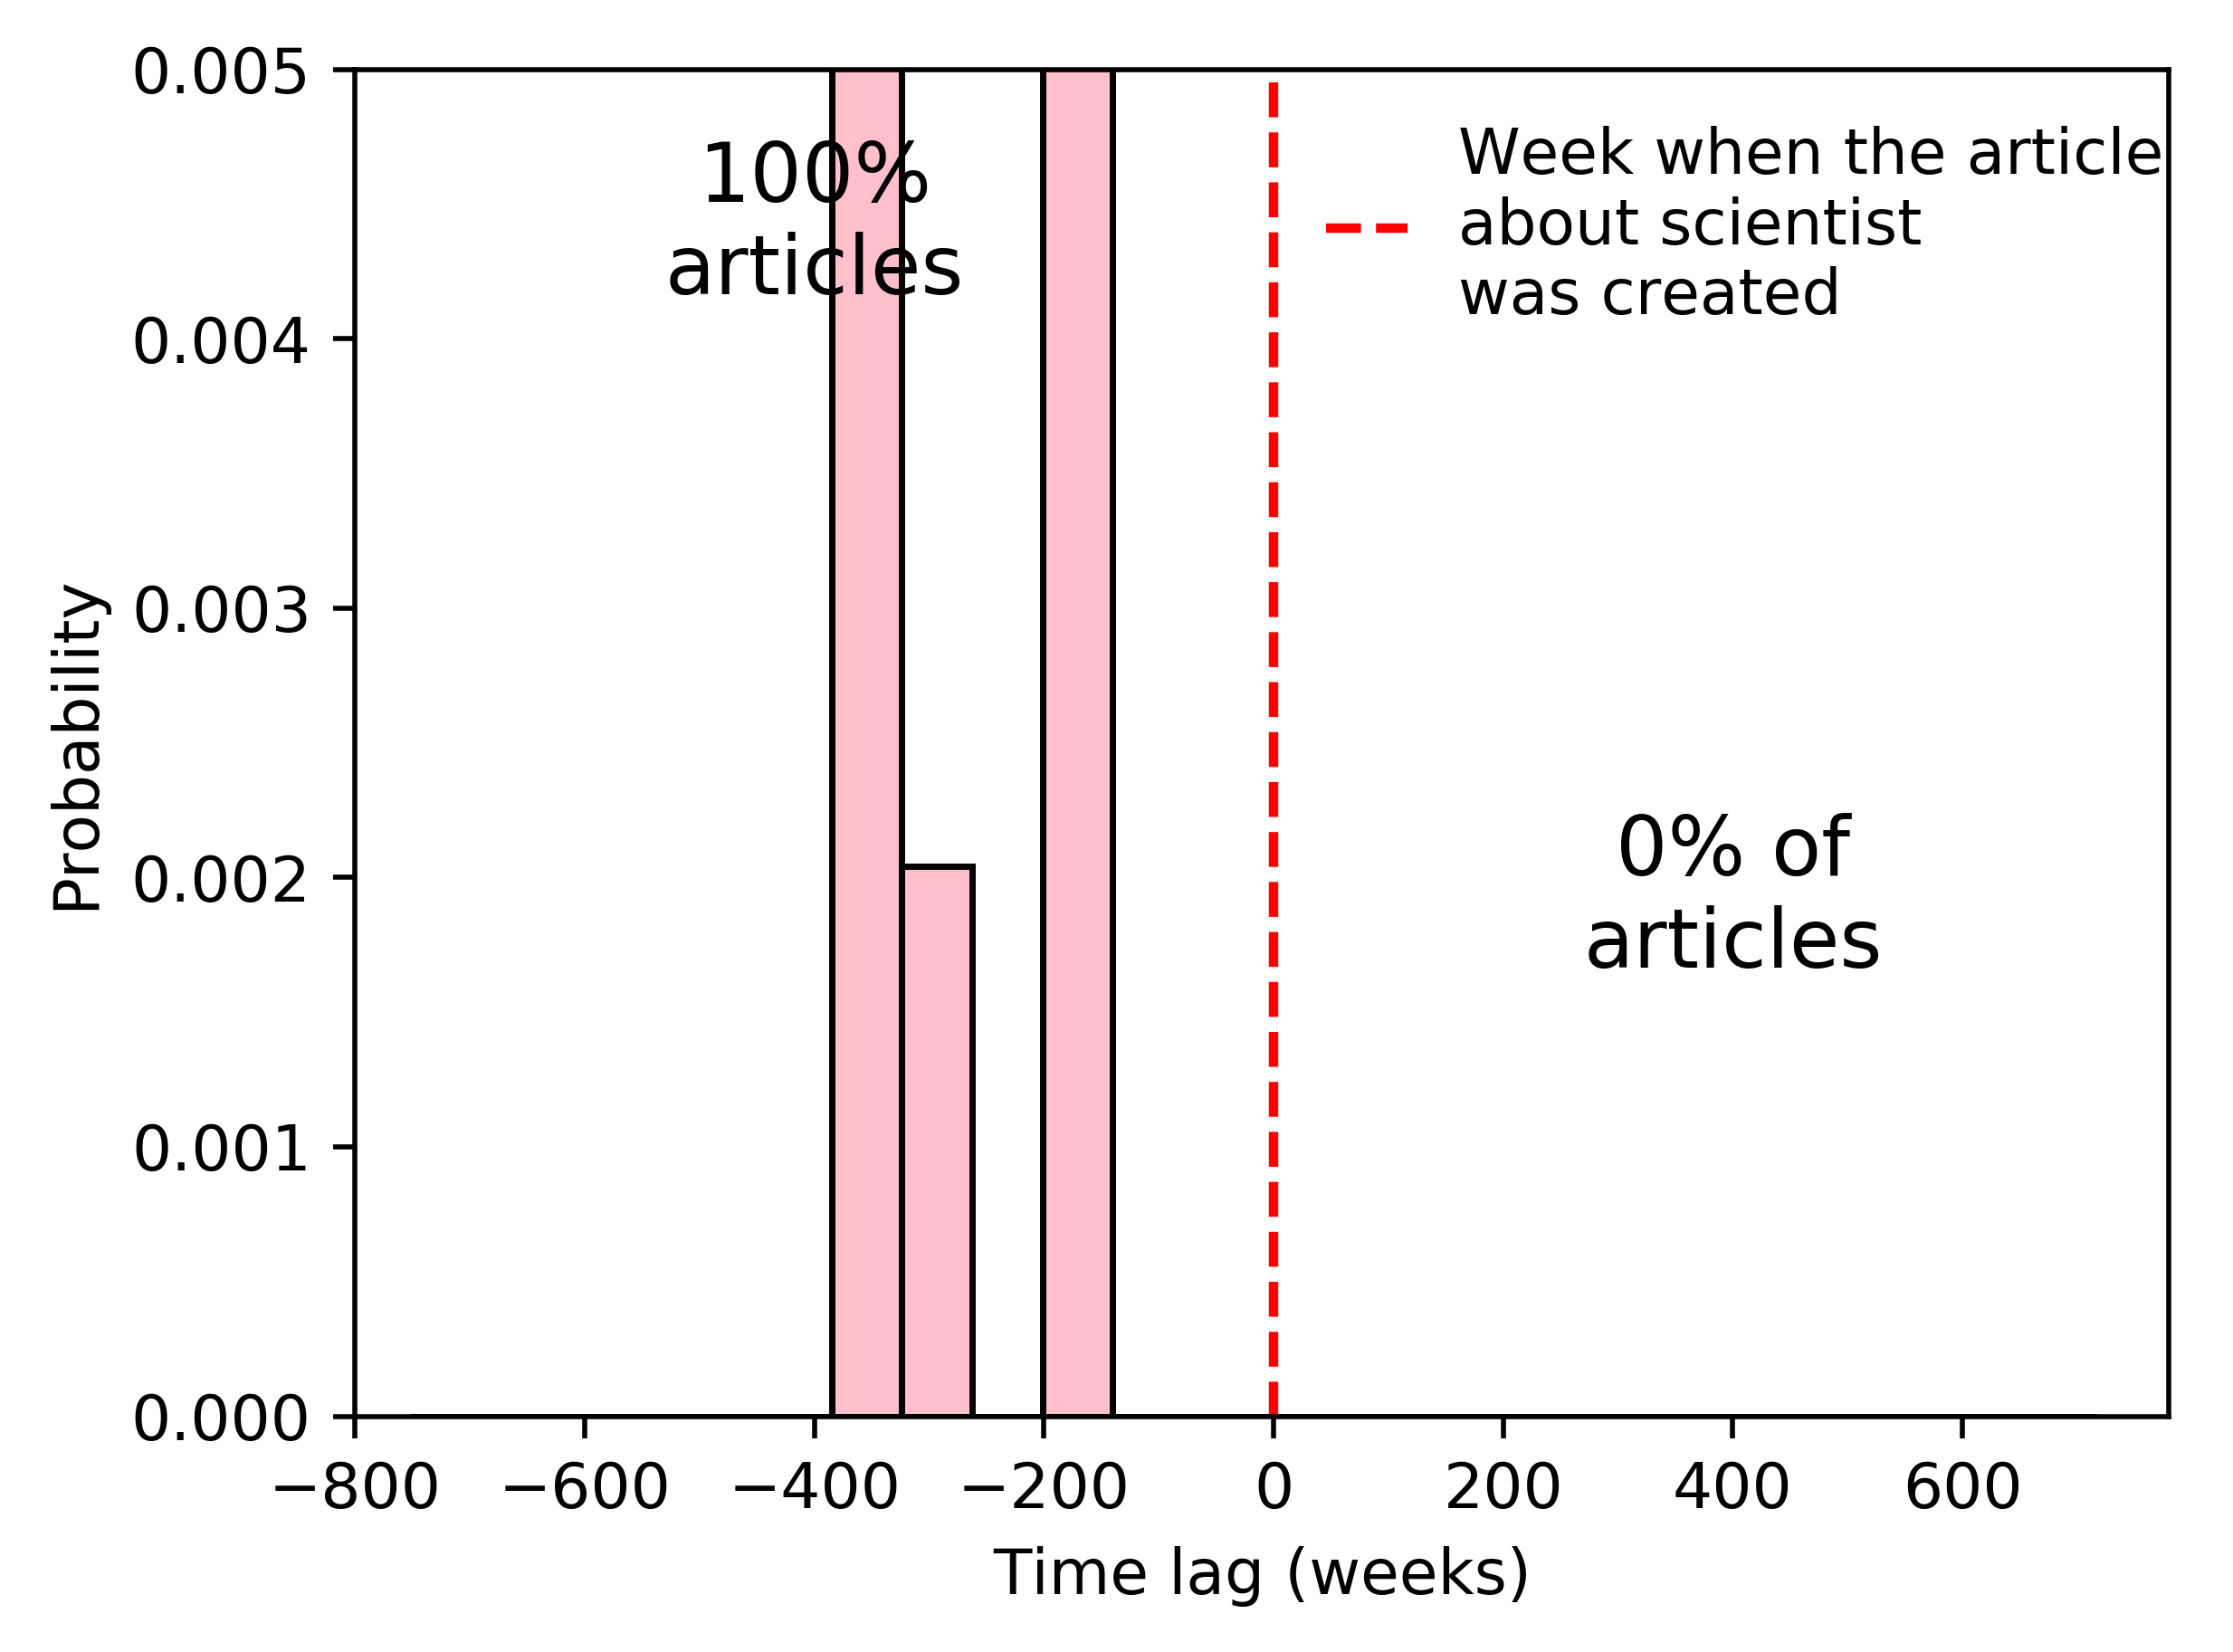

100.0
8
84.9514563107
206
Ks_2sampResult(statistic=0.37864077669902918, pvalue=0.16915024300683182)
MannwhitneyuResult(statistic=582.5, pvalue=0.08037592539369226)


In [299]:
female_sc_medicine=list(df[(df.gender=="female")&(df.Field=="Chemistry")].Name)
male_sc_medicine=list(df[(df.gender=="male")&(df.Field=="Chemistry")].Name)
print len(female_sc_medicine)
print len(male_sc_medicine)

baseline_data_male_medicine = get_series(main_dict_baseline, scientist_dict_baseline, topic_dict_baseline,male_sc_medicine)
baseline_male_medicine = weekly_aggregation(baseline_data_male_medicine)
print "# of topics",len(baseline_male_medicine)
bins_new=plotting(baseline_male_medicine, '/timelag_weekly_male_chemistry.pdf',color="skyblue",period="weeks", lim=0.005, 
         text="Male scientist in Medicine",bins=20)
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2],4*bins_new[-1]-3*bins_new[-2]])

baseline_data_female_medicine=get_series(main_dict_baseline,scientist_dict_baseline,topic_dict_baseline,female_sc_medicine)
baseline_female_medicine = weekly_aggregation(baseline_data_female_medicine)
print "# of topics",len(baseline_female_medicine)
plotting(baseline_female_medicine, '/timelag_weekly_female_chemistry.pdf',color="pink",period="weeks", lim=0.005, 
         text="Female scientist in Medicine",bins=bins_plus3)
plt.show()


print 100*float(np.sum(np.array(baseline_female_medicine)<0))/len(baseline_female_medicine)
print len(baseline_female_medicine)
print 100*float(np.sum(np.array(baseline_male_medicine)<0))/len(baseline_male_medicine)
print len(baseline_male_medicine)
print ks_2samp(baseline_female_medicine, baseline_male_medicine)
print mannwhitneyu(baseline_female_medicine, baseline_male_medicine)

https://www.medcalc.org/calc/comparison_of_proportions.php

=====difference calculator

Difference	15.05%

95% CI	-17.6667 to 20.5698

Chi-squared	1.401

DF 	1

Significance level	P = 0.2365

# ===================== Awarded all =======================

Physiology or Medicine  male      53
                        female     5
Chemistry               male      45
                        female     5
Physics                 male      56
                        female     3
Computer Science        male      15
                        female     3
Economics               male      49
                        female     2
Mathematics             male      17
                        female     1
Biology                 male       7
                        female     1   

# of topics 2711
Male scientist


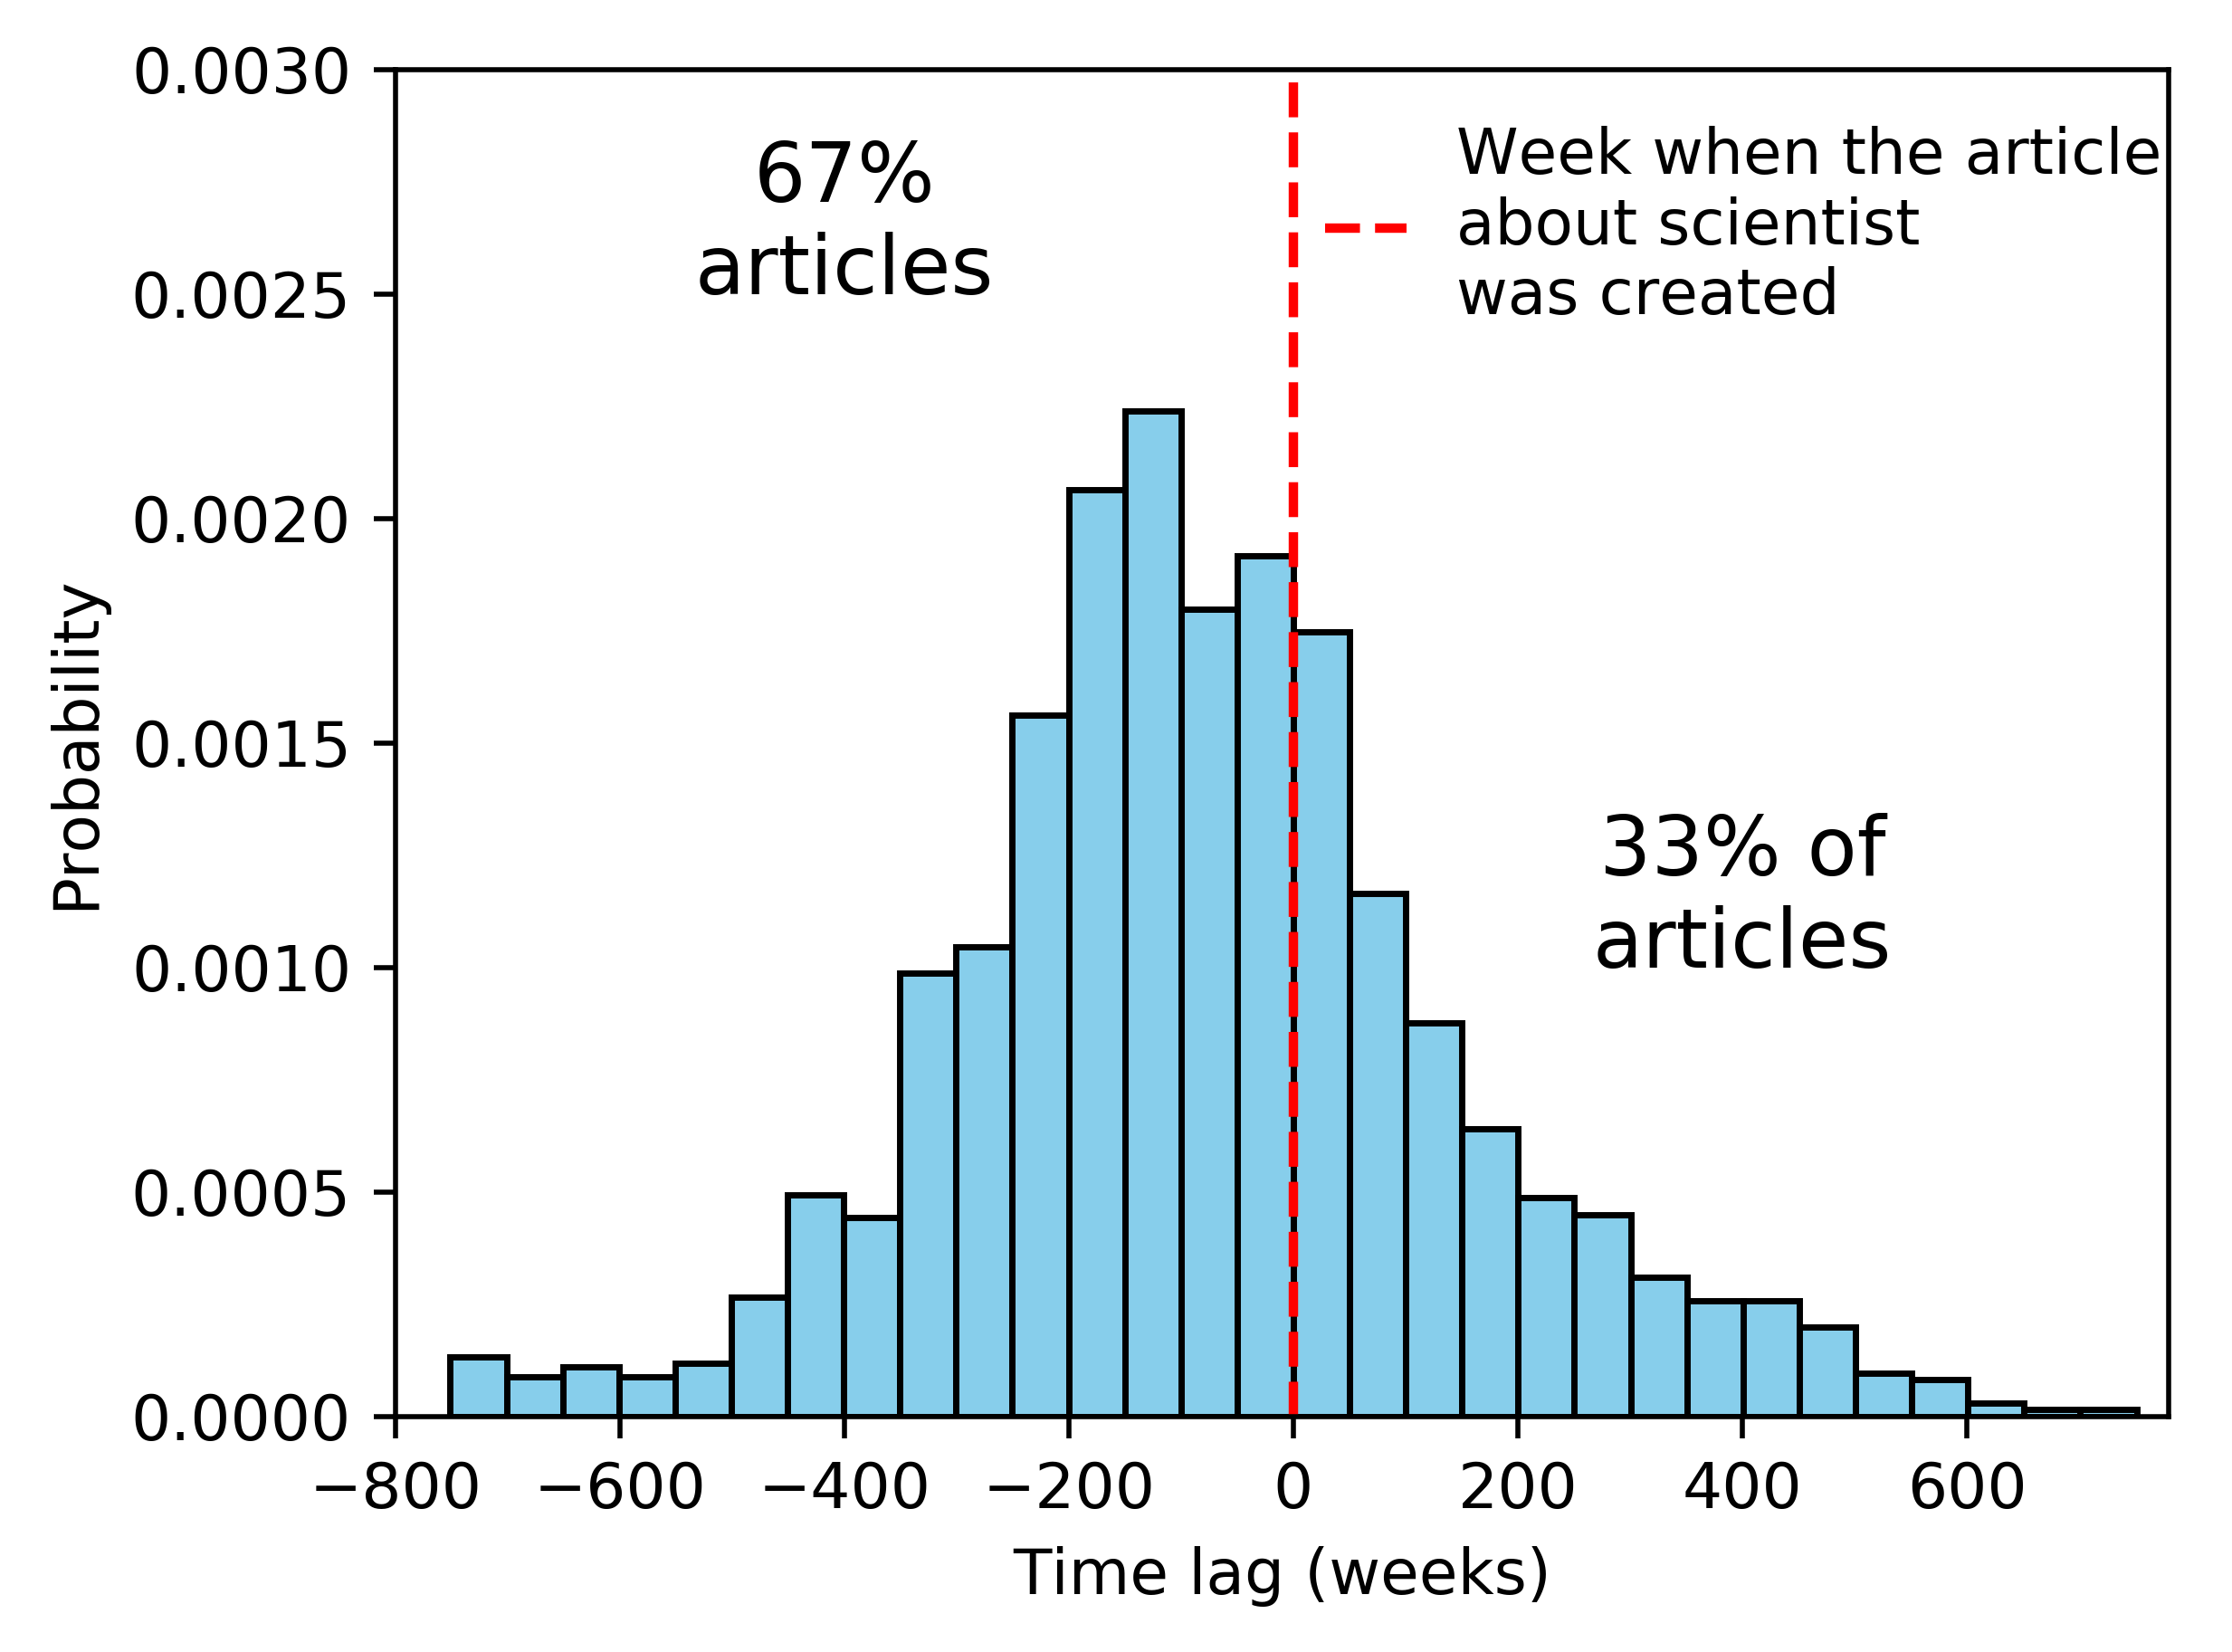

# of topics 285
Female scientist


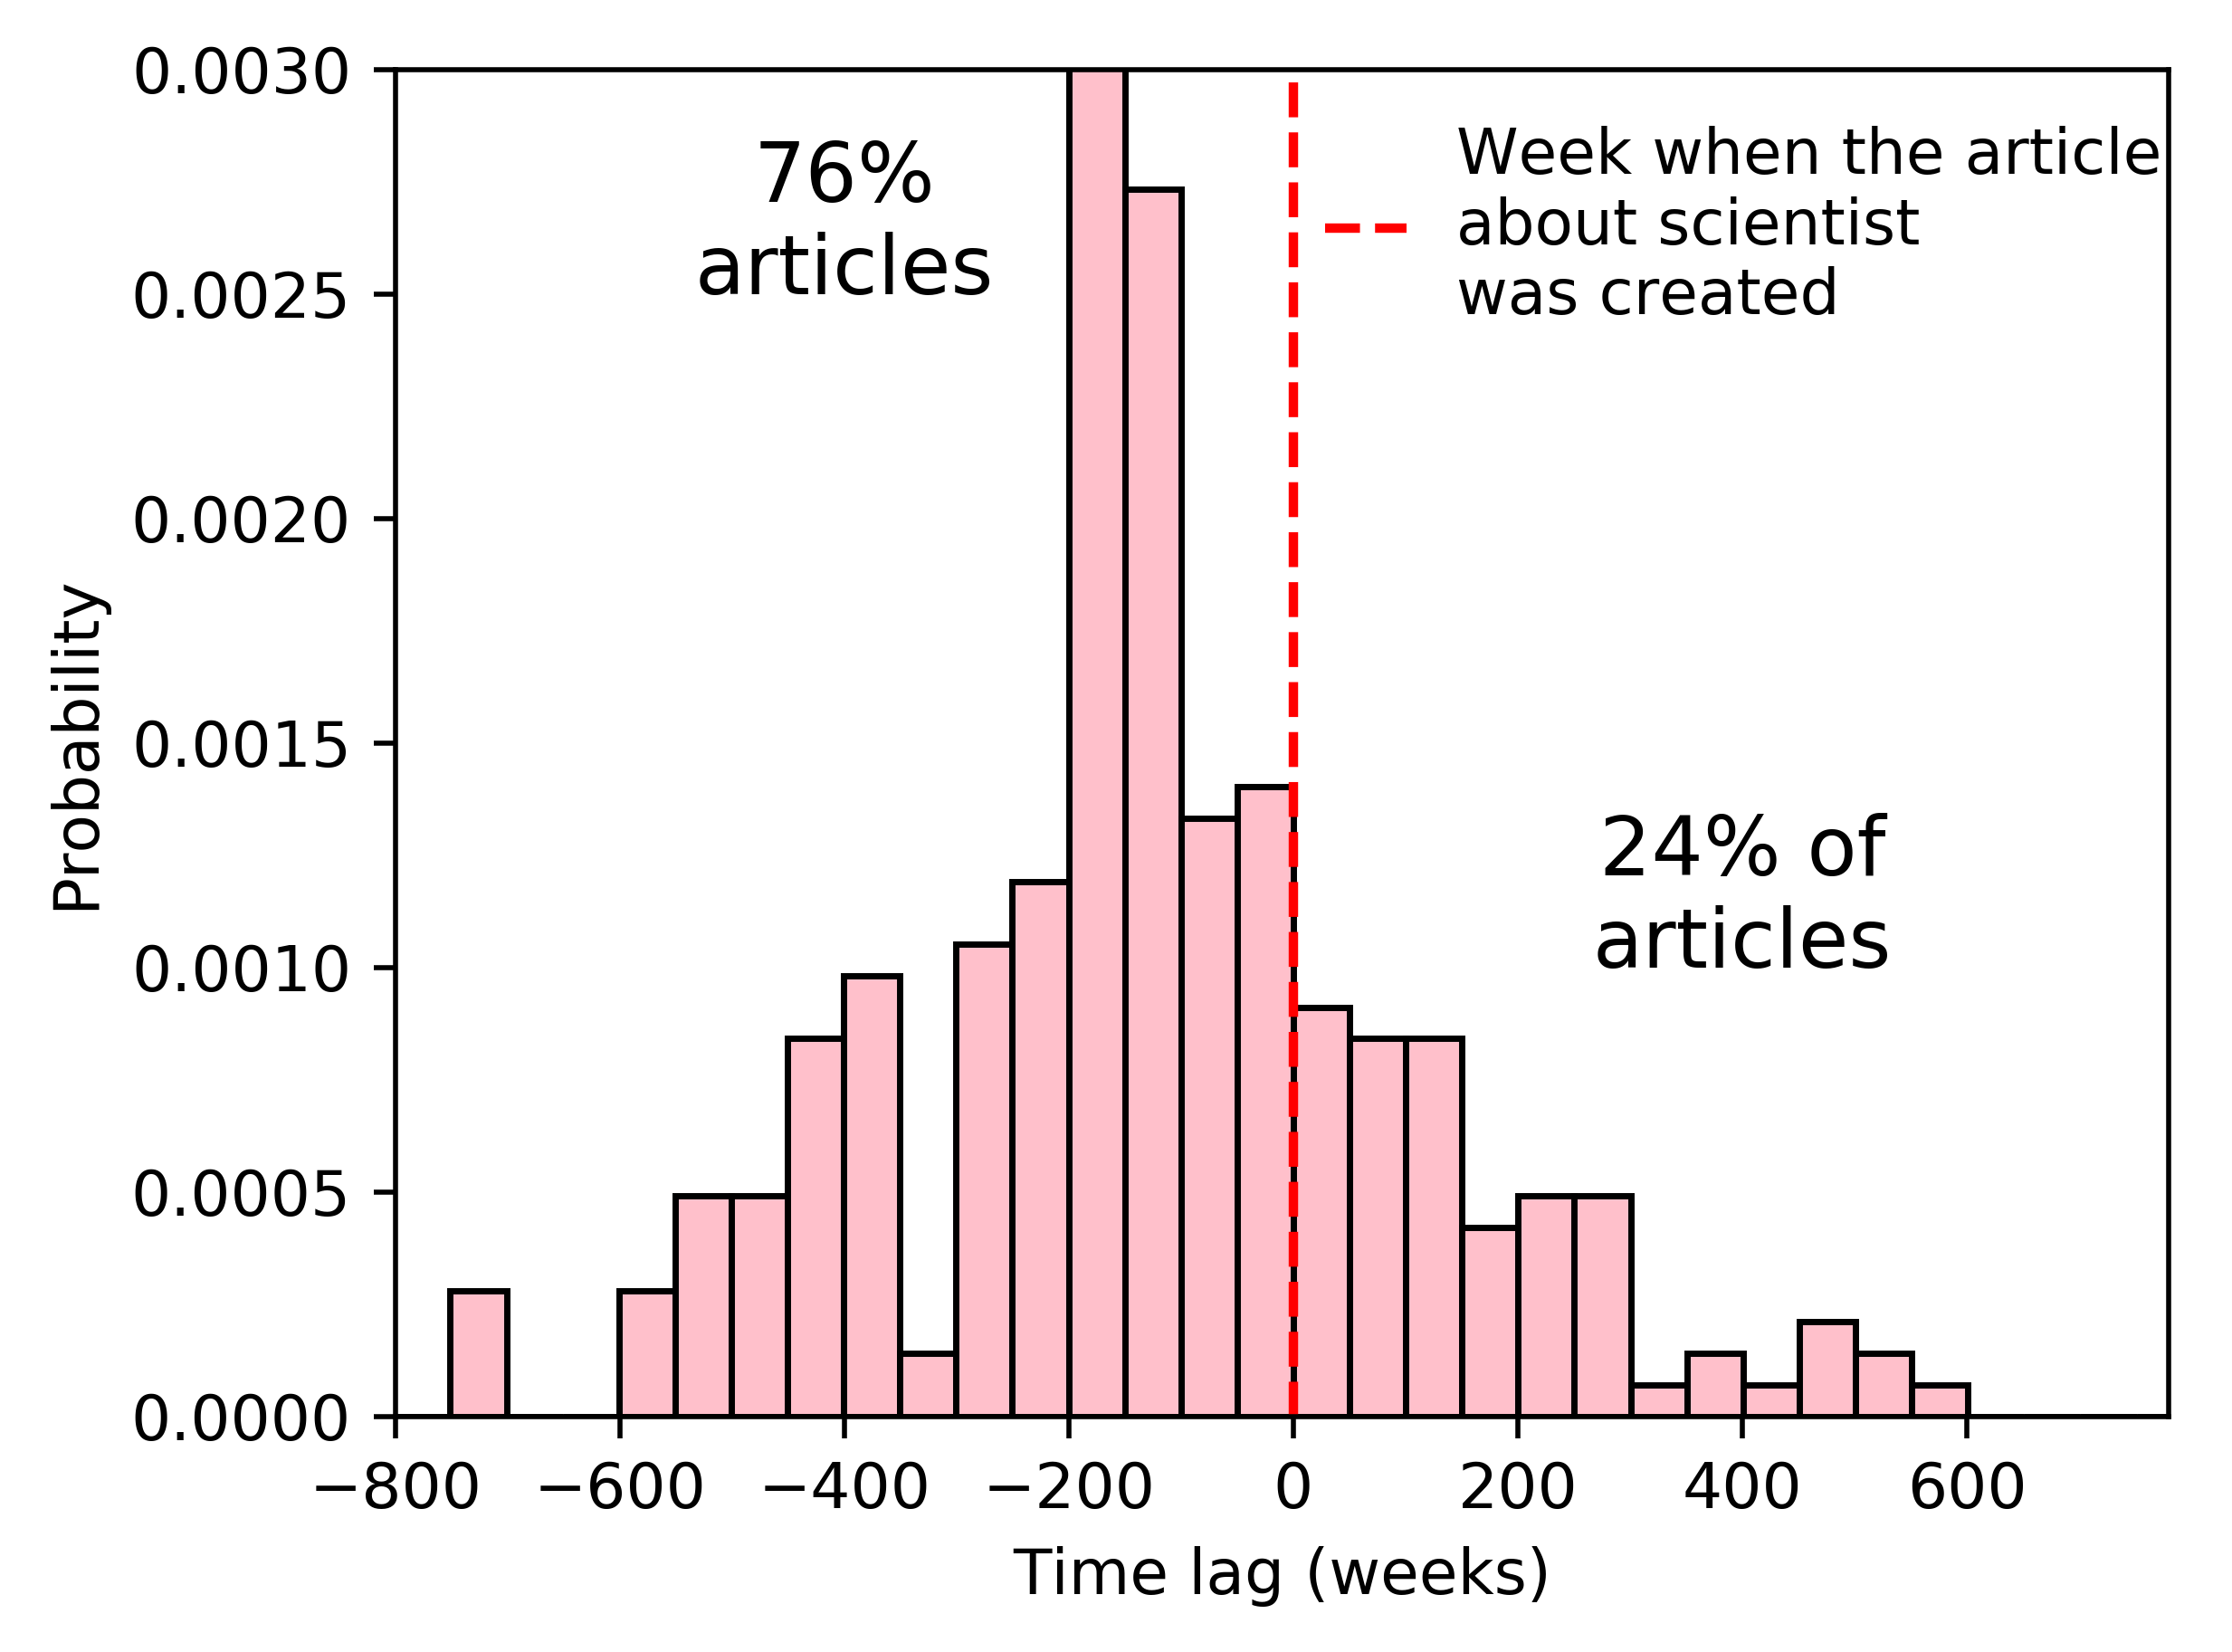

76.4912280702
66.8388048691
Ks_2sampResult(statistic=0.15111533906695923, pvalue=1.2725780605686275e-05)
MannwhitneyuResult(statistic=333893.0, pvalue=8.0355394734317578e-05)


In [270]:
female_sc_aw=list(df_sci_aw[df_sci_aw.Gender=="female"].Name)
male_sc_aw=list(df_sci_aw[df_sci_aw.Gender=="male"].Name)

data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded.pdf',color="skyblue",period="weeks",lim=0.003,text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female, '/timelag_weekly_female_awarded.pdf',color="pink",period="weeks",lim=0.003,text="Female scientist",bins=bins_plus3)
plt.show()

#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

 https://www.medcalc.org/calc/comparison_of_proportions.php

=====difference calculator


Difference	9.65 %

95% CI	4.1117 to 14.5420

Chi-squared	10.989

DF 	1

Significance level	P = 0.0009

# of topics 460
Male scientist


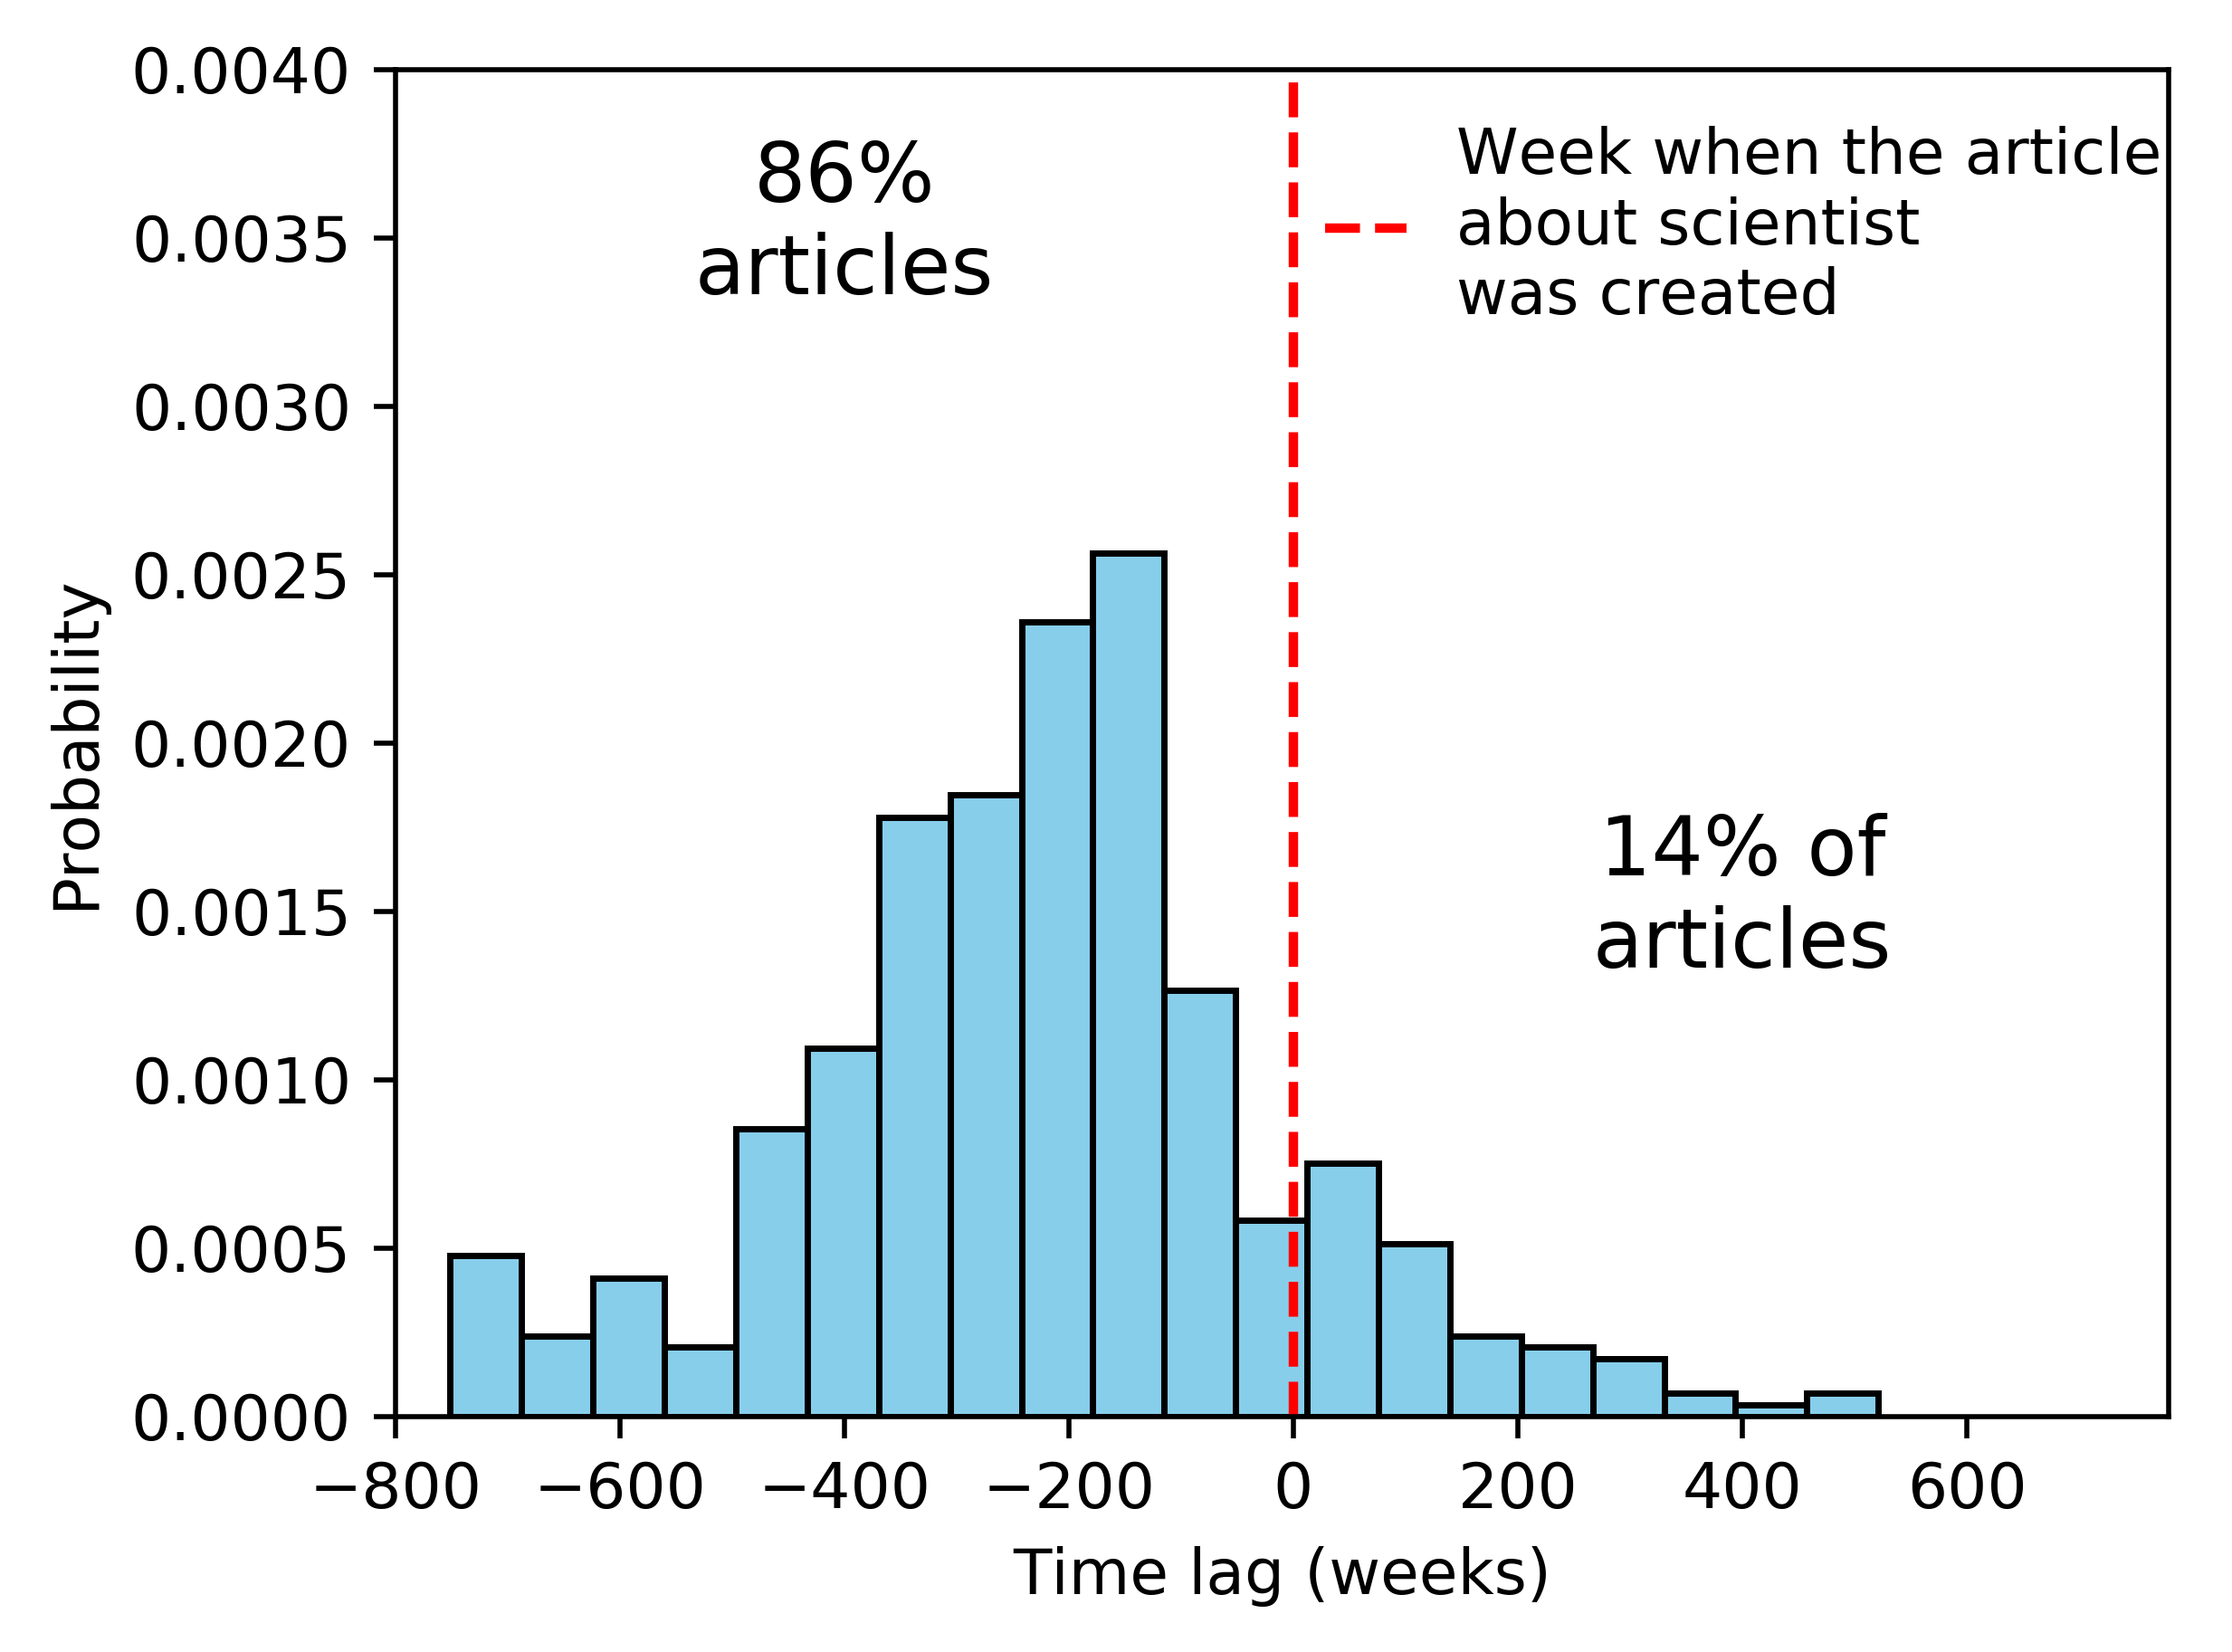

# of topics 62
Female scientist


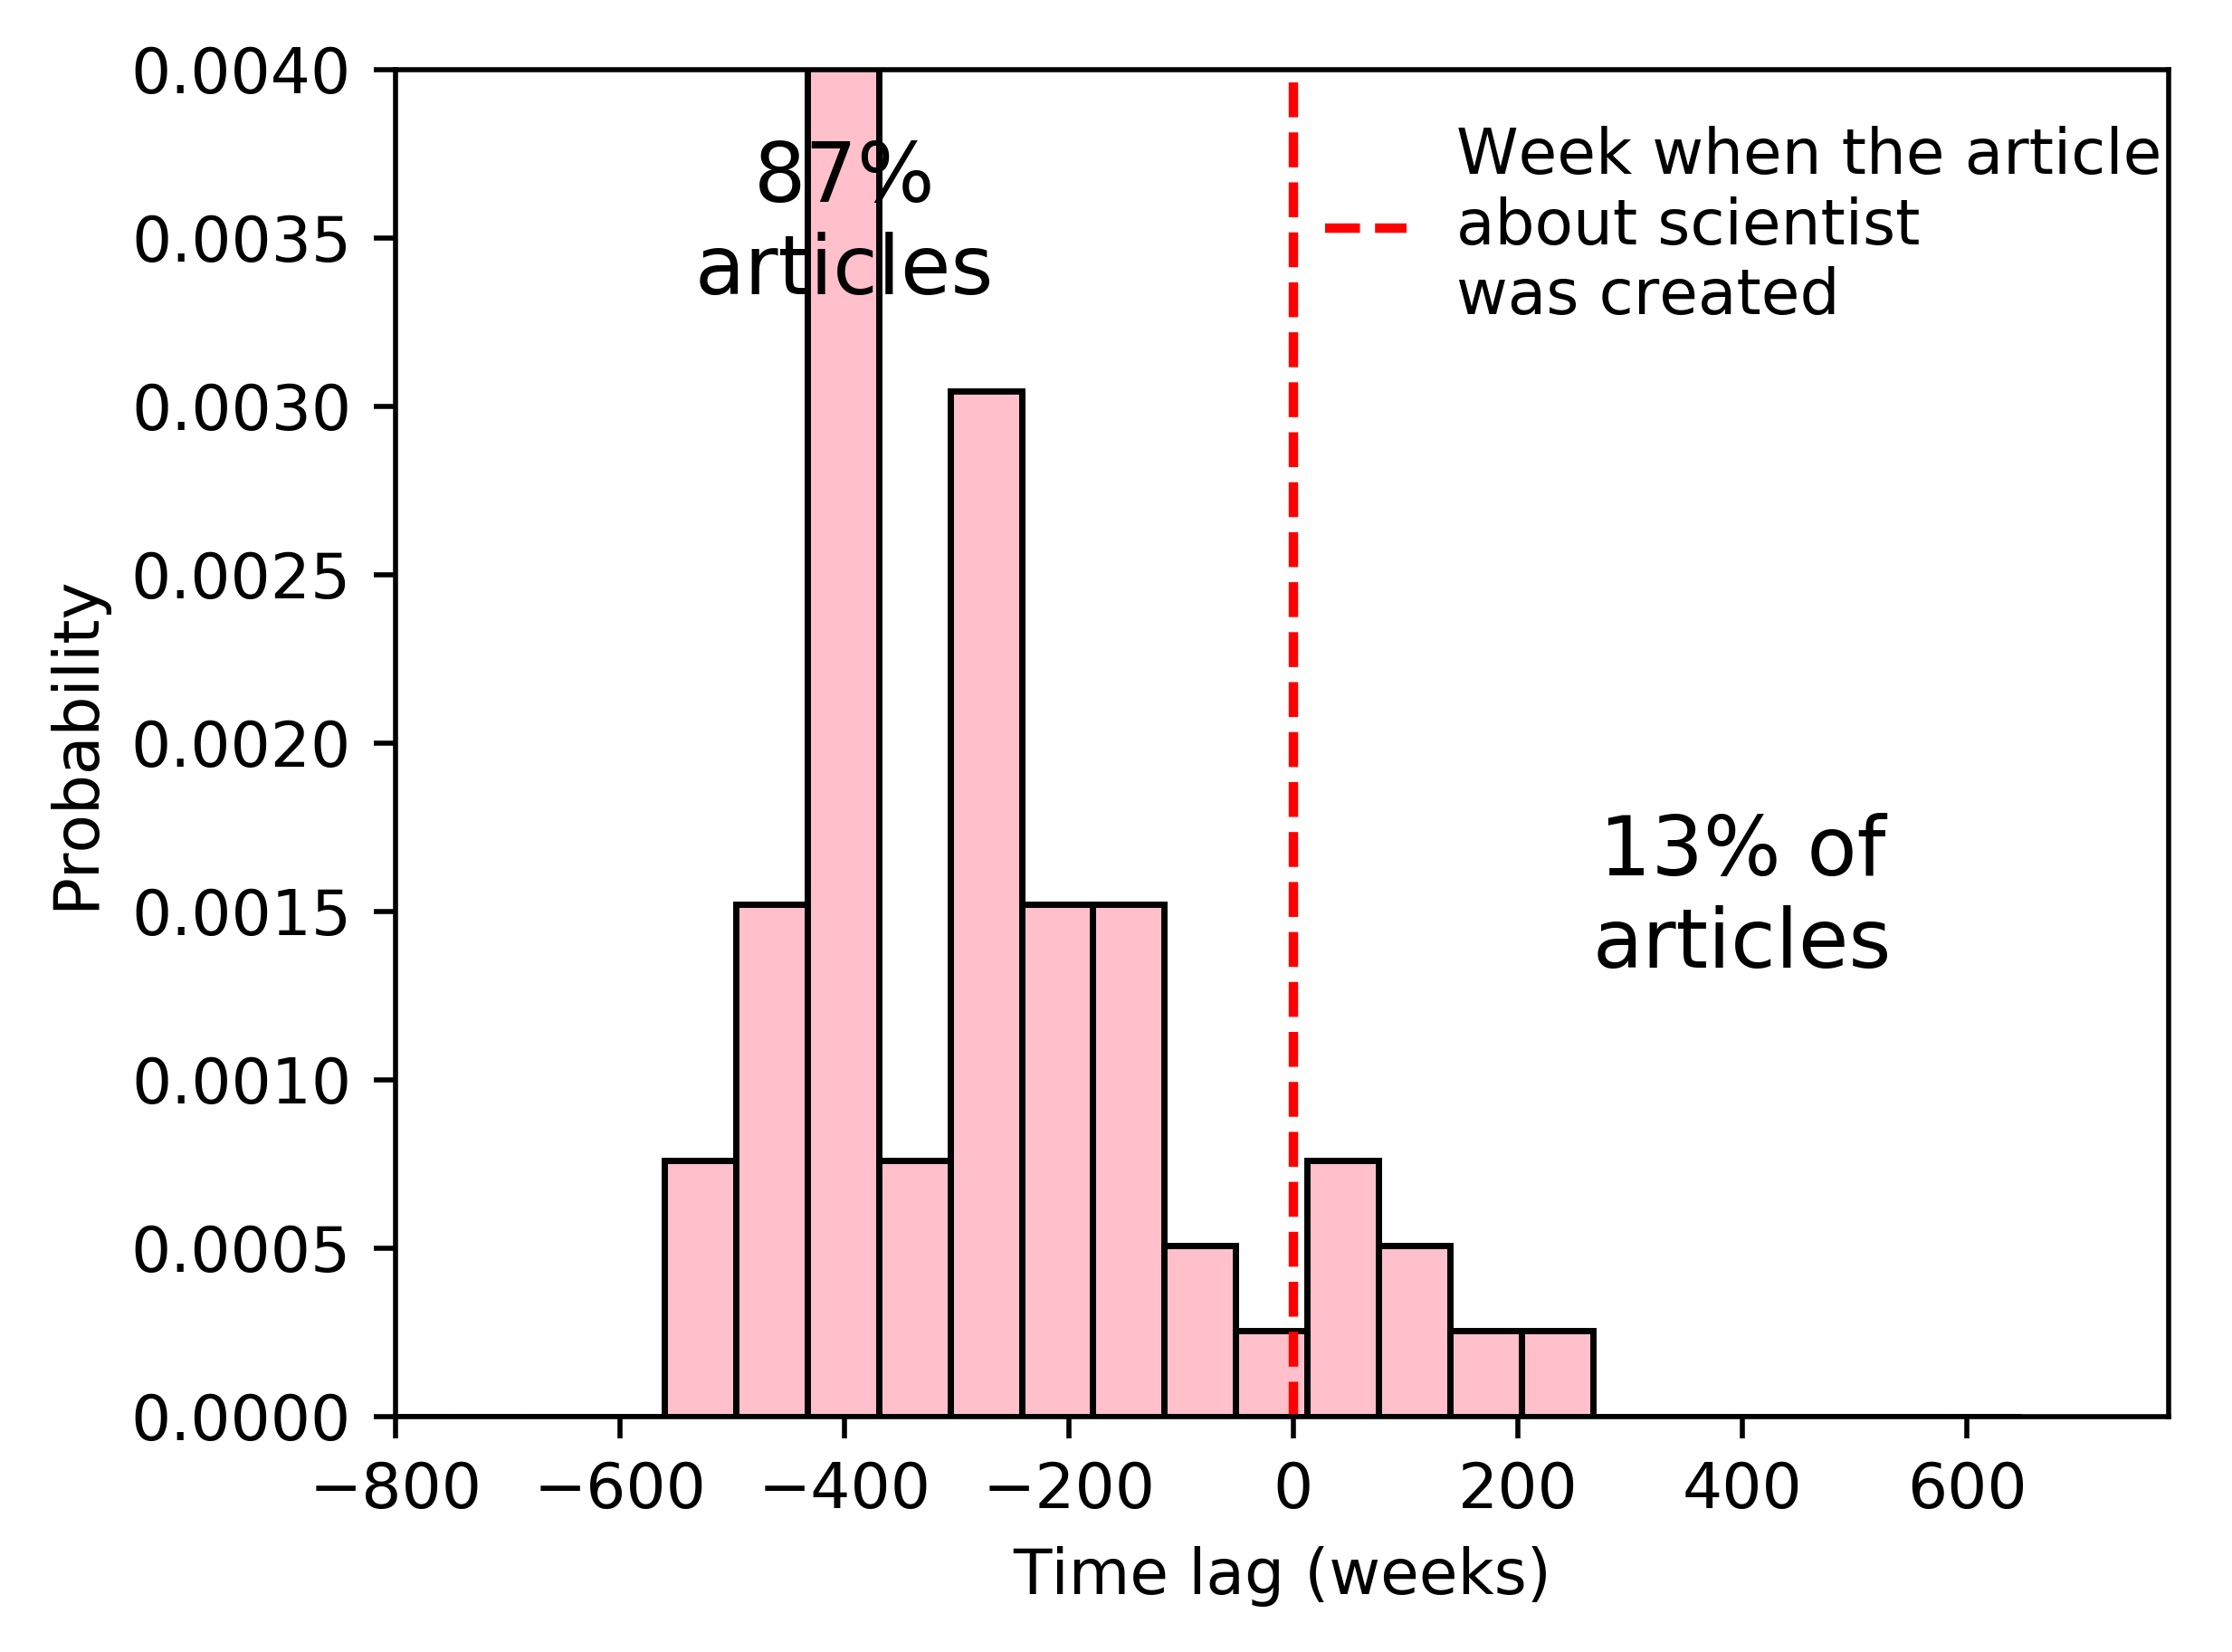

87.0967741935
85.8695652174
Ks_2sampResult(statistic=0.2202664796633941, pvalue=0.008199431176614768)
MannwhitneyuResult(statistic=11572.5, pvalue=0.0079739683318507861)


In [271]:
female_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Physiology or Medicine")].Name)
male_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="male")&(df_sci_aw.Field=="Physiology or Medicine")].Name)


data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_medicine_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded_medicine.pdf',color="skyblue",period="weeks",lim=0.004,bins=20,text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_medicine_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female, '/timelag_weekly_female_awarded_medicine.pdf',color="pink",period="weeks",lim=0.004,text="Female scientist",bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

Difference	1.23%

95% CI	-9.7035 to 8.3546

Chi-squared	0.069

DF 	1

Significance level	P = 0.7934

# Chemistry               ( male      45,        female     5)

# of topics 426
Male scientist


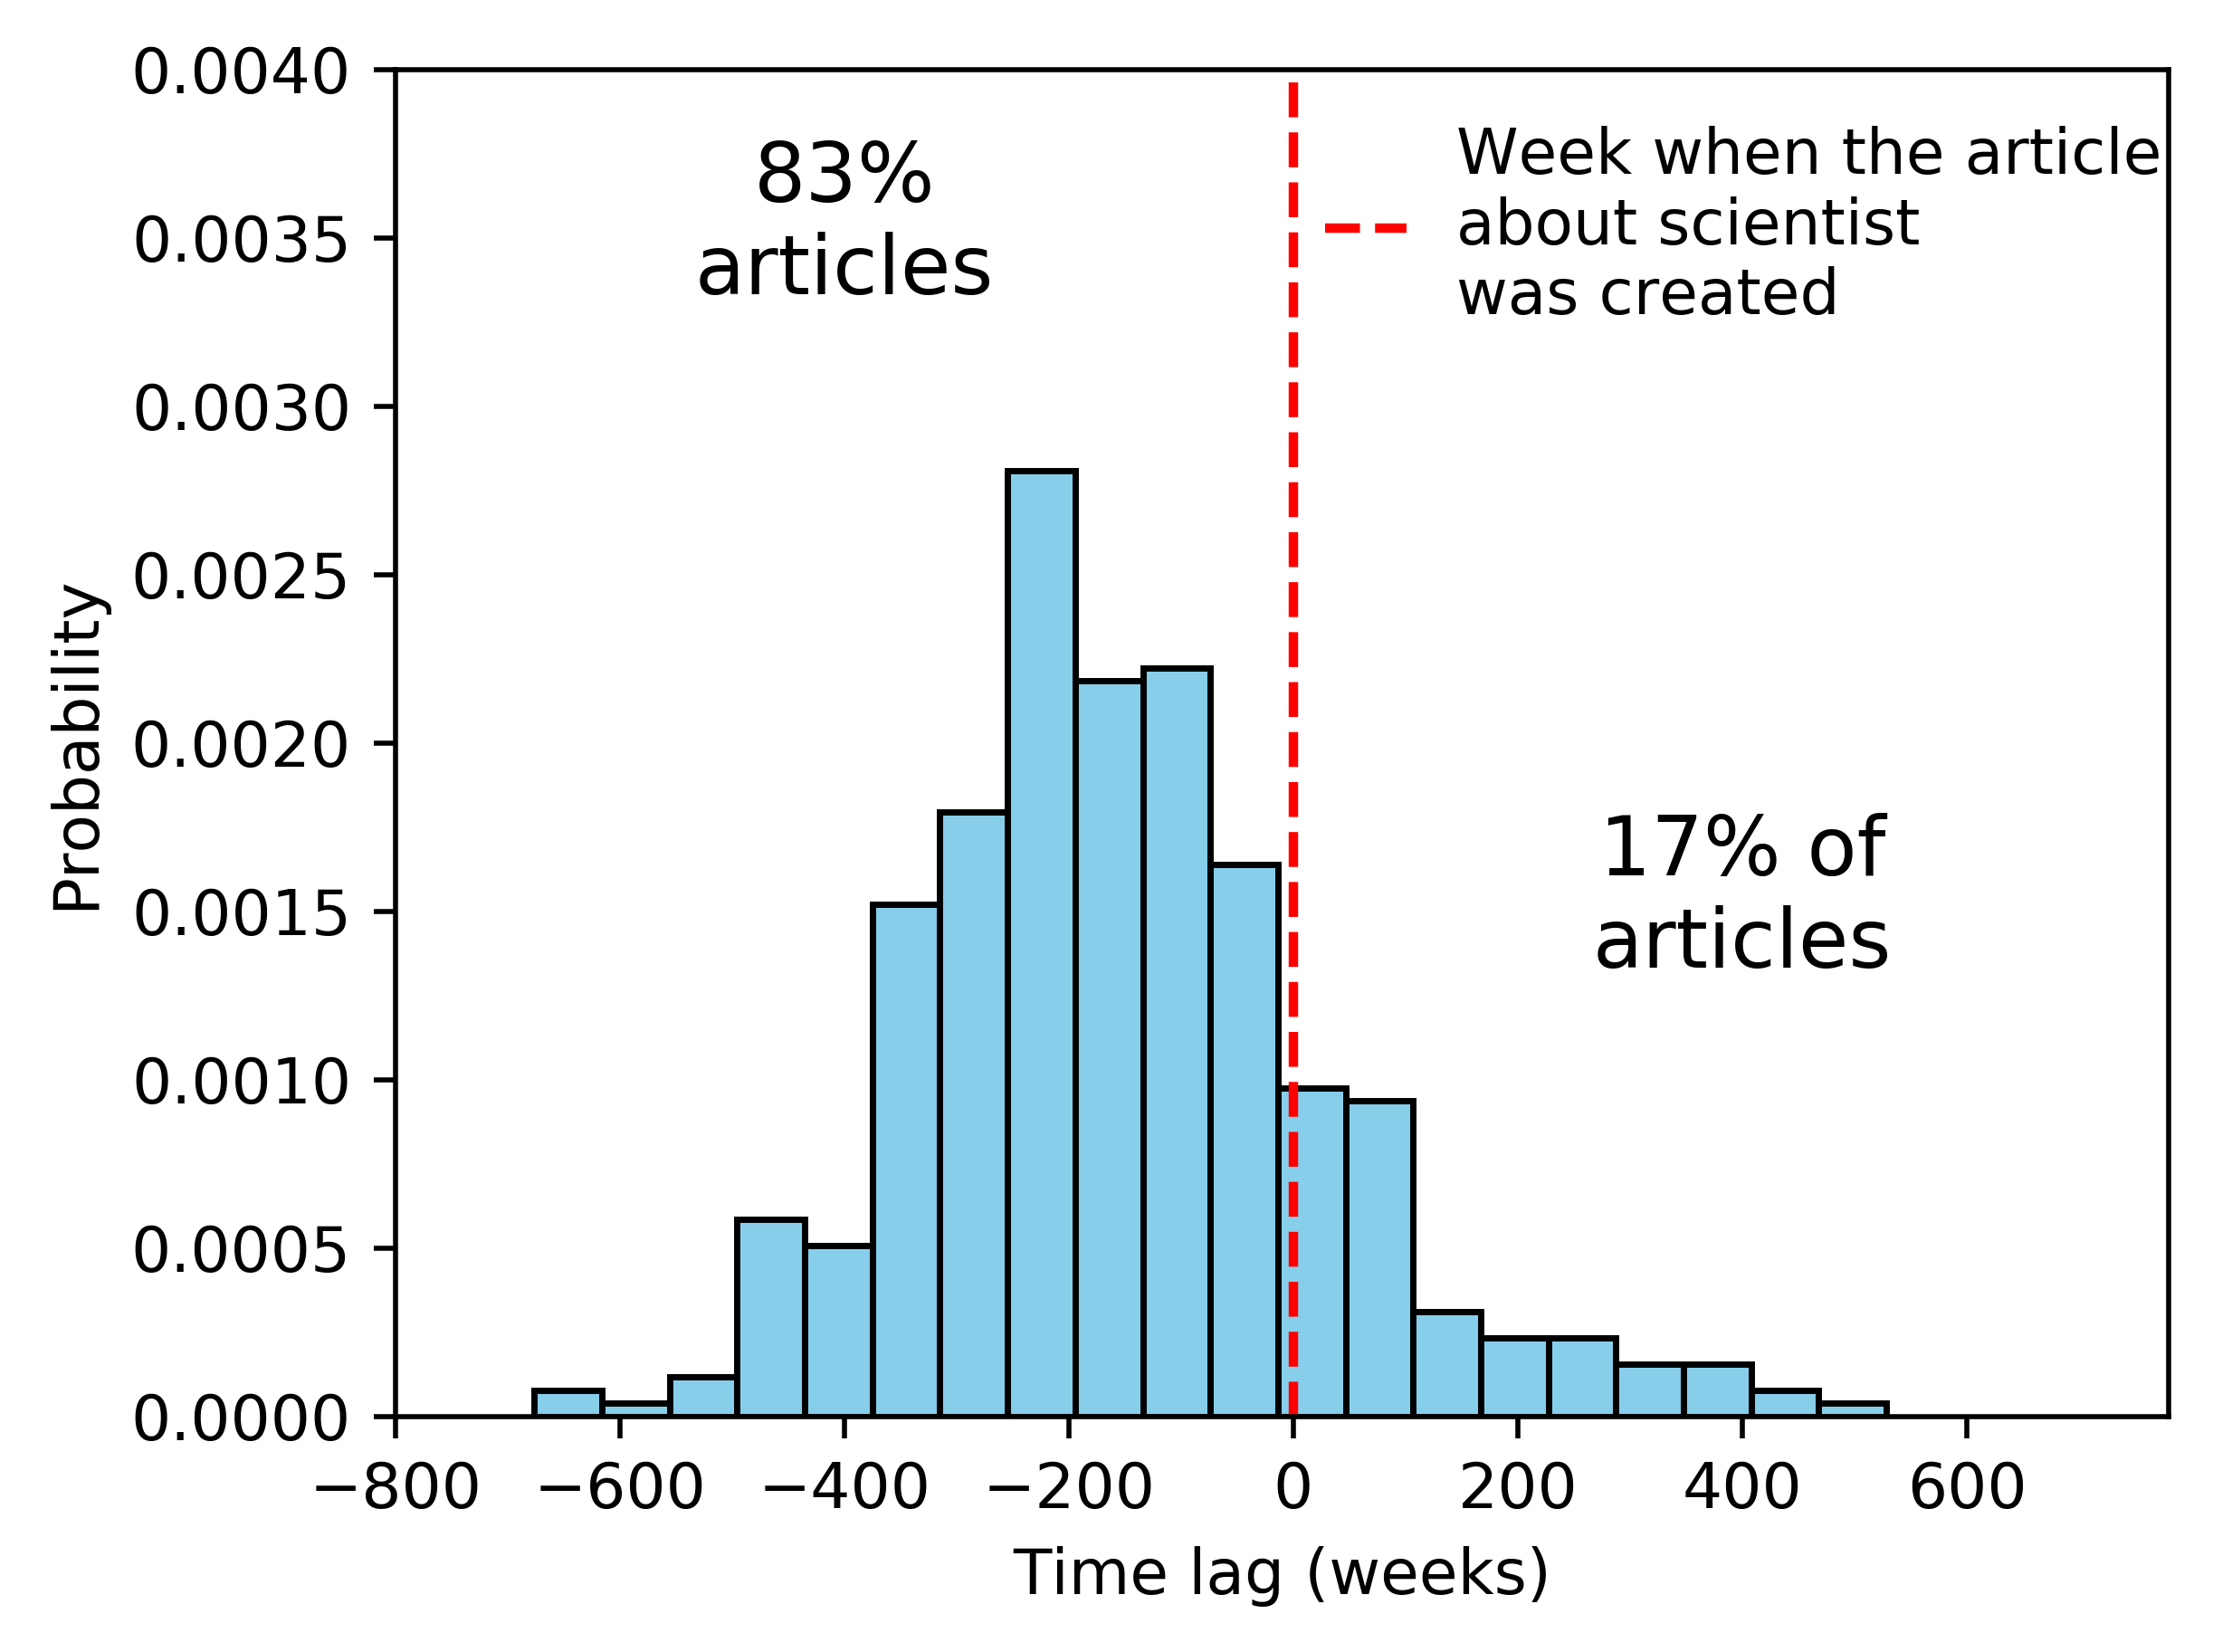

# of topics 70
Female scientist


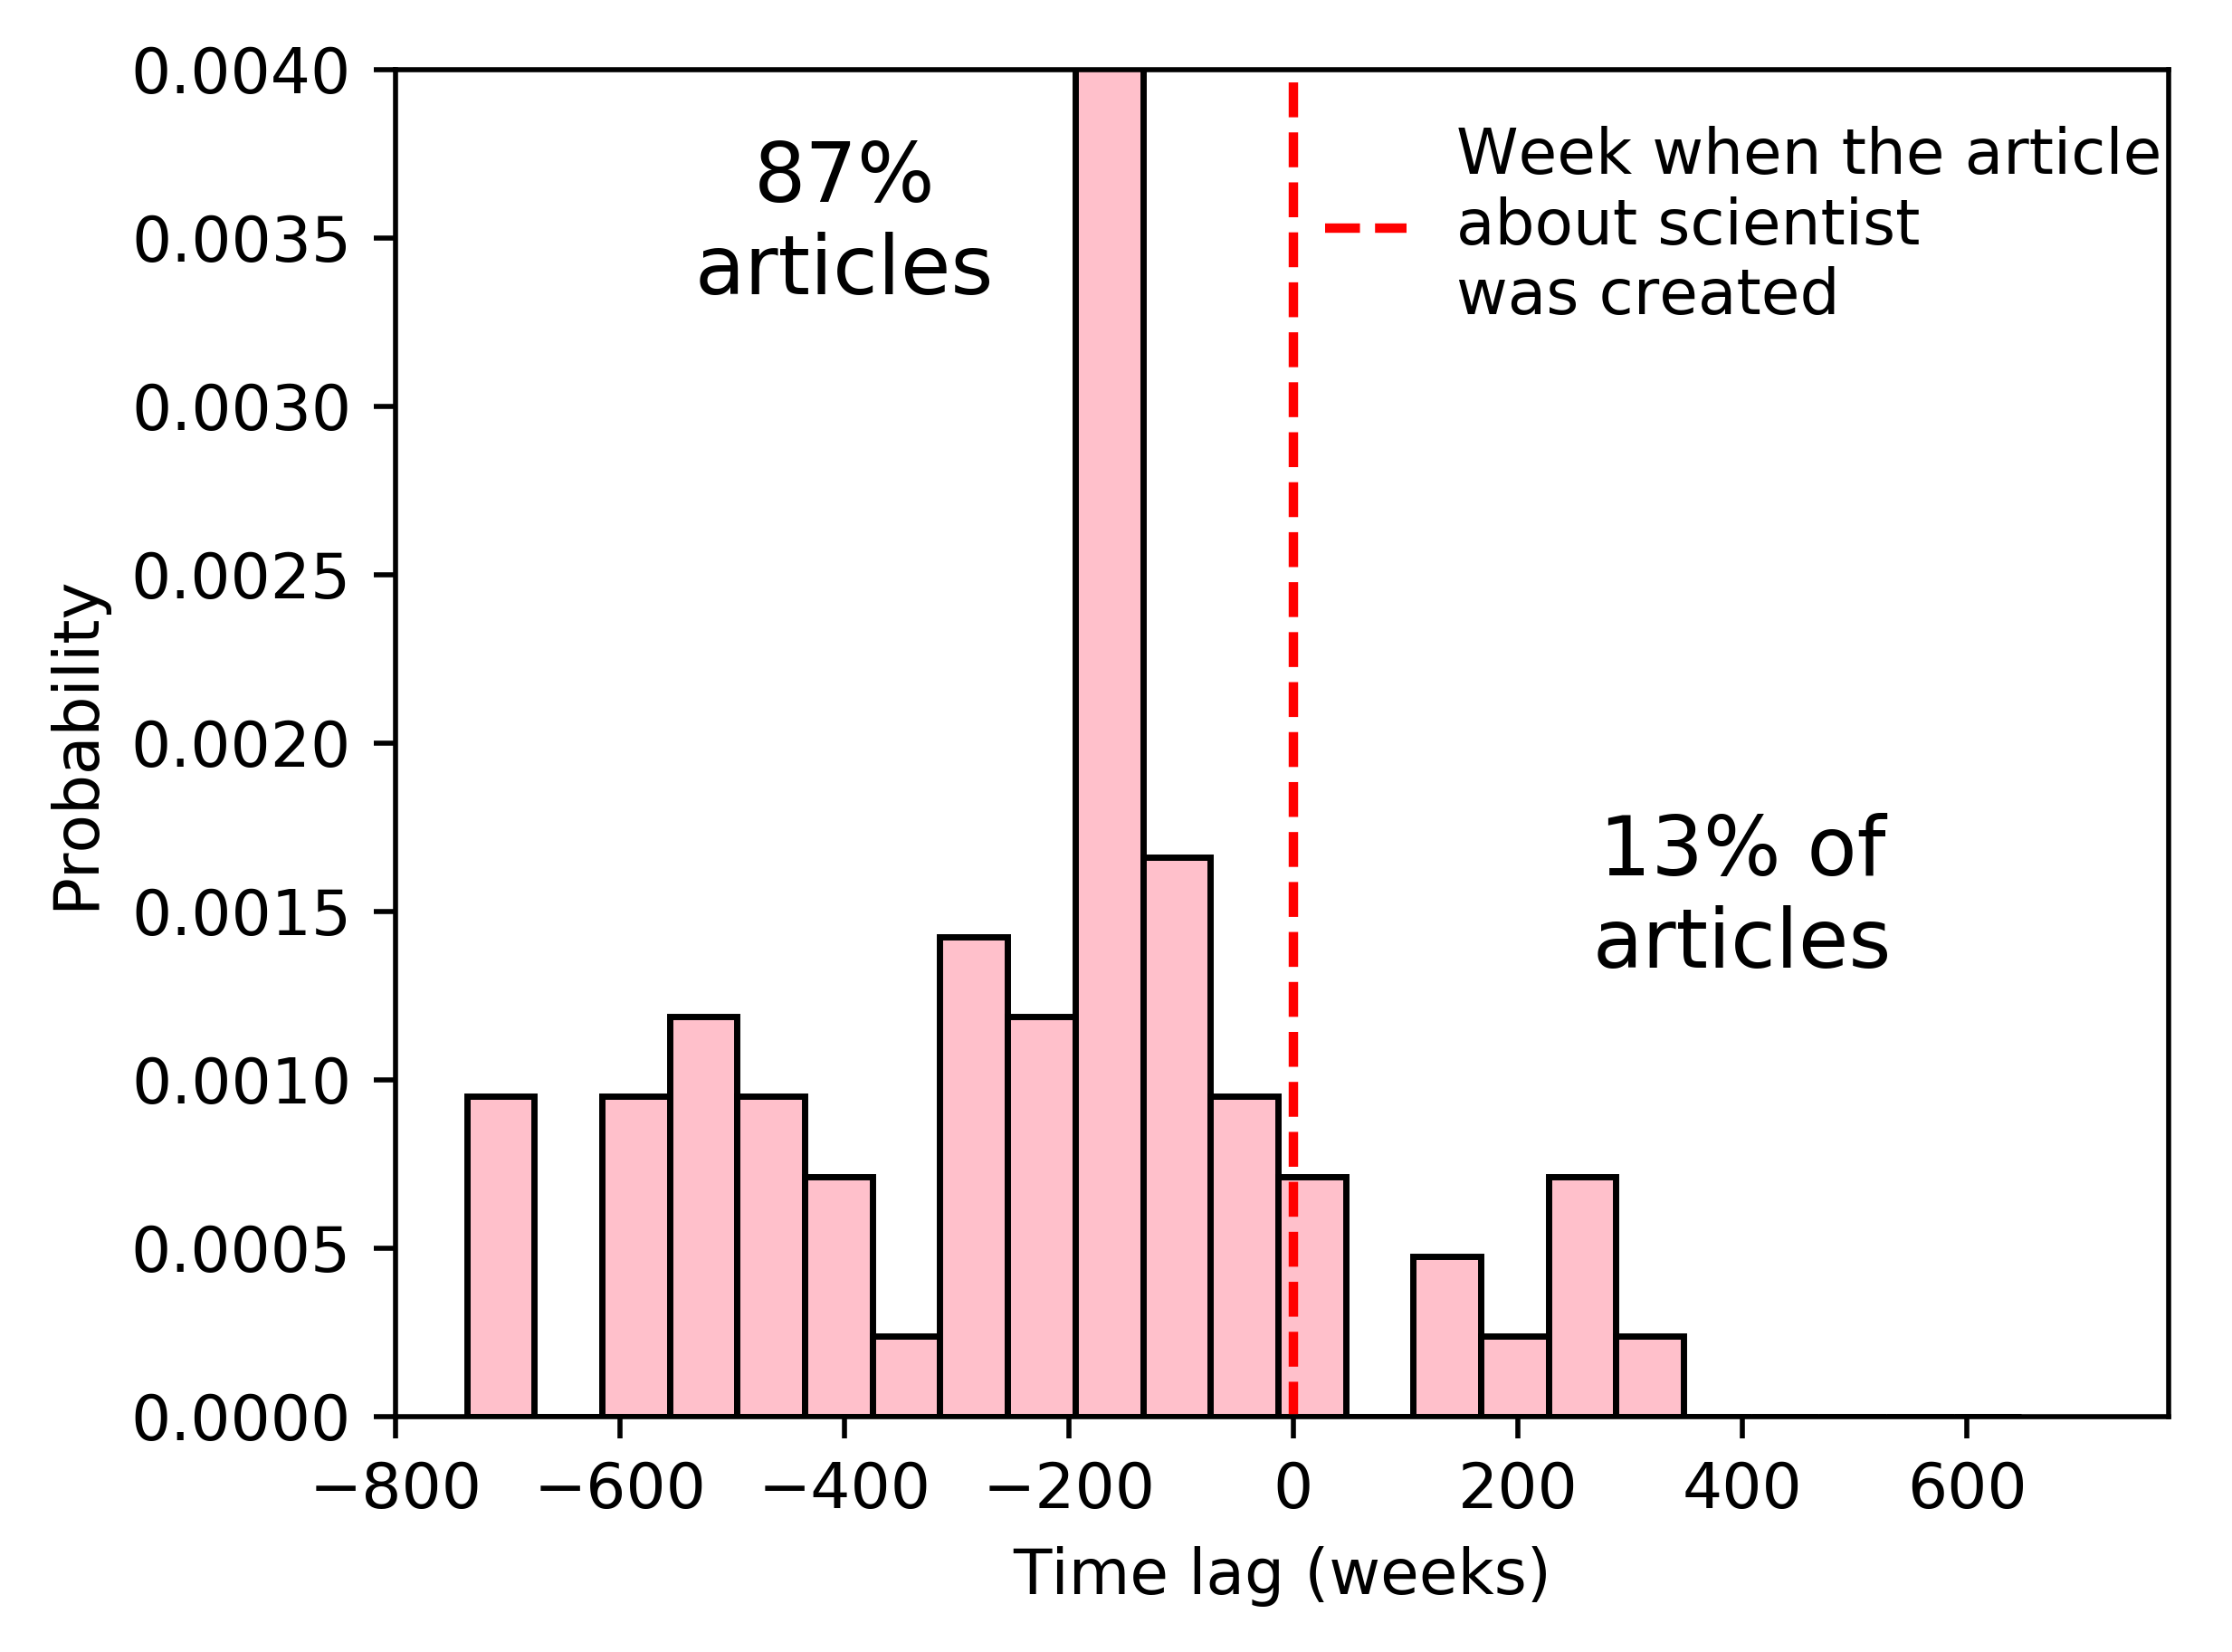

87.1428571429
83.0985915493
Ks_2sampResult(statistic=0.21314553990610327, pvalue=0.0070109775730973385)
MannwhitneyuResult(statistic=12463.0, pvalue=0.013852290350340505)


In [272]:
female_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Chemistry")].Name)
male_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="male")&(df_sci_aw.Field=="Chemistry")].Name)


data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_medicine_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded_chemistry.pdf',color="skyblue",period="weeks",lim=0.004,bins=20,text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_medicine_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female, '/timelag_weekly_female_awarded_chemistry.pdf',color="pink",period="weeks",lim=0.004,text="Female scientist",bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

Difference	4.04 %

95% CI	-6.2955 to 11.1223

Chi-squared	0.717

DF 	1

Significance level	P = 0.3972


# of topics 624
Male scientist


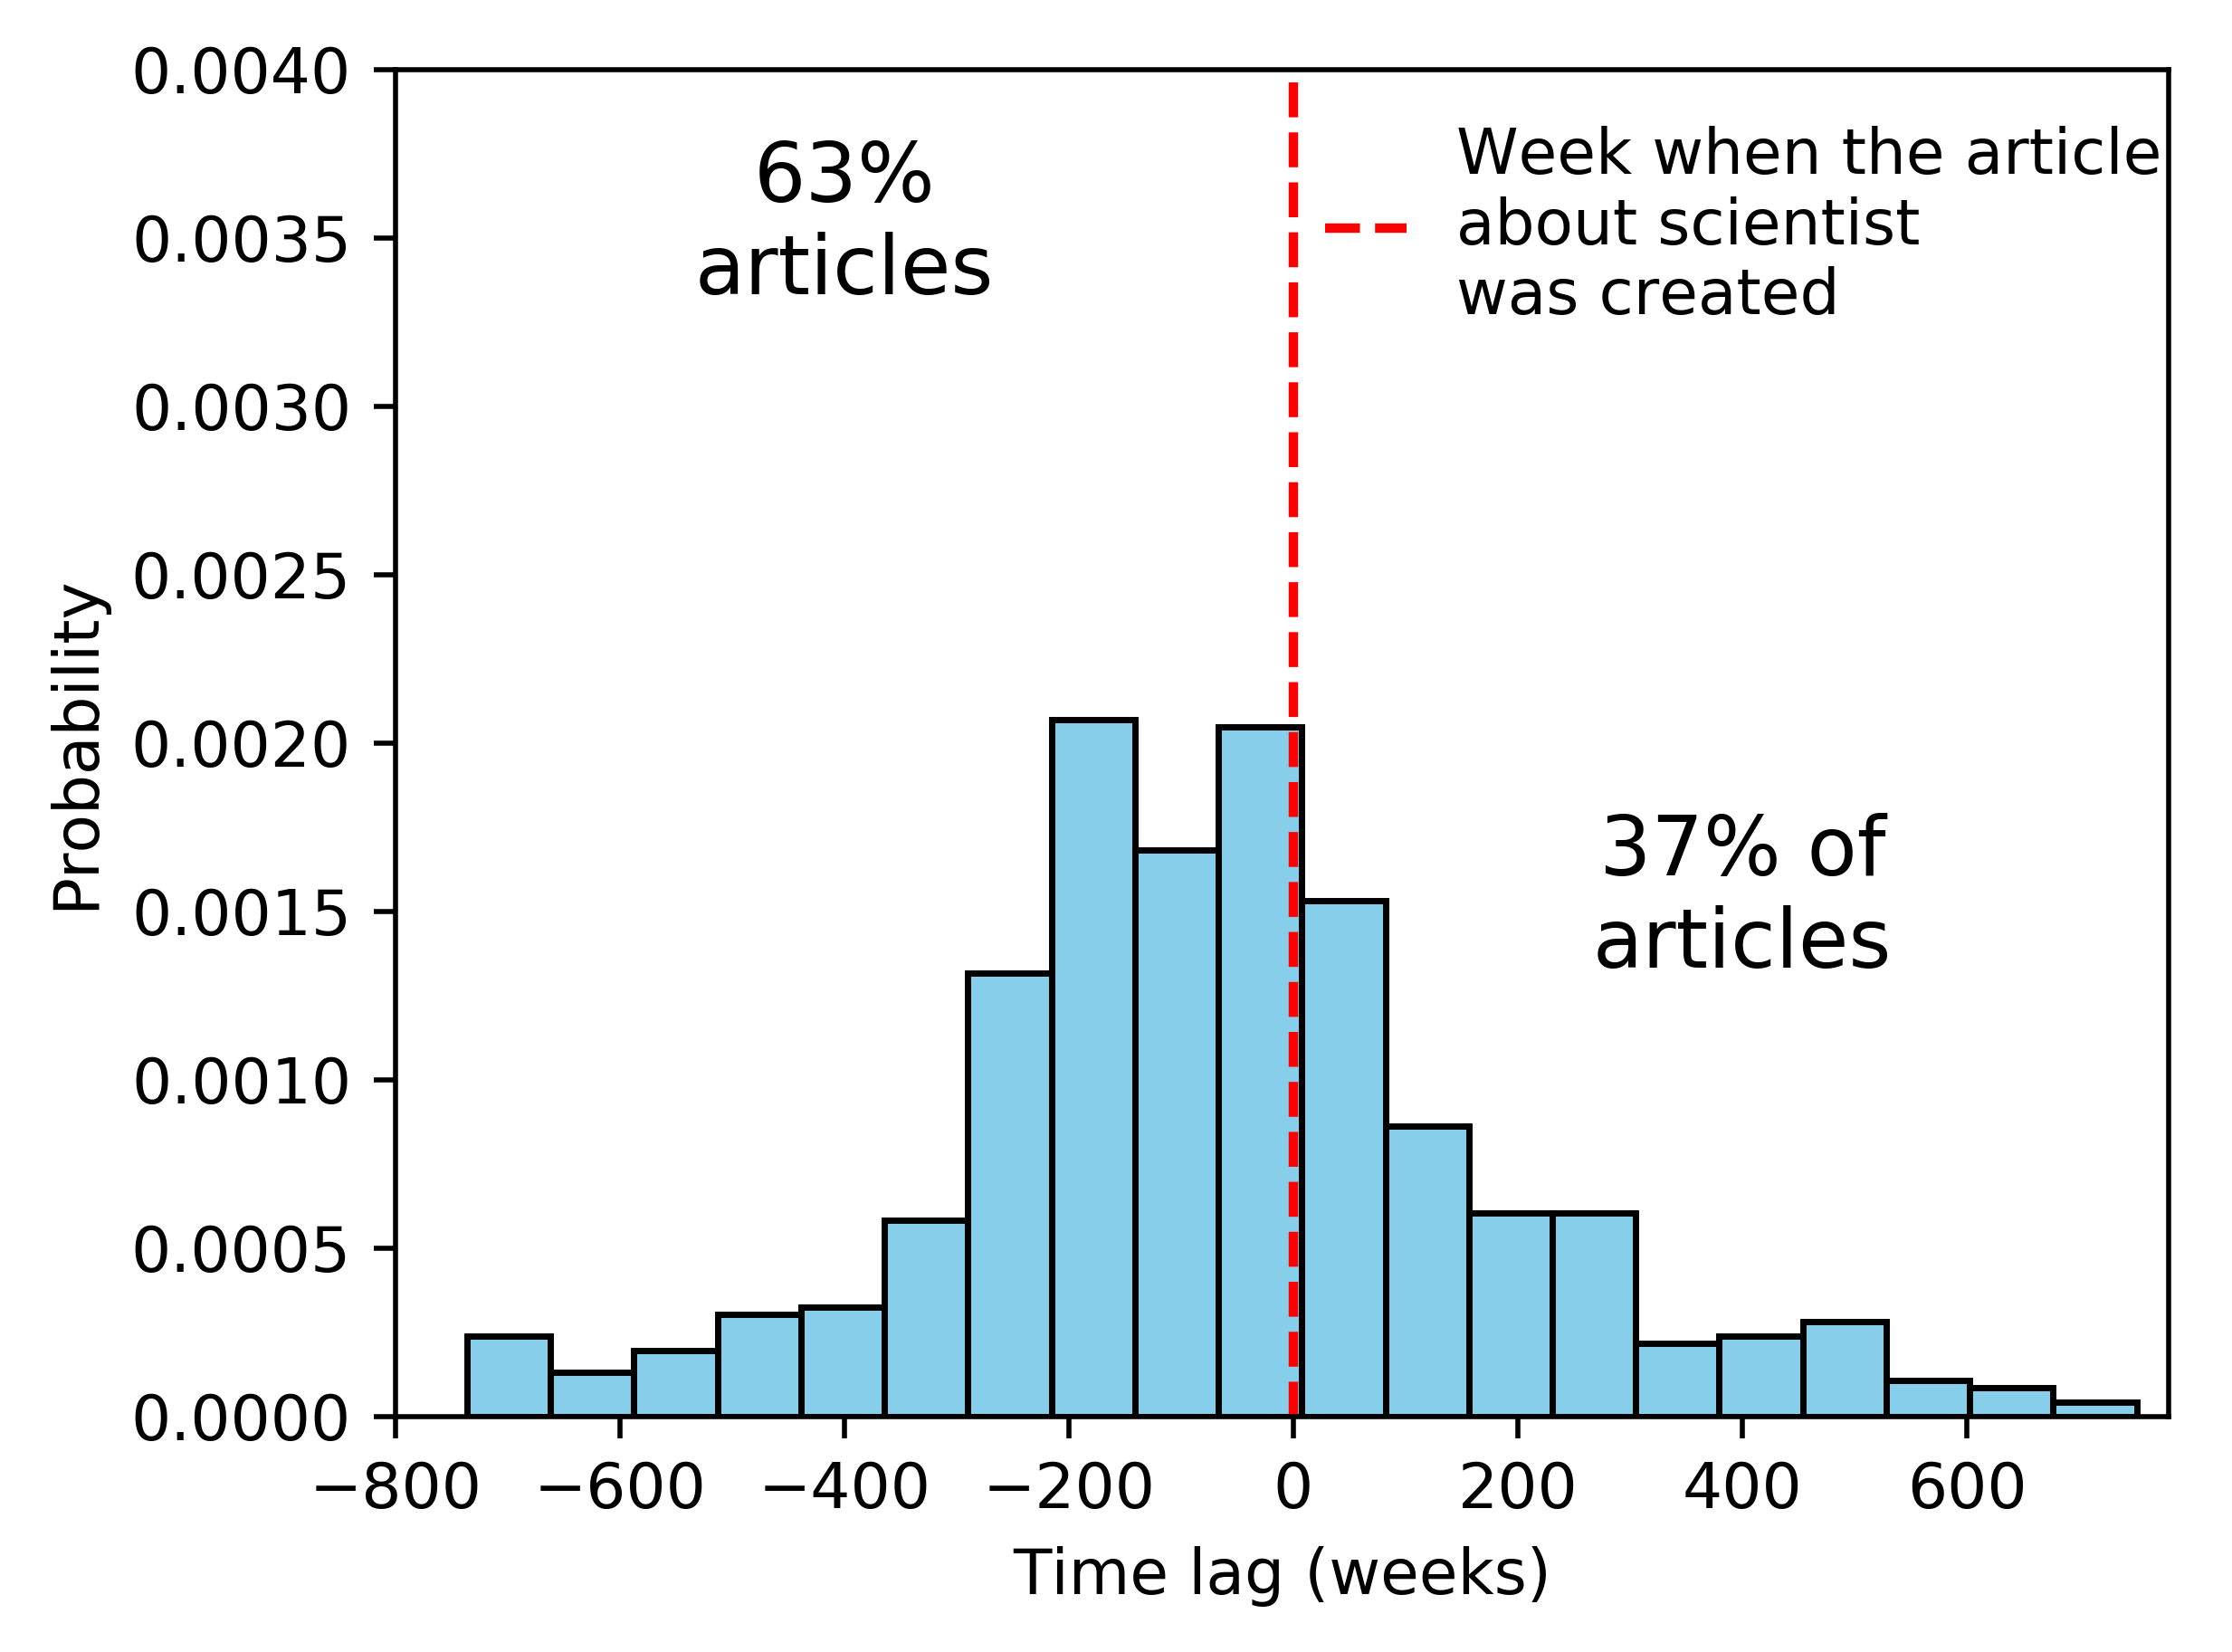

# of topics 54
Female scientist


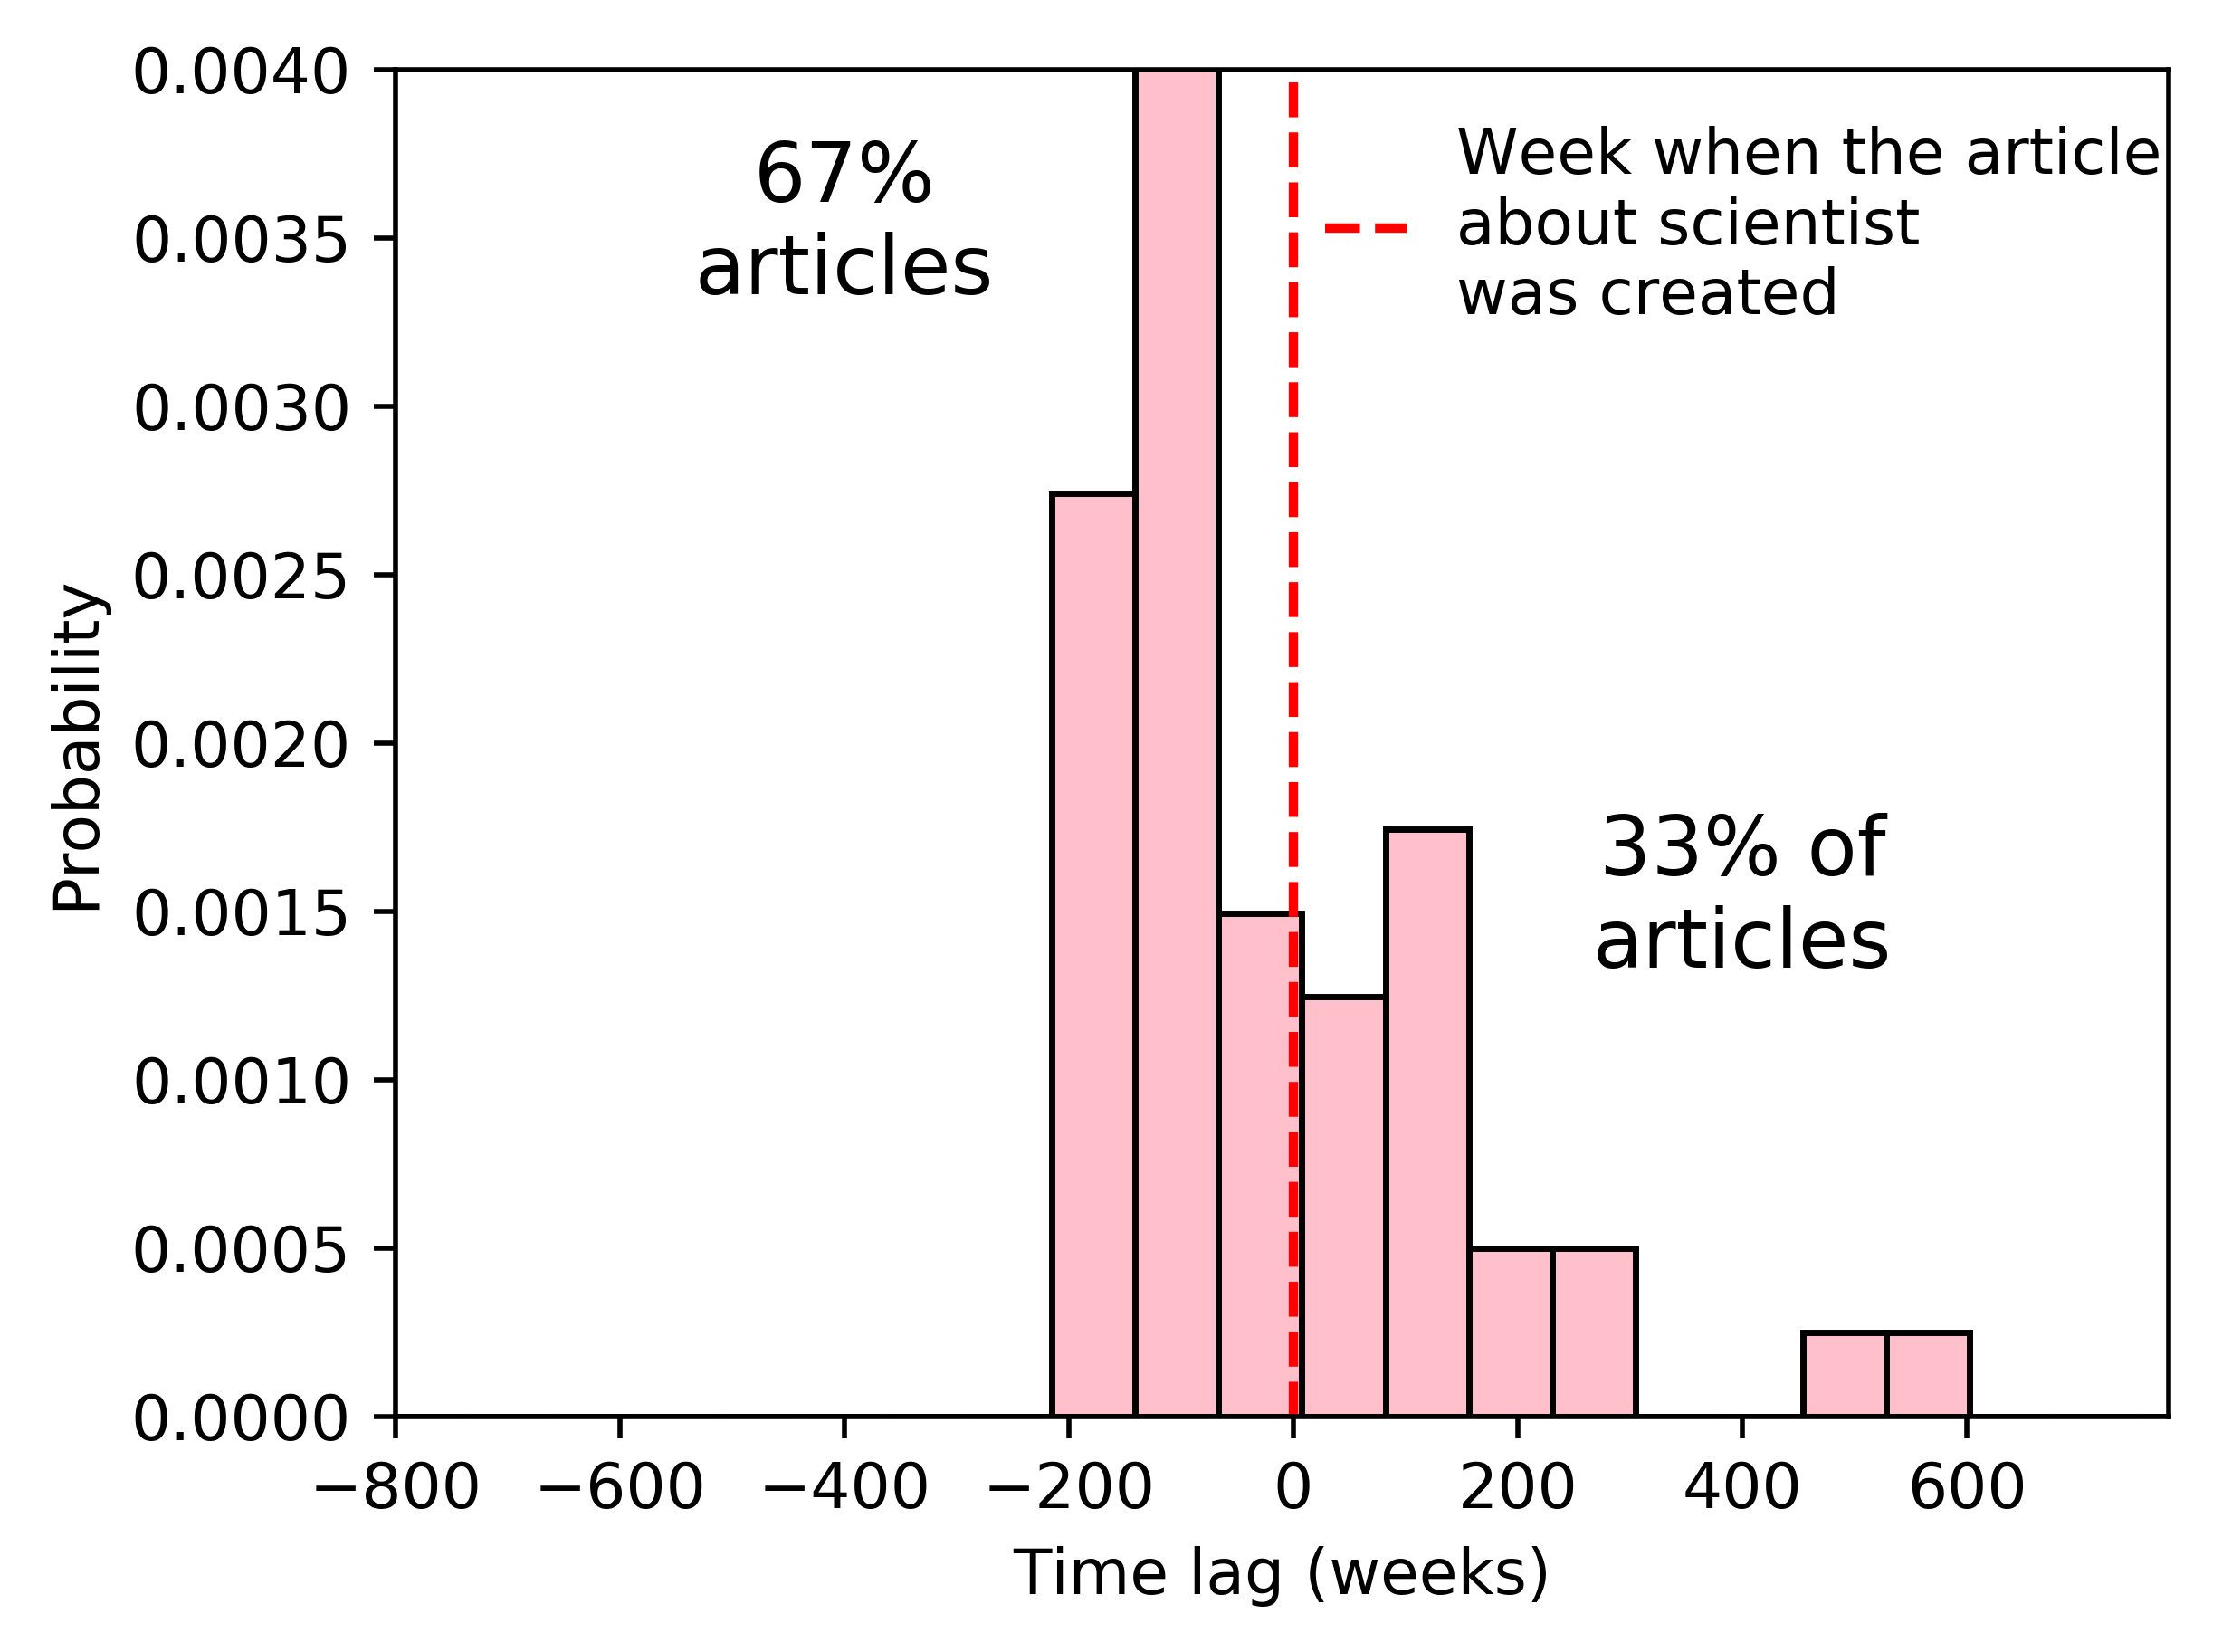

66.6666666667
62.9807692308
Ks_2sampResult(statistic=0.28116096866096862, pvalue=0.00057014372986420483)
MannwhitneyuResult(statistic=15025.0, pvalue=0.093436095734884927)


In [273]:
female_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Physics")].Name)
male_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="male")&(df_sci_aw.Field=="Physics")].Name)


data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_medicine_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded_physics.pdf',color="skyblue",period="weeks",lim=0.004,bins=20,text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_medicine_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female, '/timelag_weekly_female_awarded_physics.pdf',color="pink",period="weeks",lim=0.004,text="Female scientist",bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

https://www.medcalc.org/calc/comparison_of_proportions.php

Difference	3.69%

95% CI	-10.1201 to 15.4330

Chi-squared	0.291

DF 	1

Significance level	P = 0.5897

In [ ]:
Computer Science        male      15
                        female     3
Economics               male      49
                        female     2
Mathematics             male      17
                        female     1
Biology                 male       7
                        female     1  

# Computer Science   (     male      15,                female     3)

# of topics 173
Male scientist


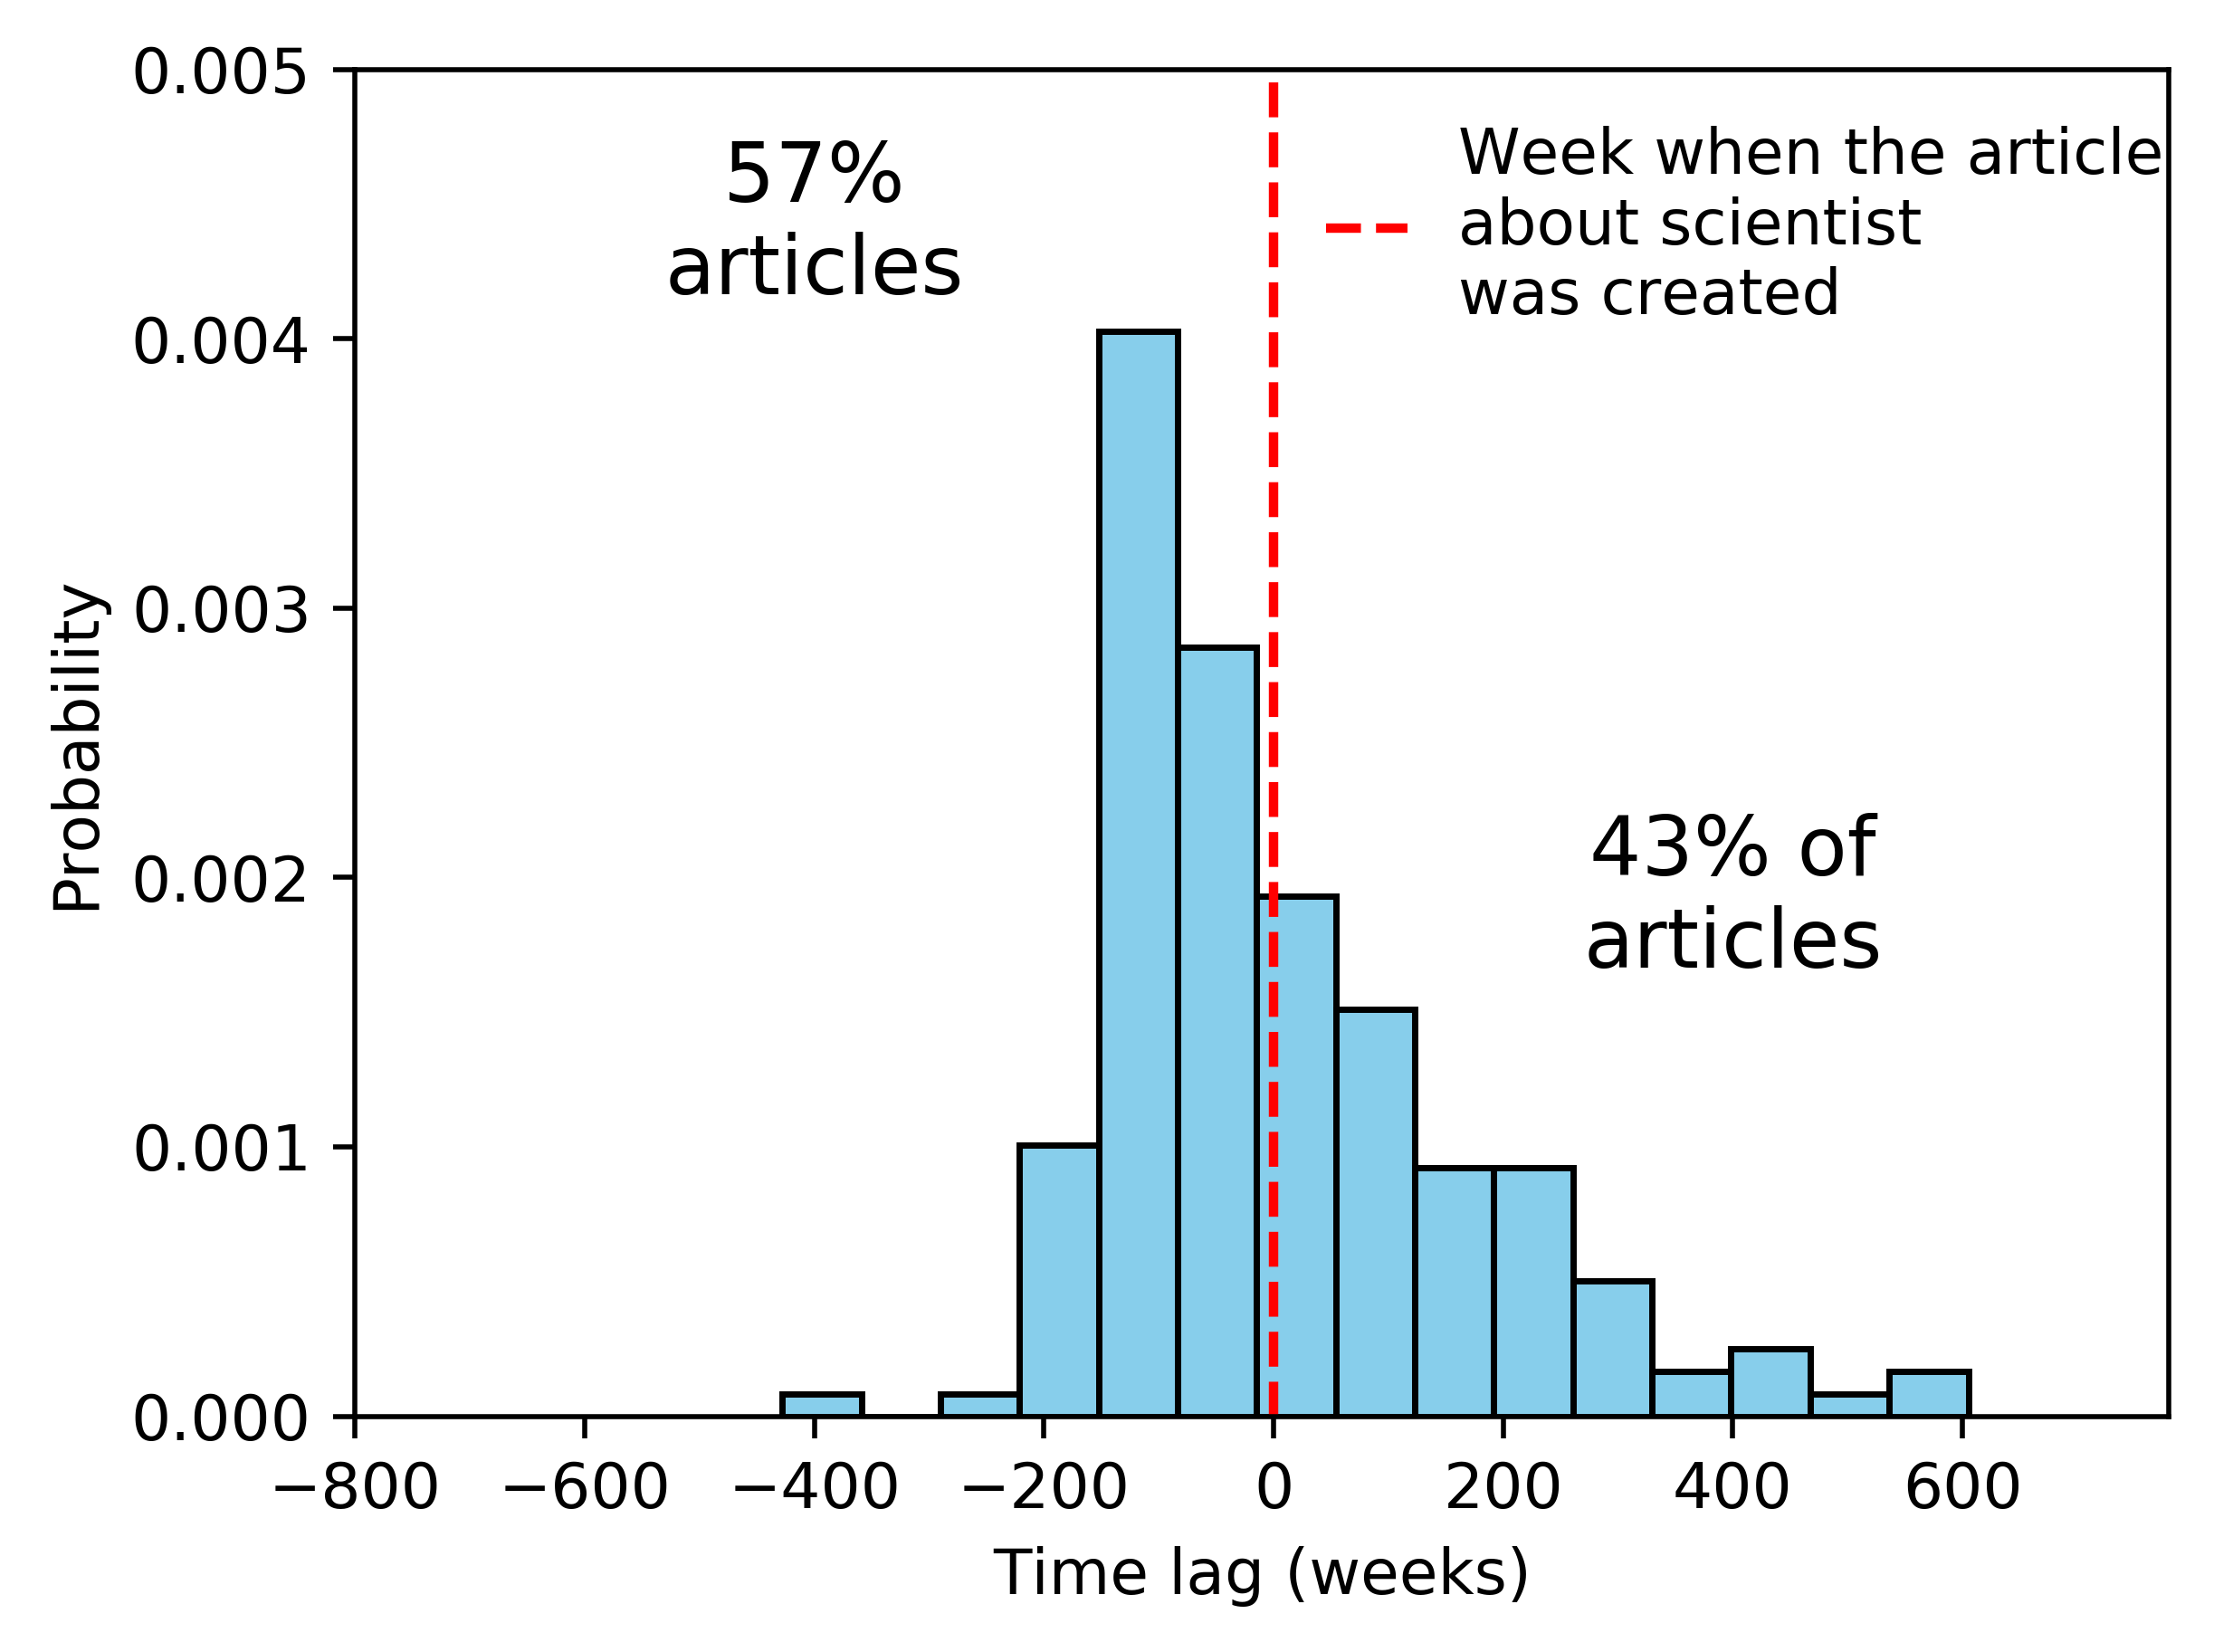

# of topics 39
Female scientist


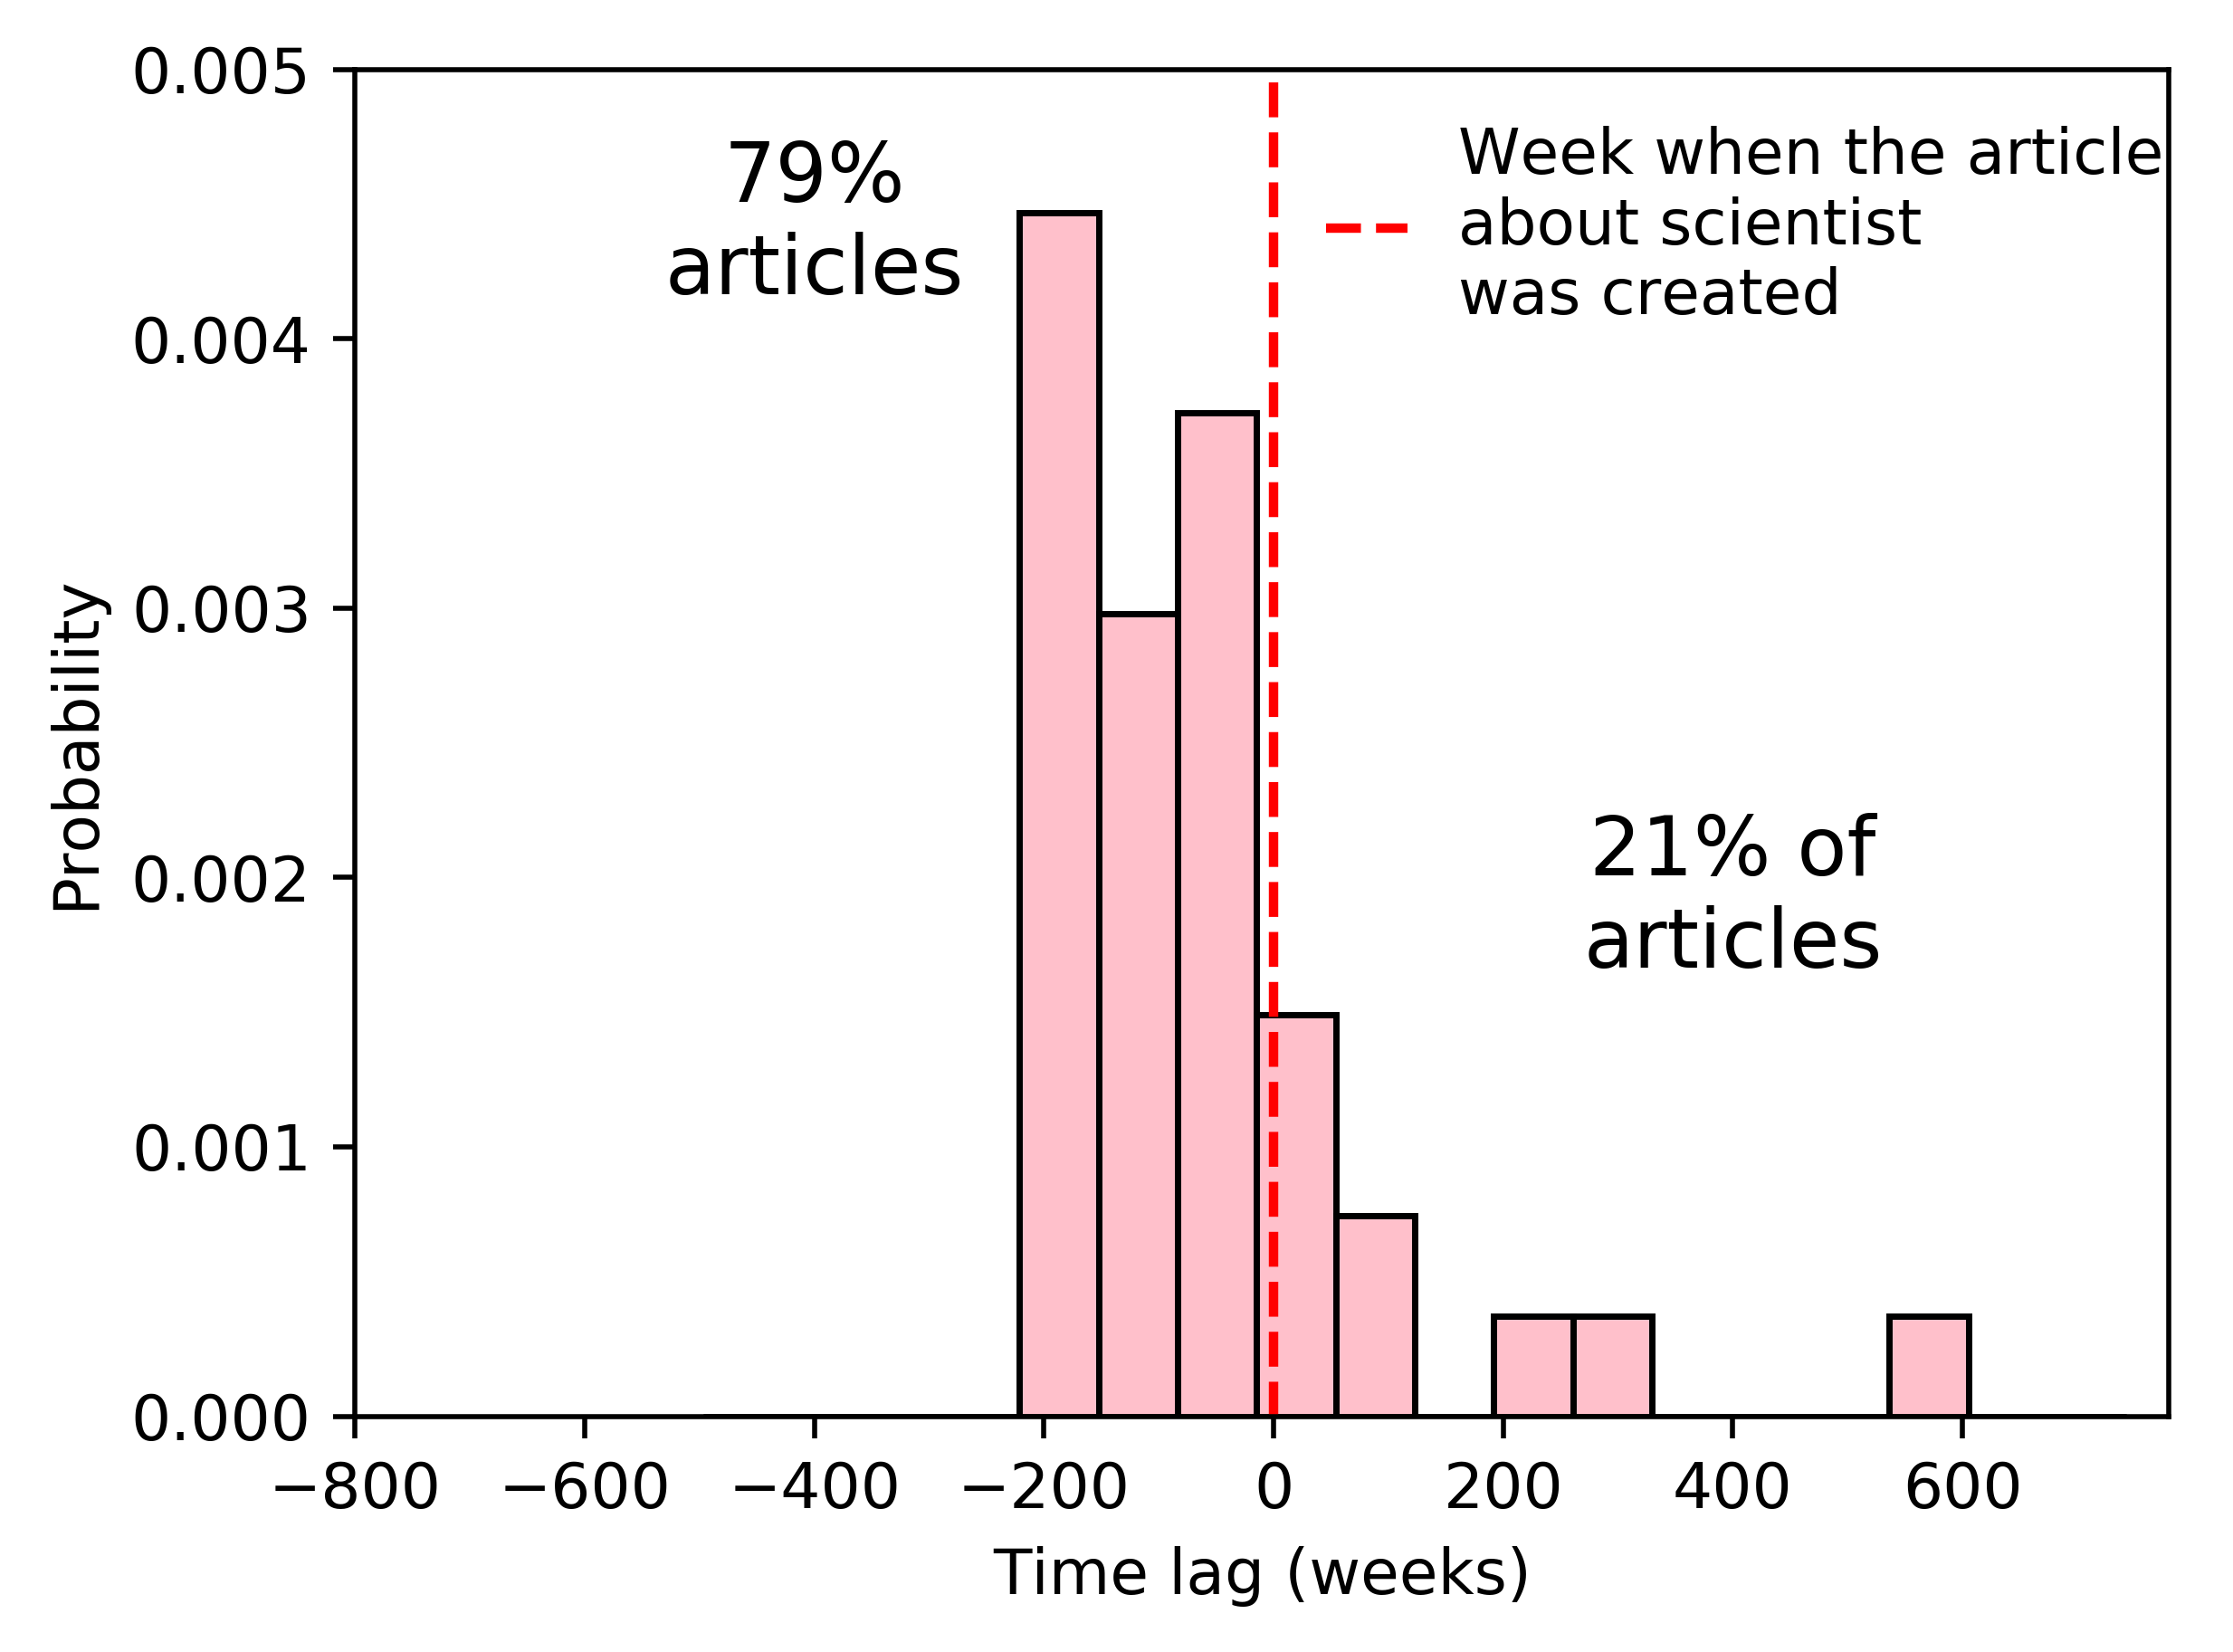

79.4871794872
56.6473988439
Ks_2sampResult(statistic=0.31124944419742107, pvalue=0.0030830372548564132)
MannwhitneyuResult(statistic=2345.5, pvalue=0.0014927578243522149)


In [277]:
female_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Computer Science")].Name)
male_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="male")&(df_sci_aw.Field=="Computer Science")].Name)


data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_medicine_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded_cs.pdf',color="skyblue",period="weeks",lim=0.005,bins=15,text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_medicine_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female,'/timelag_weekly_female_awarded_cs.pdf',color="pink",period="weeks",lim=0.005,text="Female scientist",
         bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

https://www.medcalc.org/calc/comparison_of_proportions.php

Difference	22.84%

95% CI	6.1996 to 35.0963

Chi-squared	6.936

DF 	1

Significance level	P = 0.0084

# Economics           (   male      49,                      female     2)

# of topics 580
Male scientist


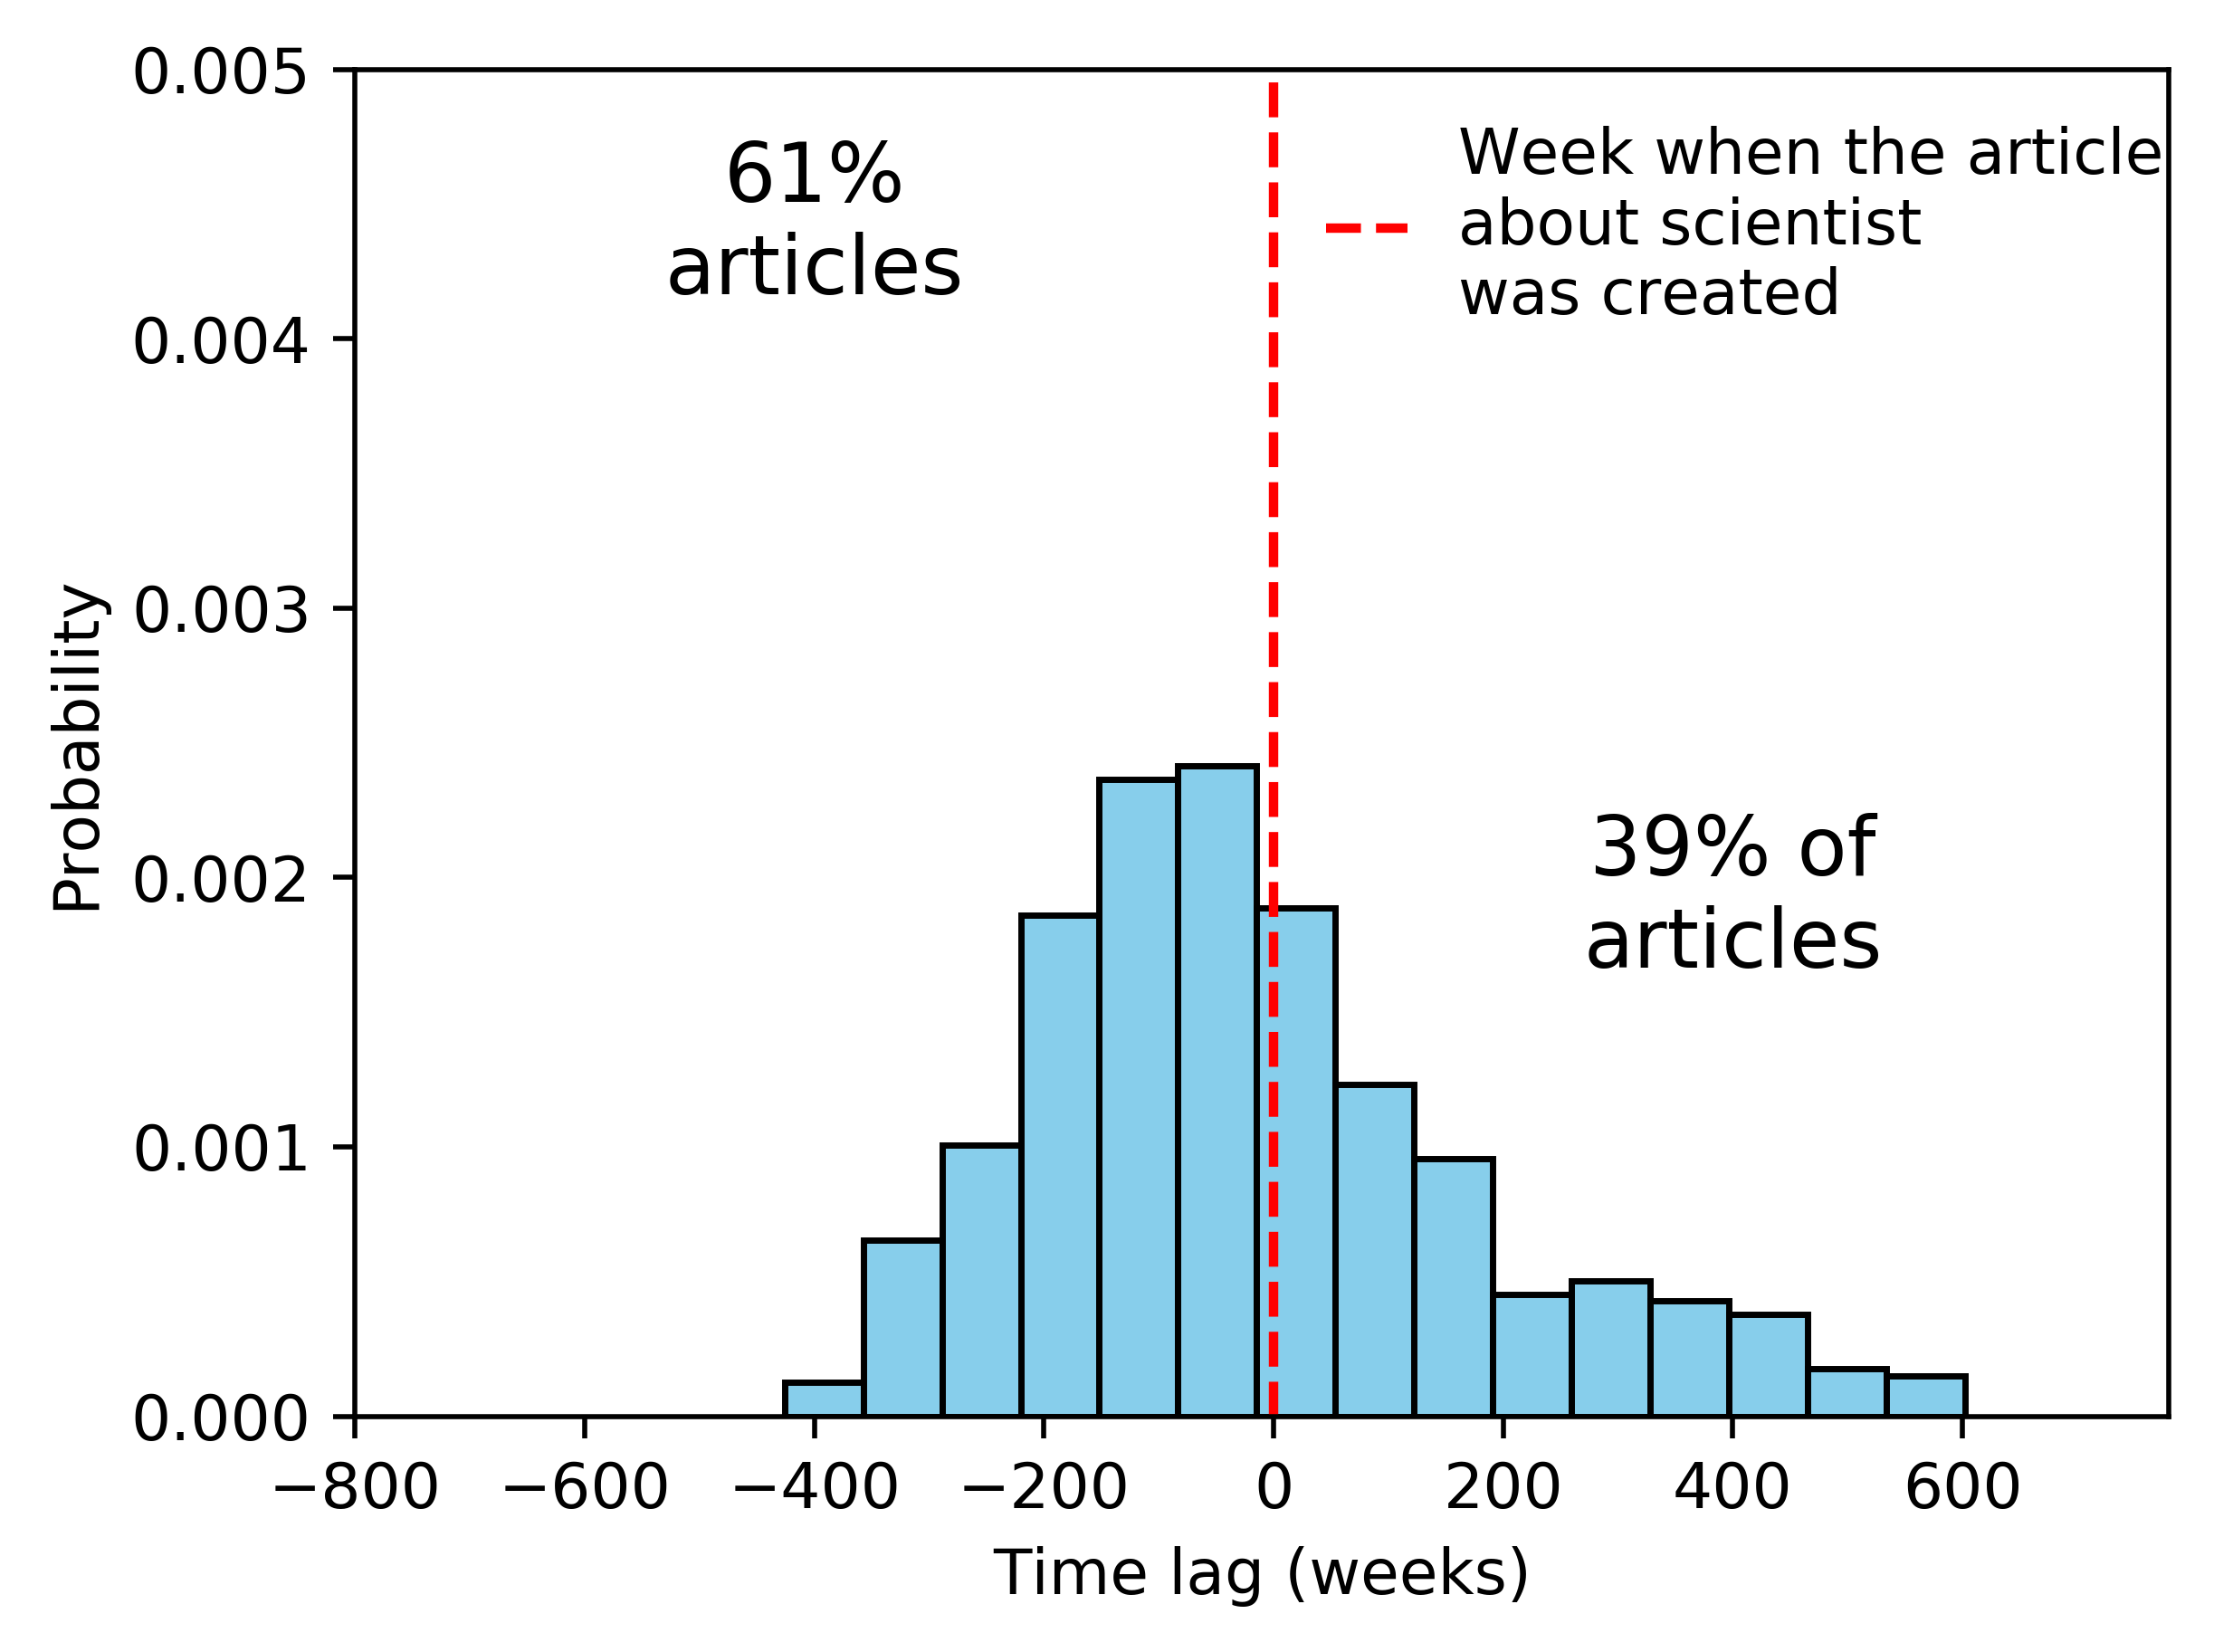

# of topics 45
Female scientist


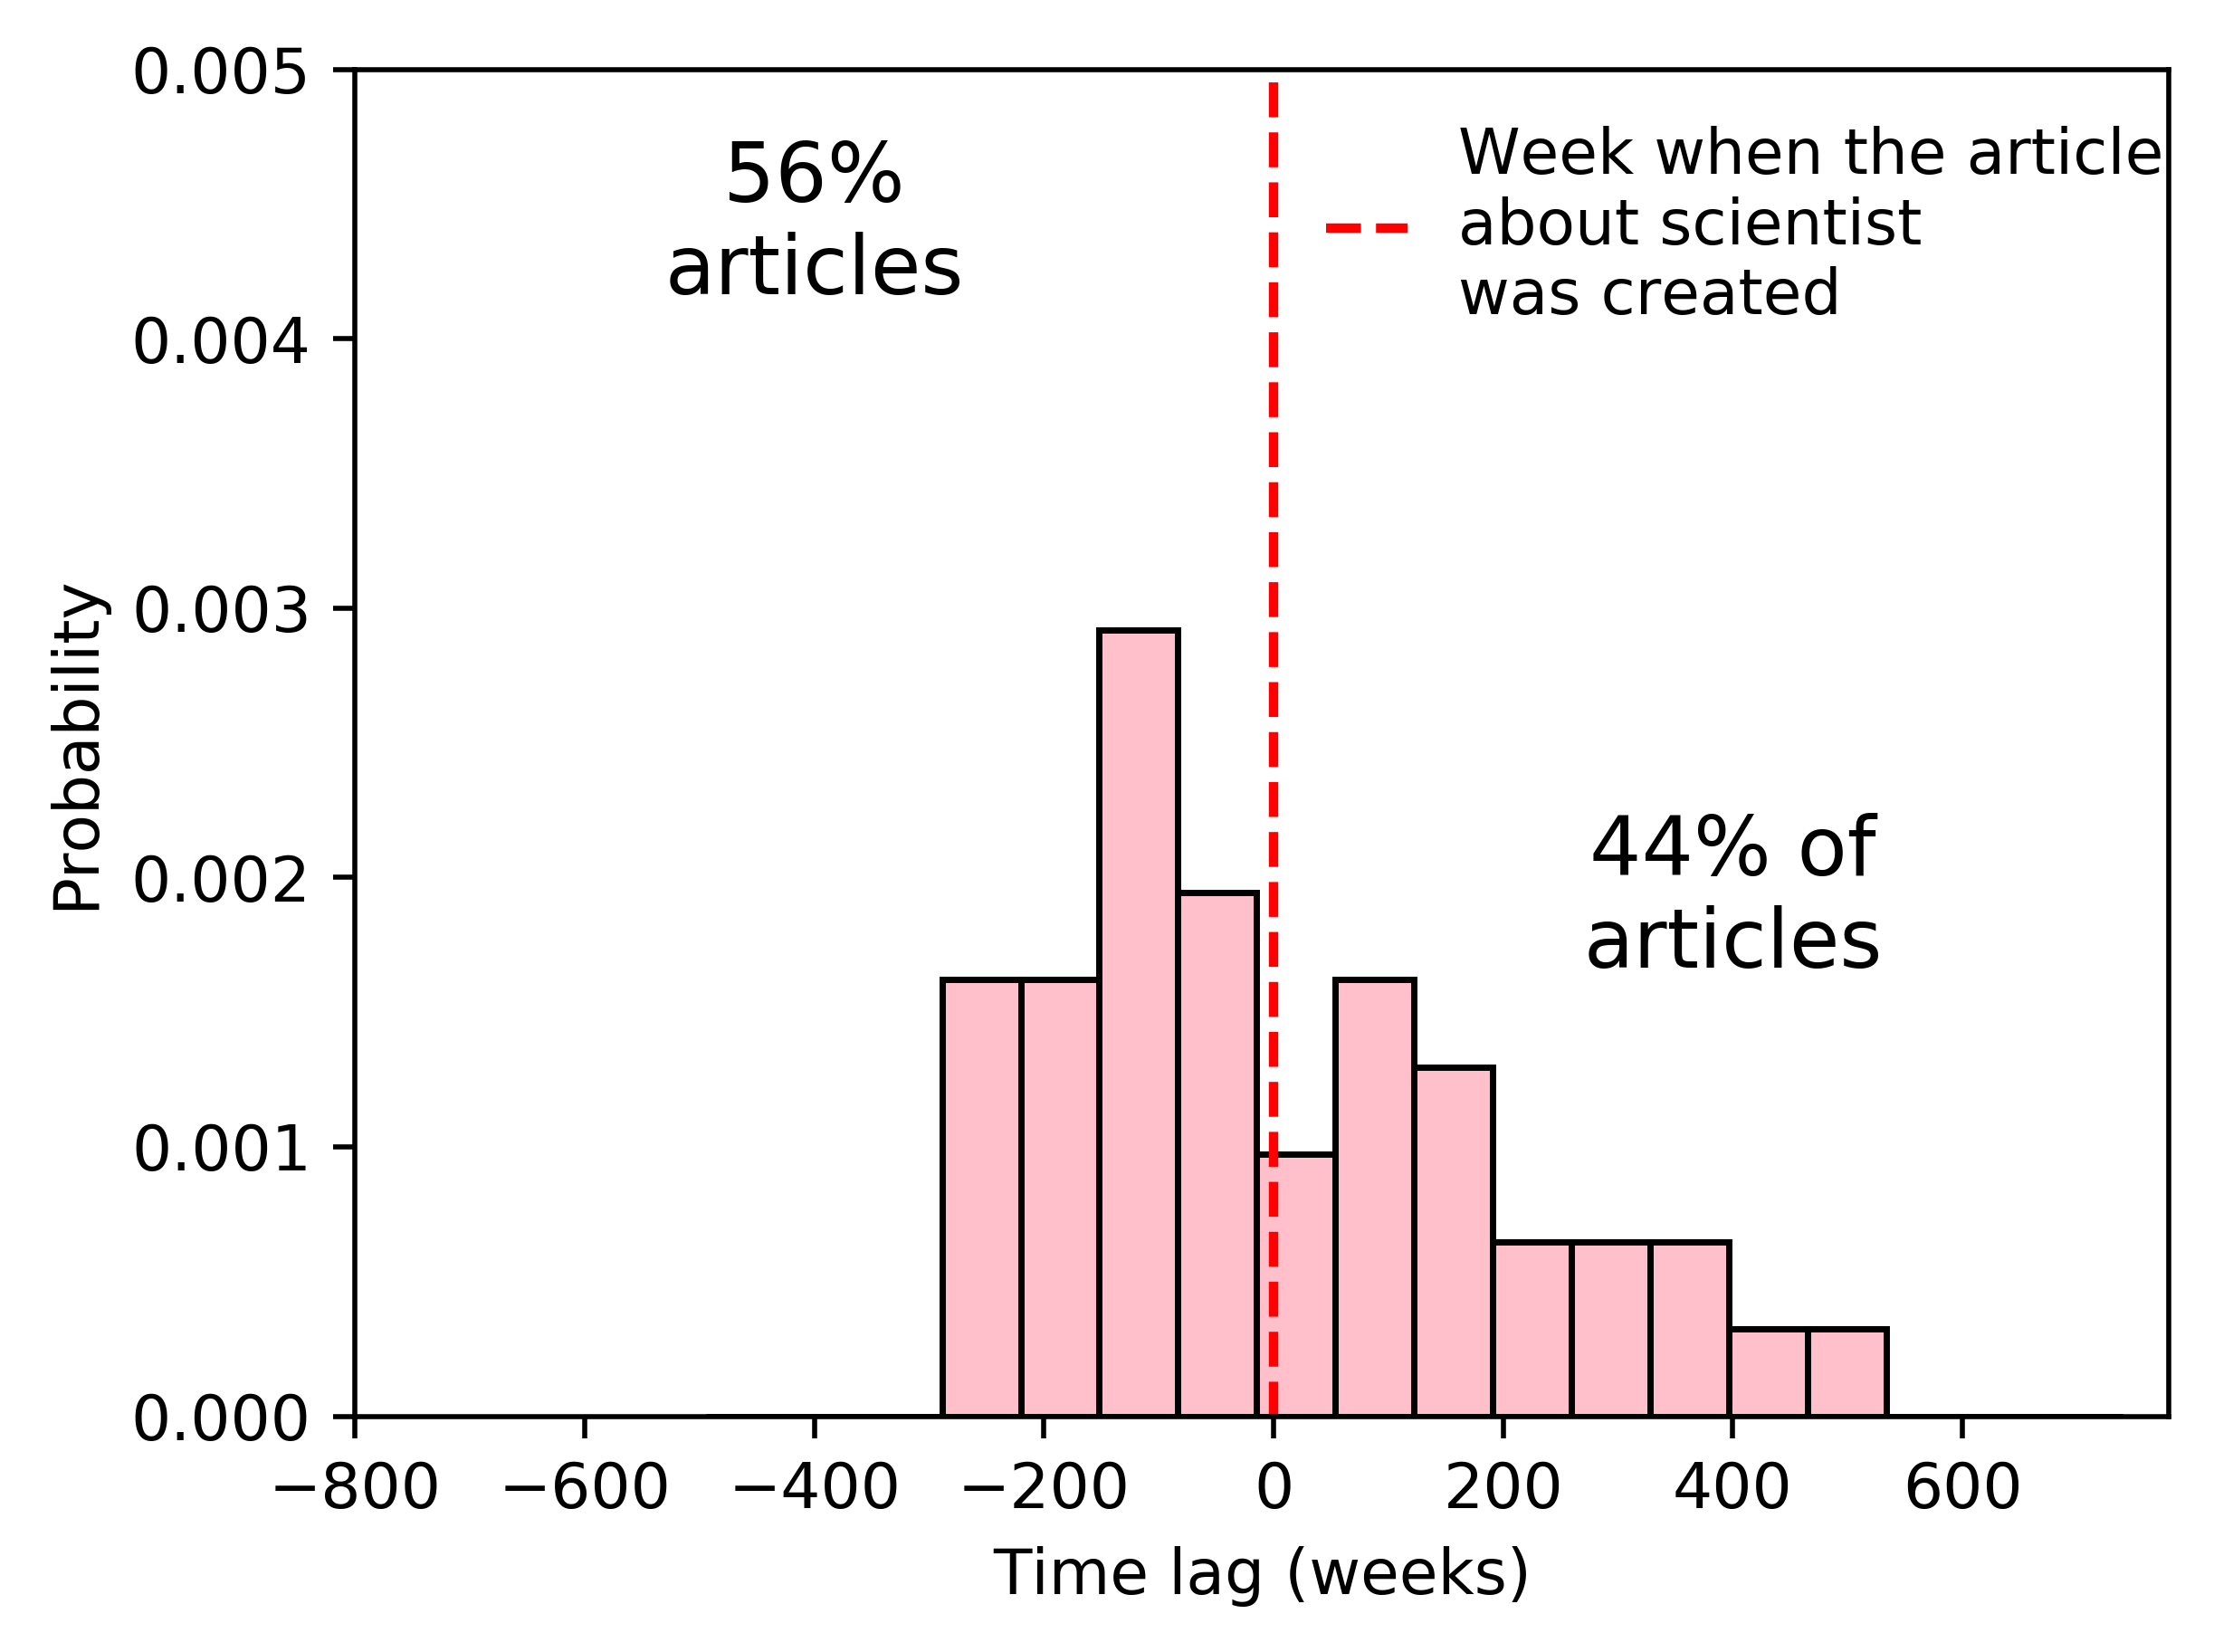

55.5555555556
61.0344827586
Ks_2sampResult(statistic=0.14616858237547892, pvalue=0.30989464108500431)
MannwhitneyuResult(statistic=12327.0, pvalue=0.26789558587035506)


In [280]:
female_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Economics")].Name)
male_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="male")&(df_sci_aw.Field=="Economics")].Name)


data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_medicine_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded_economics.pdf',color="skyblue",period="weeks",lim=0.005,bins=15,text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_medicine_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female,'/timelag_weekly_female_awarded_economics.pdf',color="pink",period="weeks",lim=0.005,text="Female scientist",
         bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

Difference	5.47%

95% CI	-8.6232 to 20.3649

Chi-squared	0.523

DF 	1

Significance level	P = 0.4697

# Mathematics       (      male      17,                        female     1)

# of topics 399
Male scientist


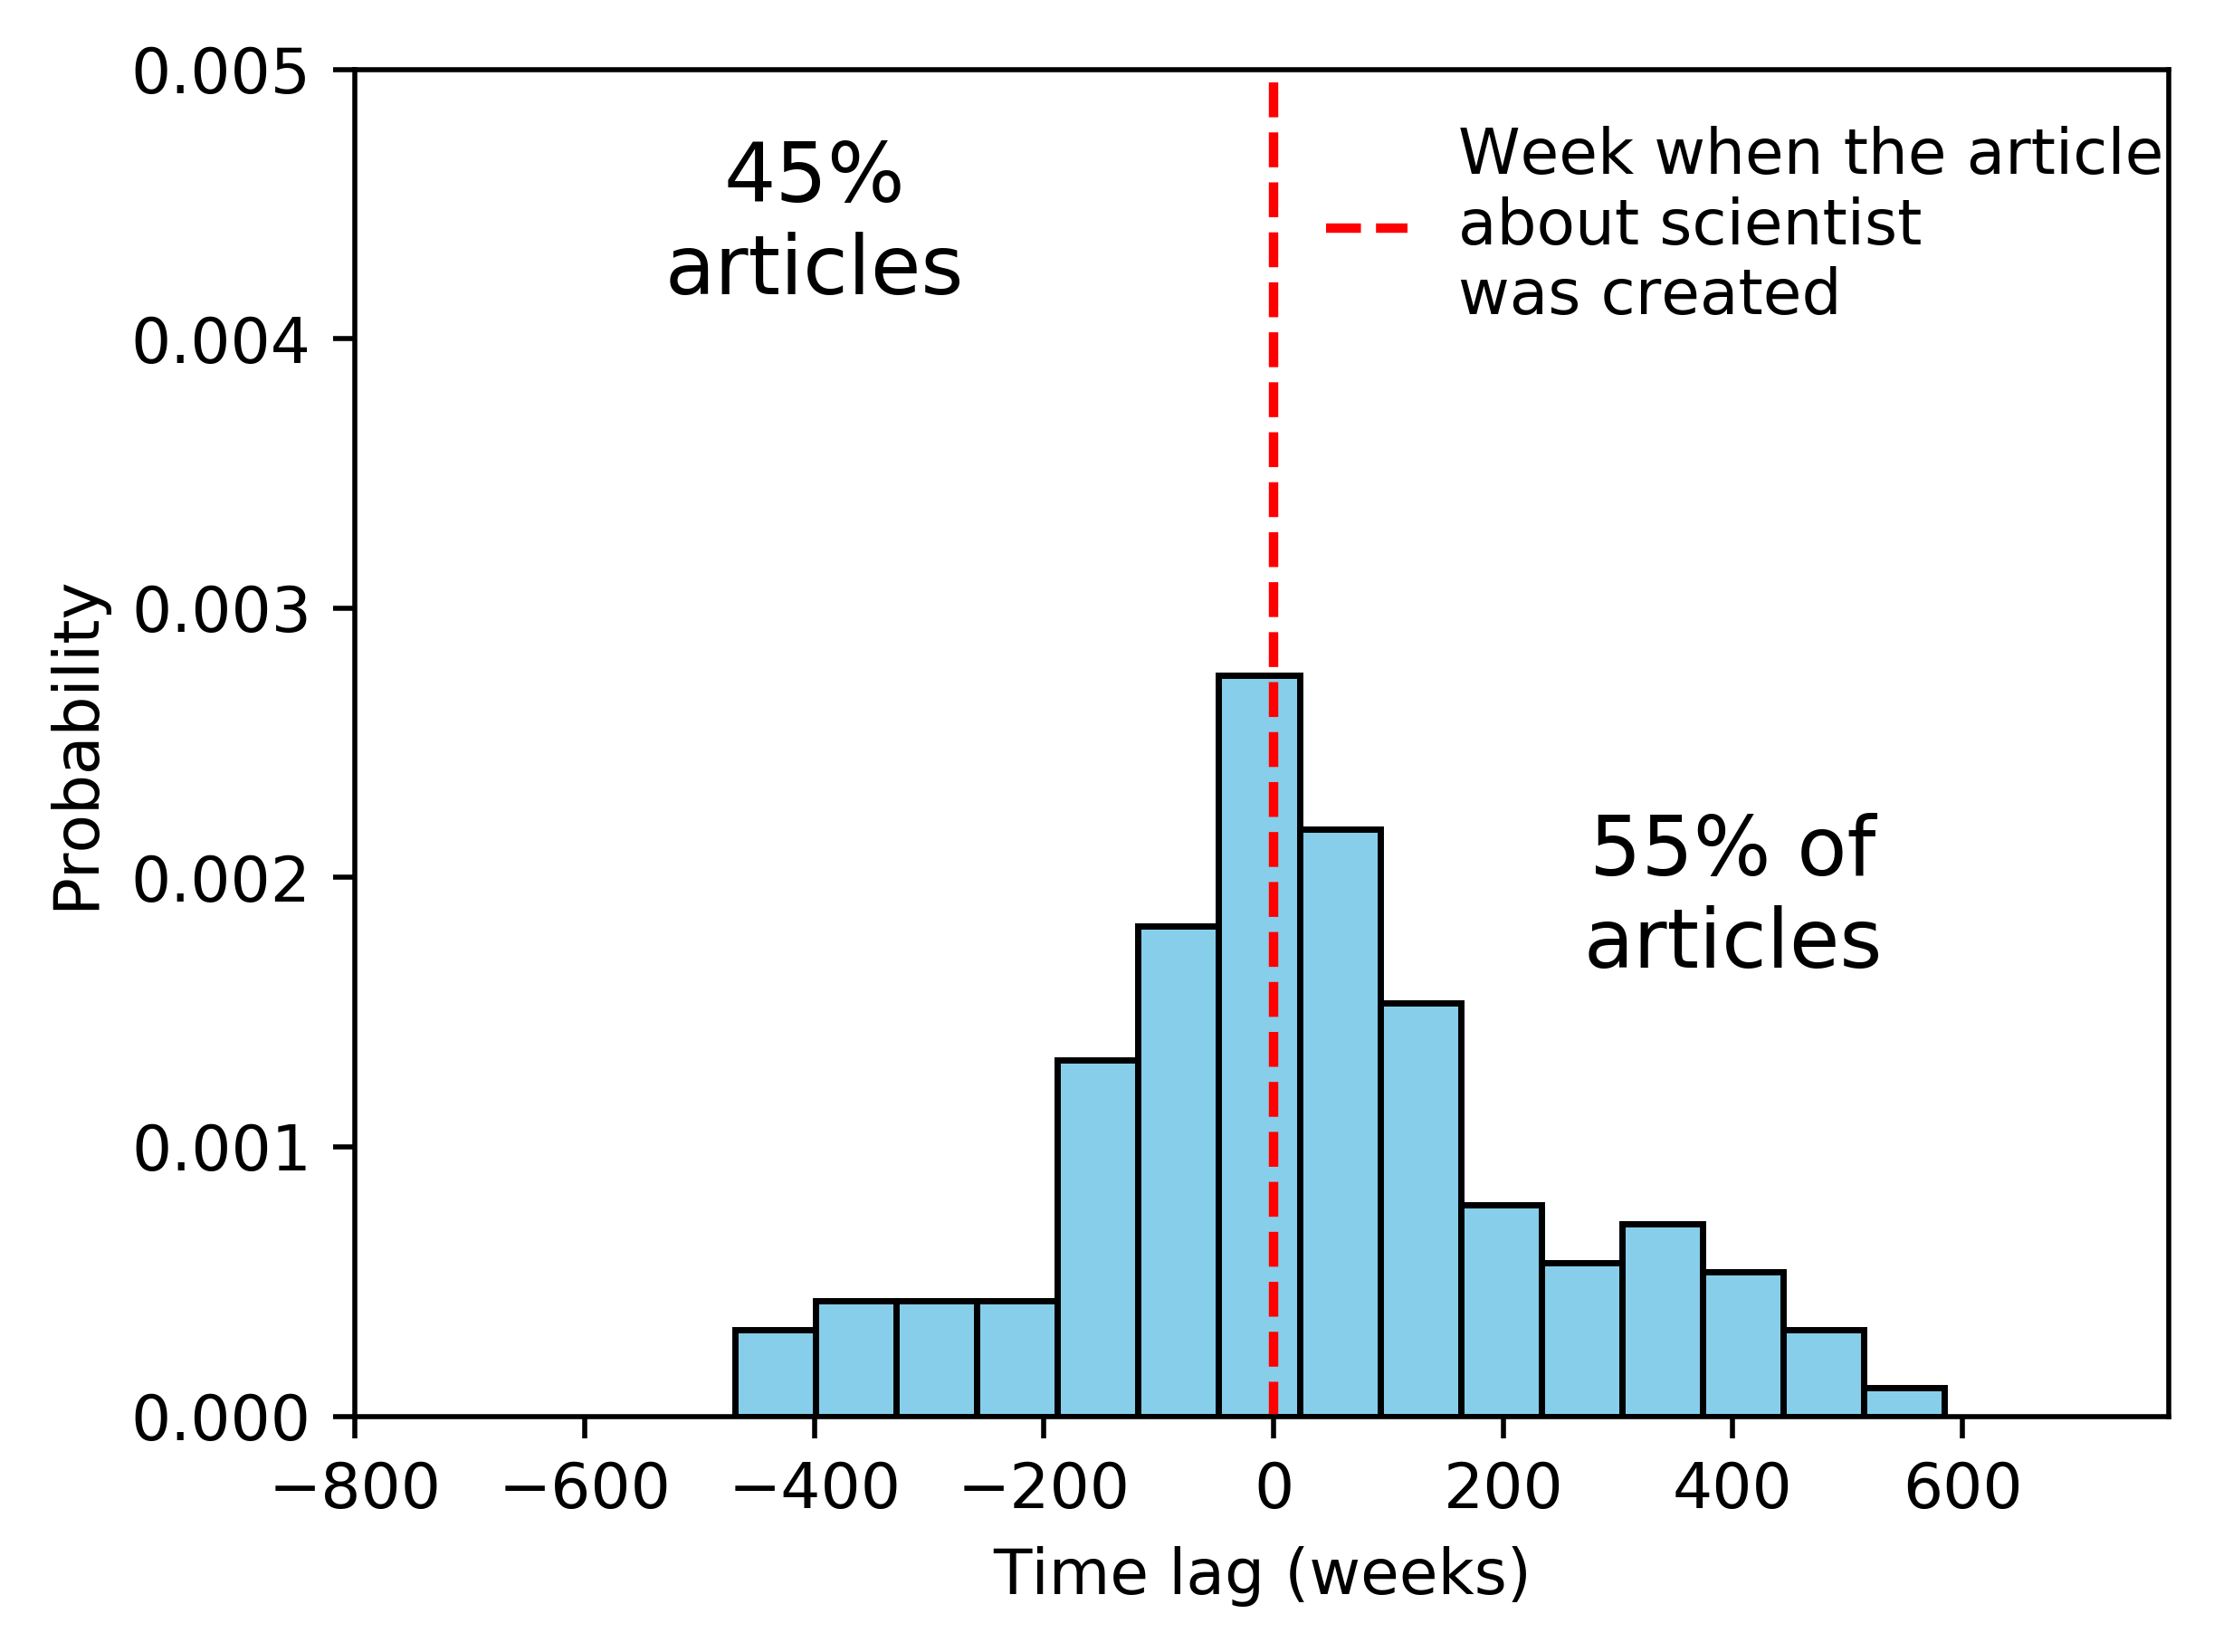

# of topics 14
Female scientist


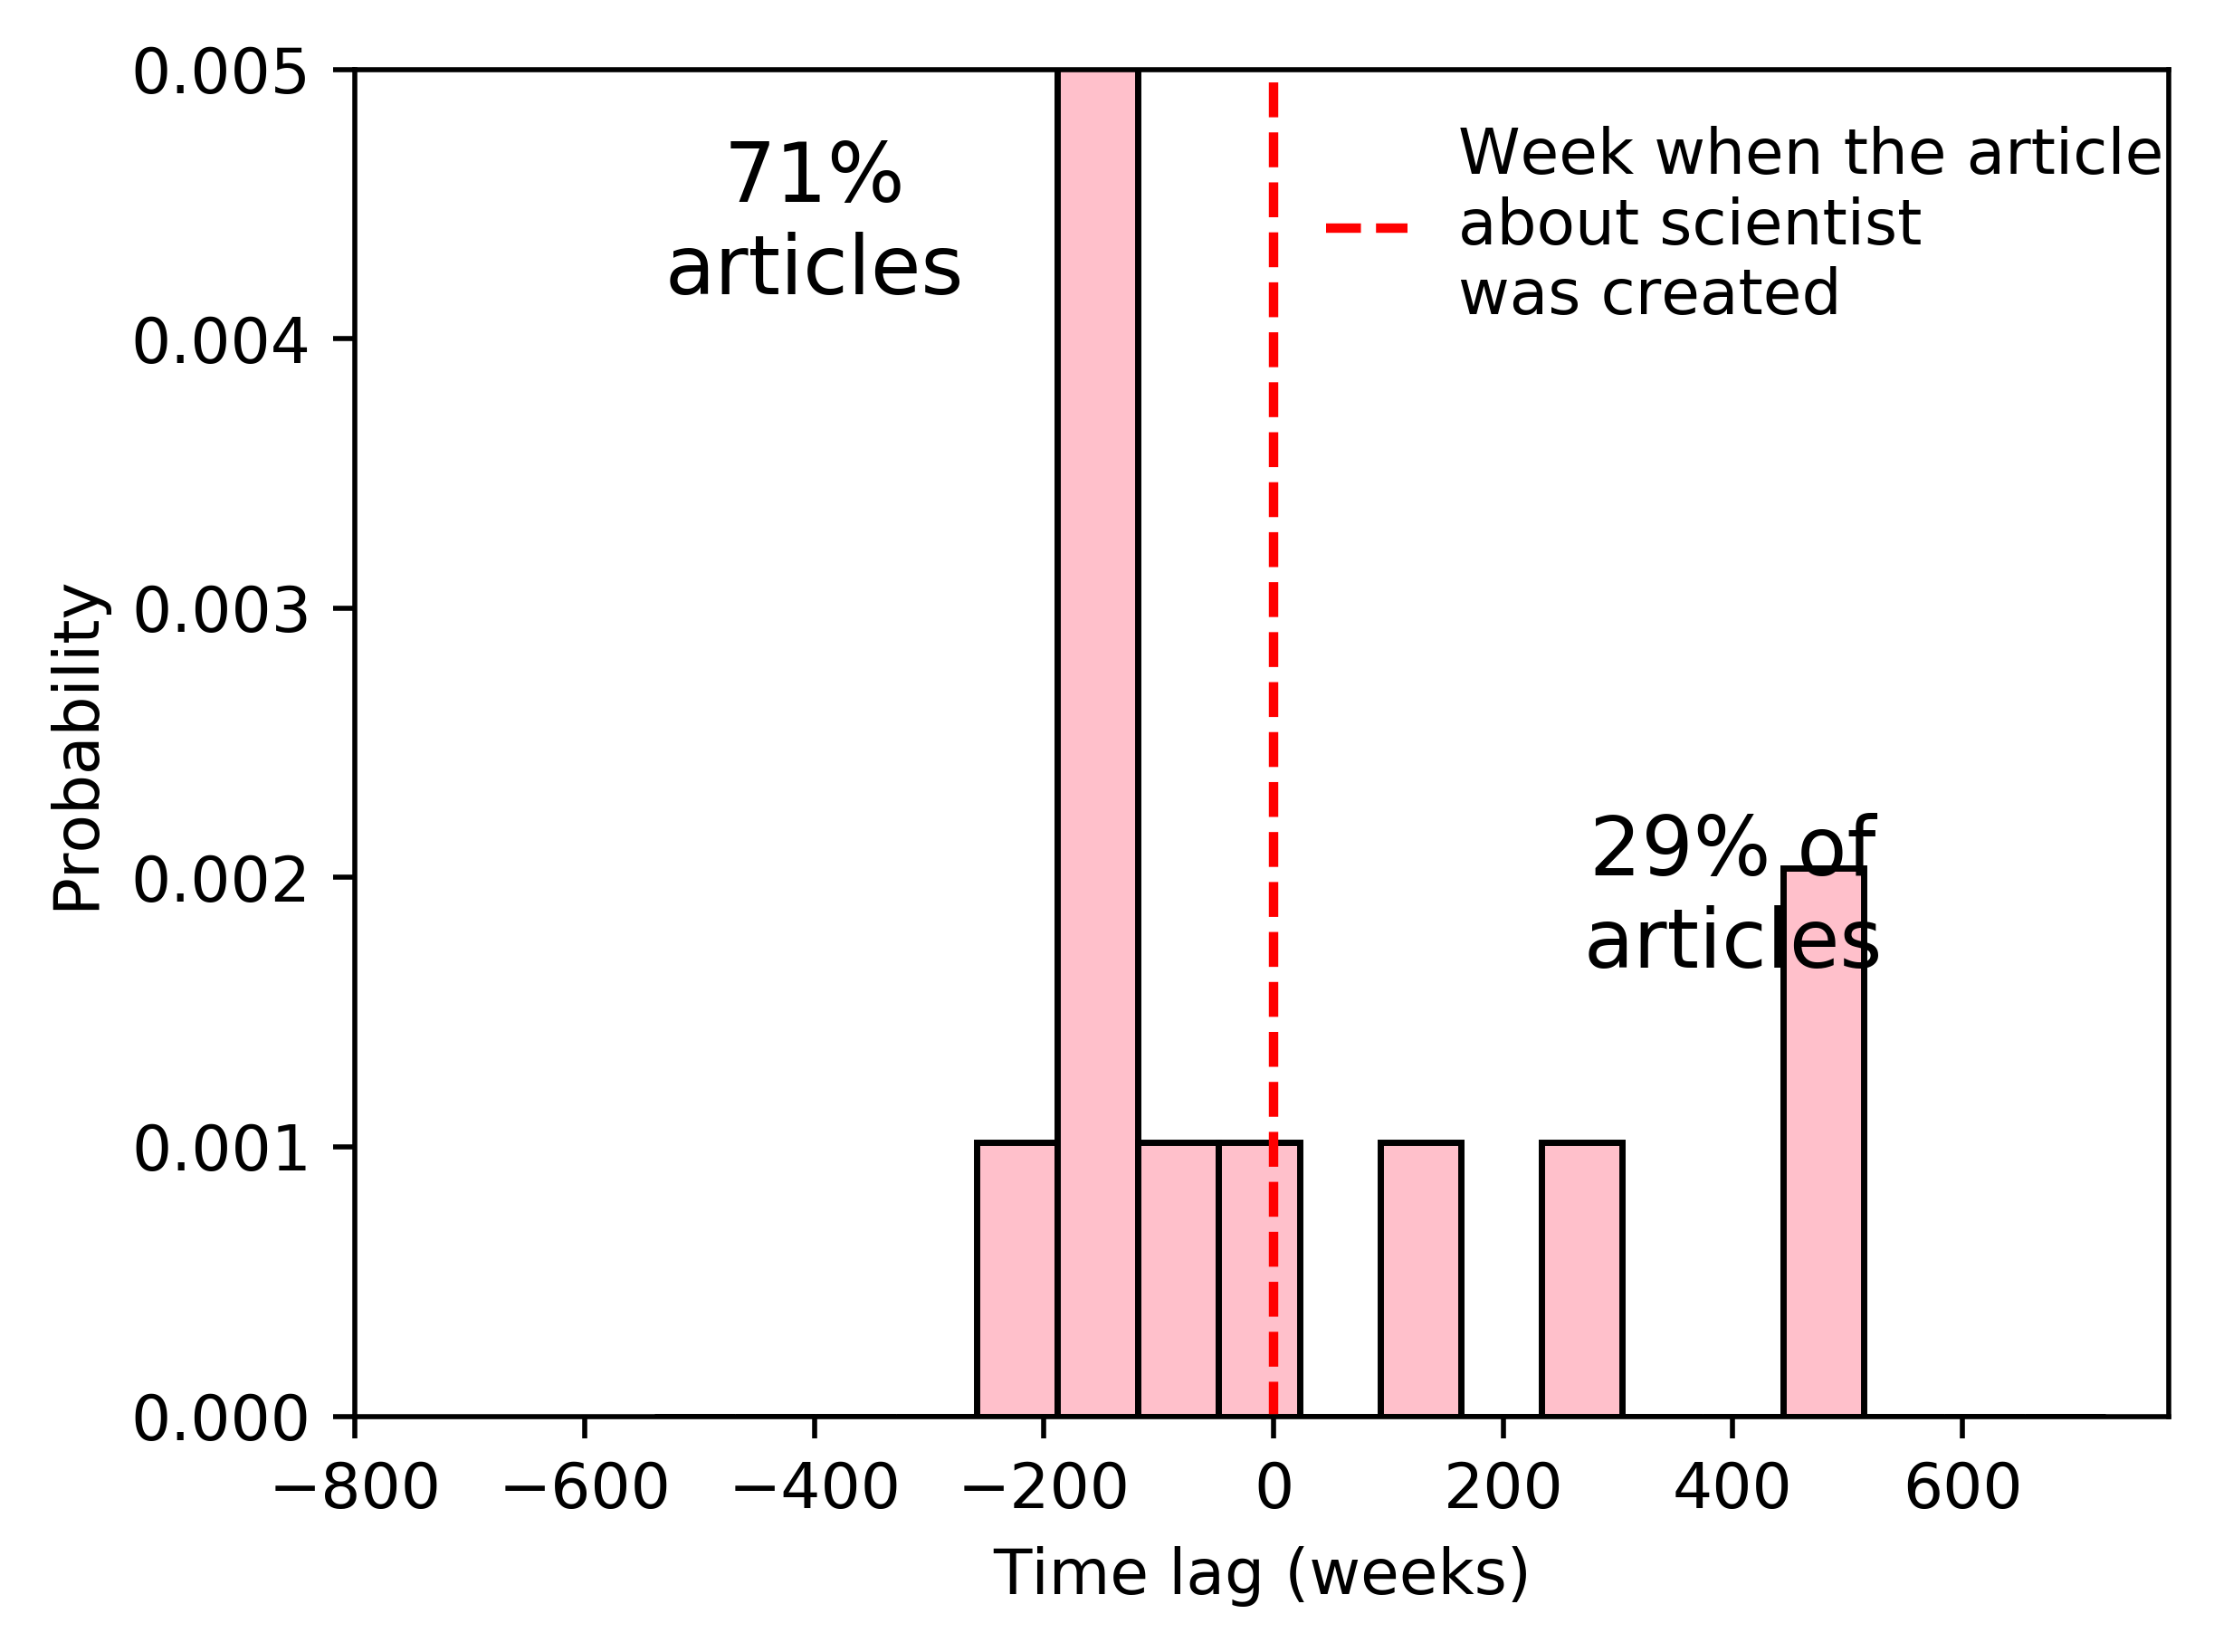

71.4285714286
14
45.1127819549
399
Ks_2sampResult(statistic=0.41353383458646614, pvalue=0.013331326428743273)
MannwhitneyuResult(statistic=2080.0, pvalue=0.052290428309085028)


In [304]:
female_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Mathematics")].Name)
male_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="male")&(df_sci_aw.Field=="Mathematics")].Name)


data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_medicine_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded_mathematics.pdf',color="skyblue",period="weeks",lim=0.005,bins=15,
                  text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_medicine_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female,'/timelag_weekly_female_awarded_mathematics.pdf',color="pink",period="weeks",lim=0.005,
         text="Female scientist",
         bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

 https://www.medcalc.org/calc/comparison_of_proportions.php
    
Difference	26.32%

95% CI	-0.2152 to 43.8434

Chi-squared	3.763

DF 	1

Significance level	P = 0.0524

# Biology             (    male       7,                female     1 )

# of topics 49
Male scientist


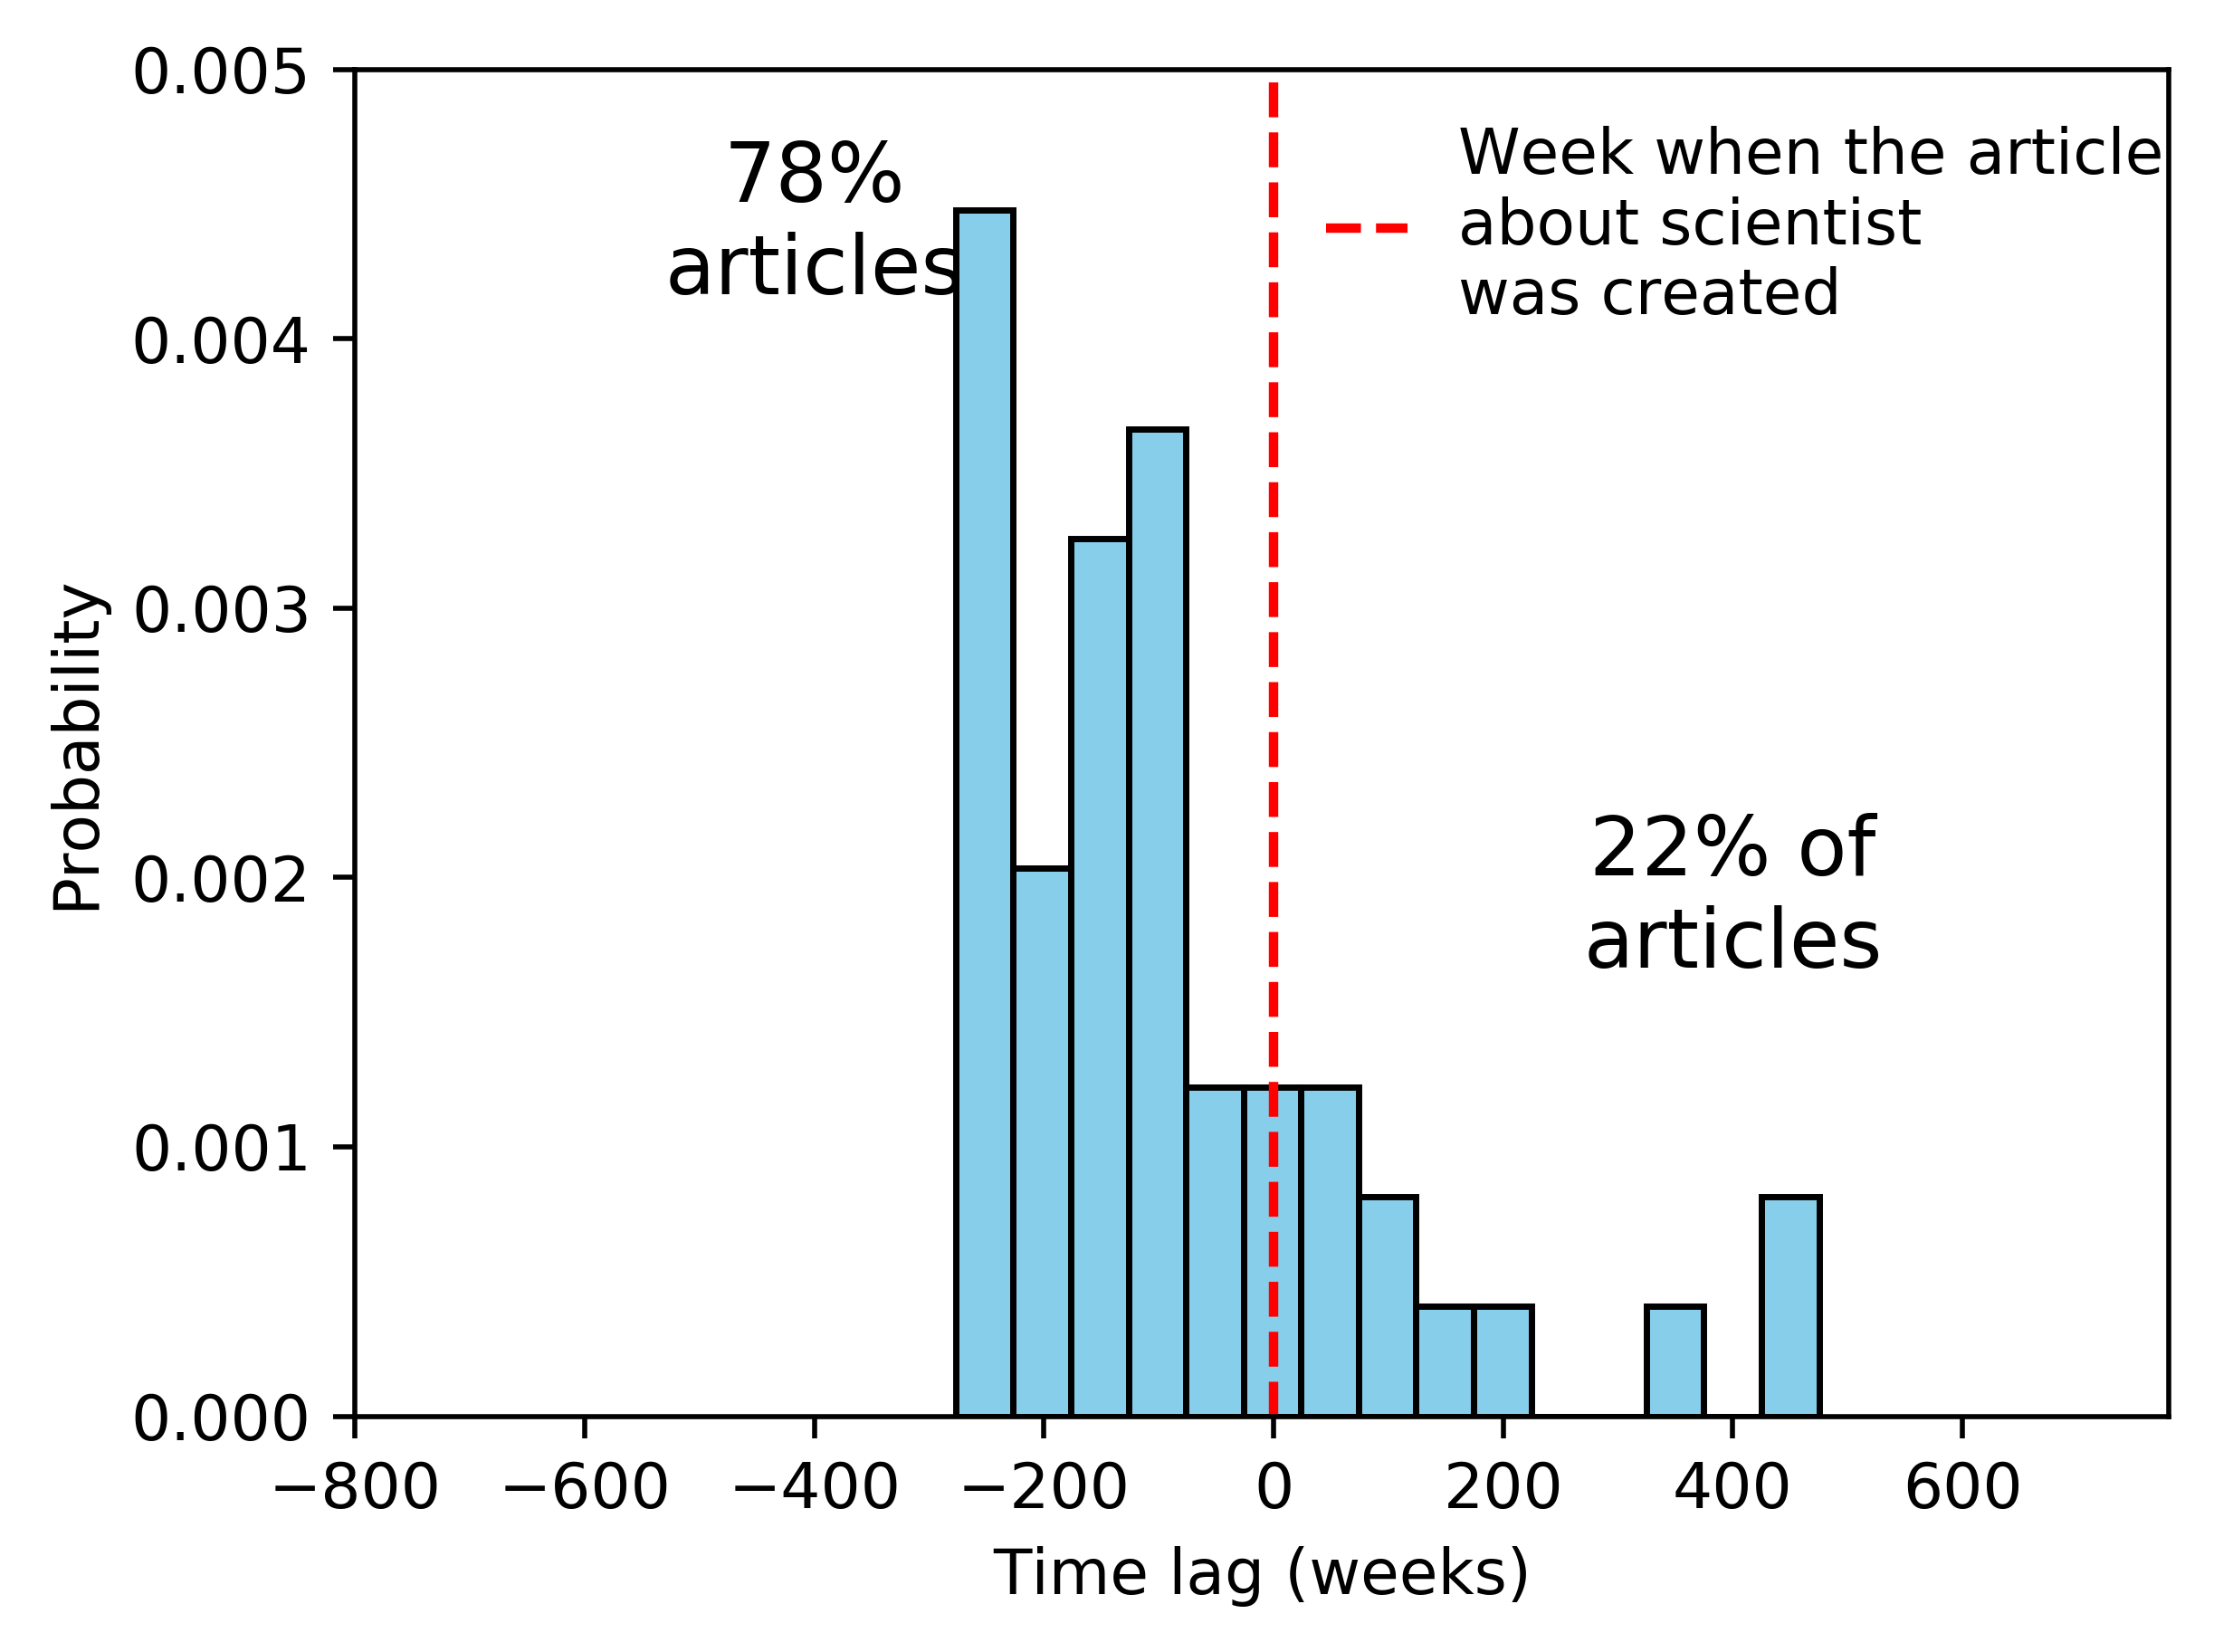

# of topics 1
Female scientist


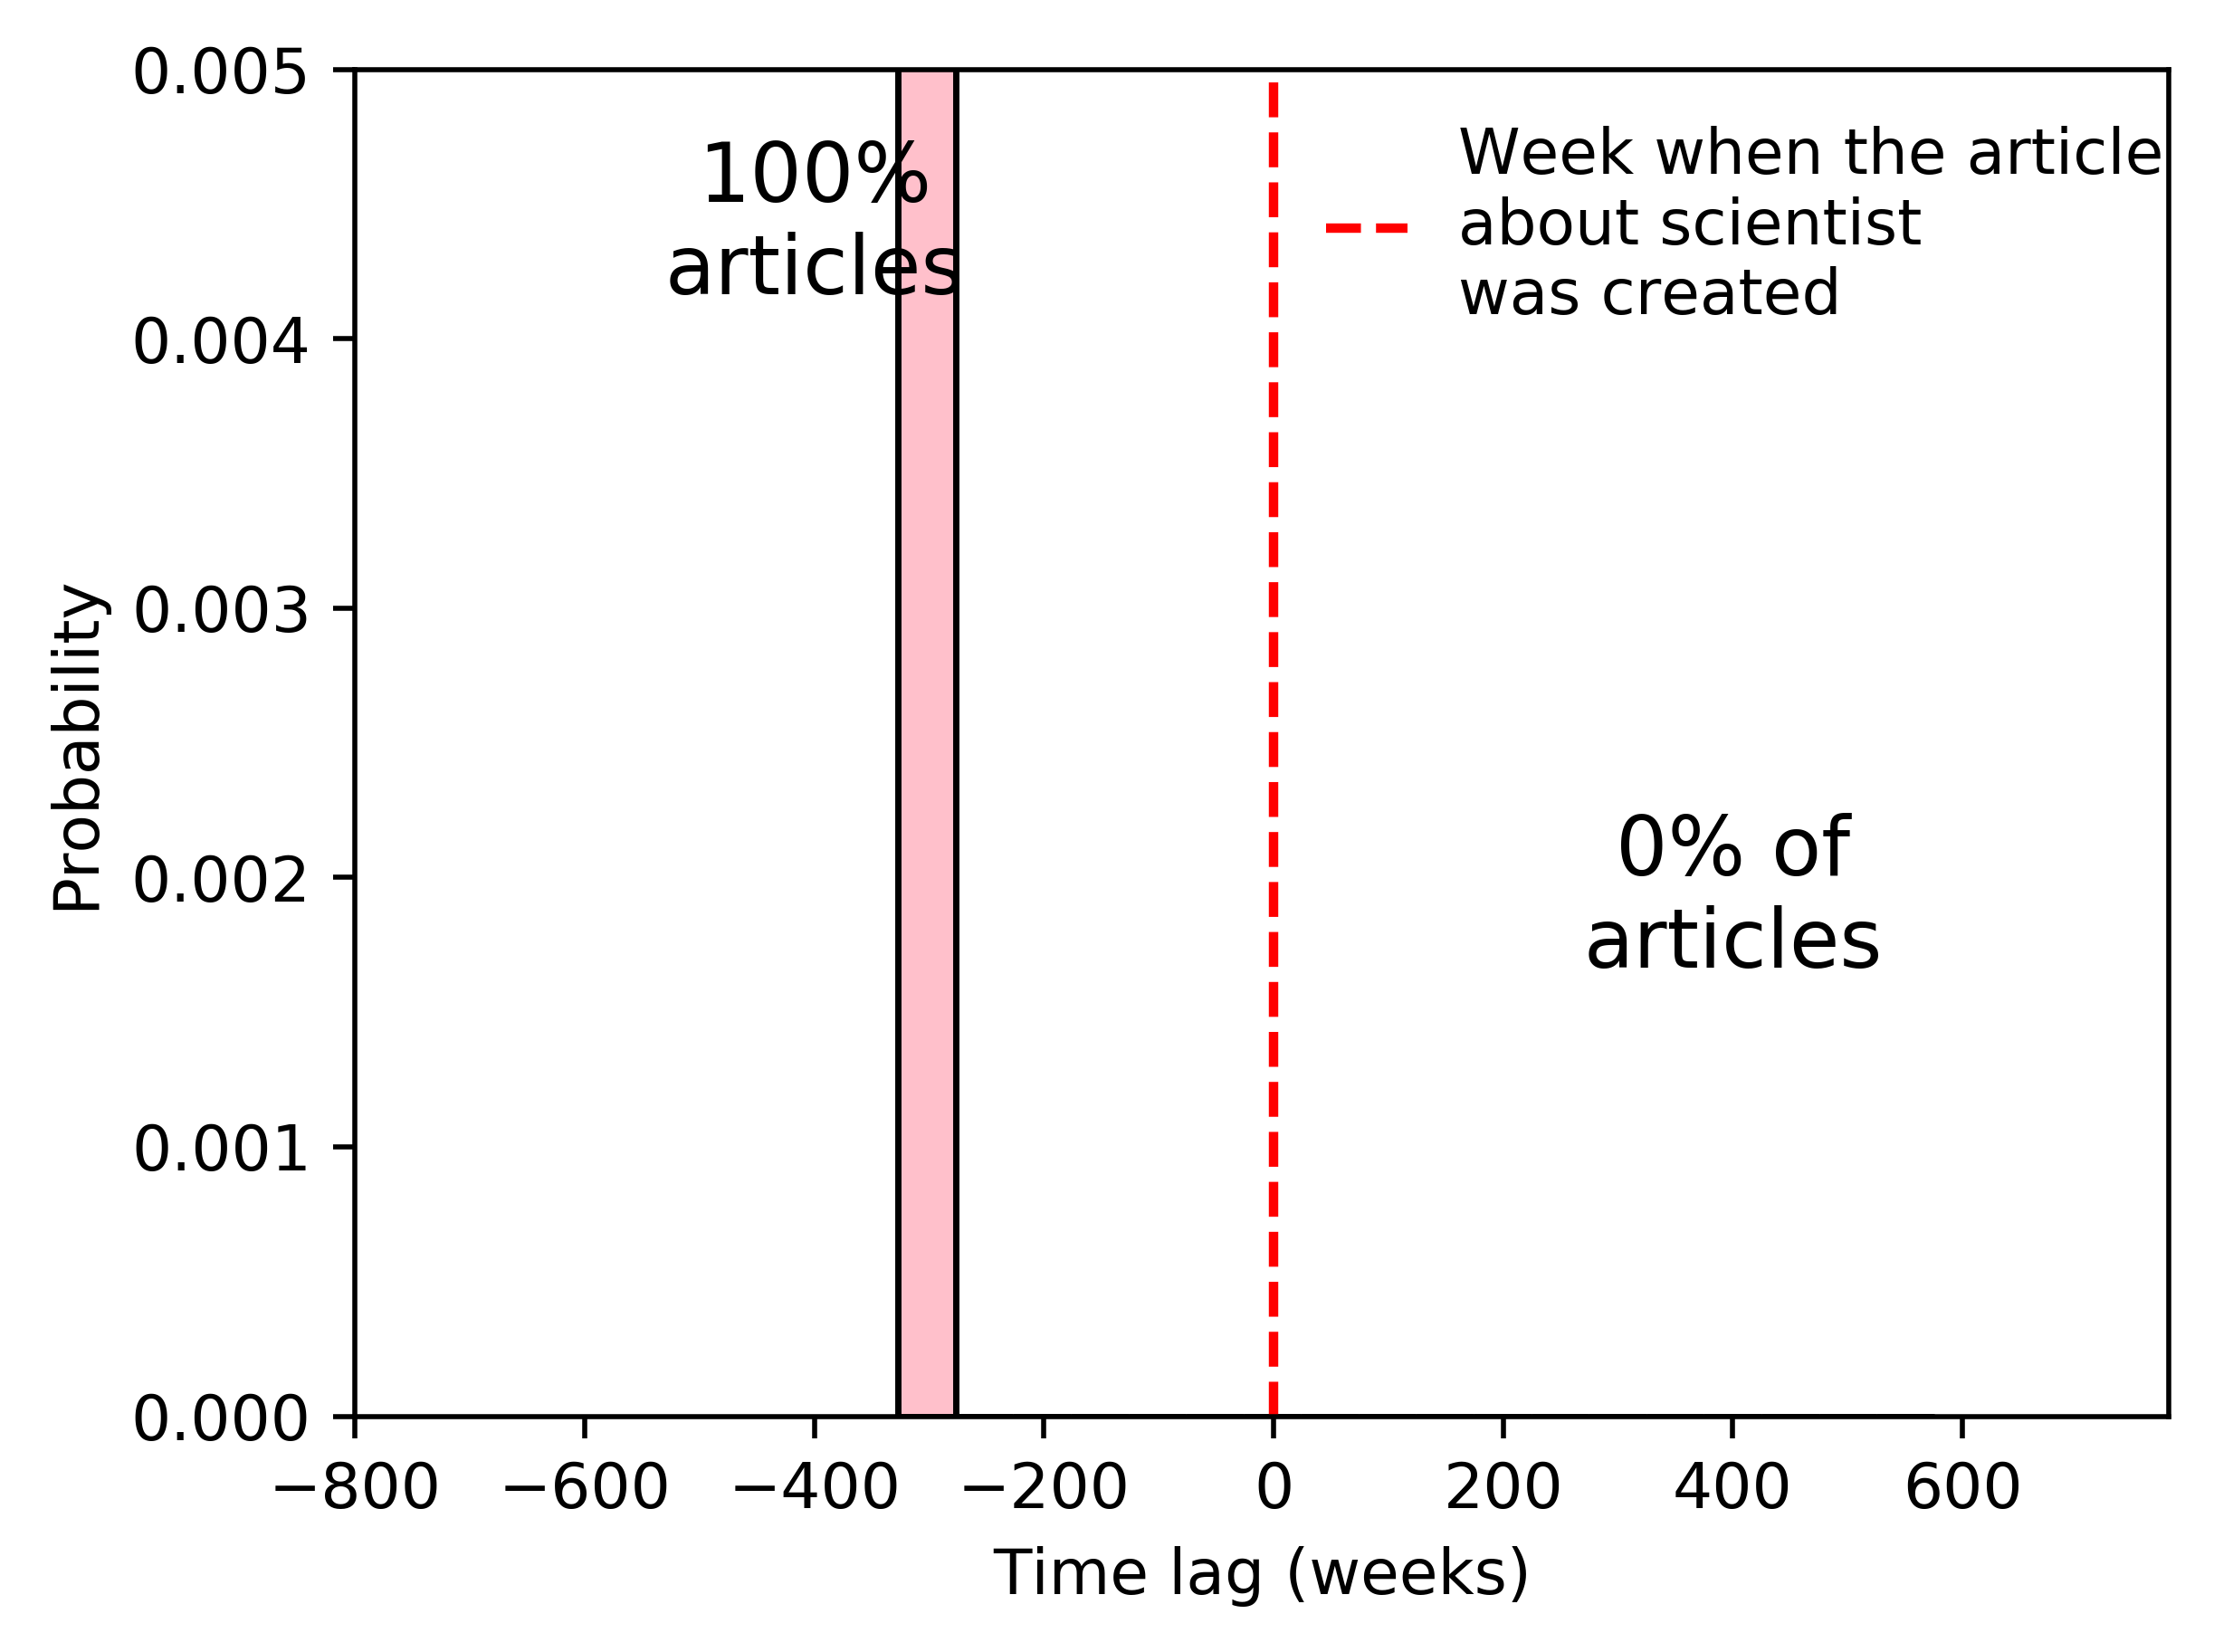

100.0
1
77.5510204082
49
Ks_2sampResult(statistic=1.0, pvalue=0.10136891716351504)
MannwhitneyuResult(statistic=0.0, pvalue=0.048134079441470044)


In [310]:
female_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Biology")].Name)
male_sc_medicine_aw=list(df_sci_aw[(df_sci_aw.Gender=="male")&(df_sci_aw.Field=="Biology")].Name)


data_male = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,male_sc_medicine_aw)
male = weekly_aggregation(data_male)
print "# of topics",len(male)
bins_new=plotting(male, '/timelag_weekly_male_awarded_biology.pdf',color="skyblue",period="weeks",lim=0.005,bins=15,
                  text="Male scientist")
plt.show()

bins_plus3=np.append(np.append(2*bins_new[0]-bins_new[1],bins_new),
                     [2*bins_new[-1]-bins_new[-2],3*bins_new[-1]-2*bins_new[-2]])

data_female = get_series(main_dict_seed, scientist_dict_seed, topic_dict_seed,female_sc_medicine_aw )
female = weekly_aggregation(data_female)
print "# of topics",len(female)
plotting(female,'/timelag_weekly_female_awarded_biology.pdf',color="pink",period="weeks",lim=0.005,
         text="Female scientist",   bins=bins_plus3)
plt.show()


#calculate difference
print 100*float(np.sum(np.array(female)<0))/len(female)
print len(female)
print 100*float(np.sum(np.array(male)<0))/len(male)
print len(male)
print ks_2samp(female, male)
print mannwhitneyu(female, male)

In [307]:
df_sci_aw[(df_sci_aw.Gender=="female")&(df_sci_aw.Field=="Biology")]

Award_date Page_created            Name  Gender  \
Nancy_A._Moran  2010-10-07   2010-05-07  Nancy A. Moran  female   

                                          Award Status    Field  Year  
Nancy_A._Moran  International Prize for Biology  alive  Biology  2010

In [313]:
print main_dict_seed["https://en.wikipedia.org/wiki/Nancy_A._Moran"]
print topic_dict_seed[u'evolutionary biologist']

[u'evolutionary biologist']
2004-07-14T20:20:30Z
